In [186]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier



In [187]:
df = pd.read_csv("wine.csv")



In [188]:
df.columns


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [189]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [190]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

test_scores=[]
train_scores=[]
n=100

for i in range(1,n):
    y_pred=[]
    model=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    test_scores.append(accuracy_score(y_test,y_pred))
    y_train_pred=model.predict(X_train)
    train_scores.append(accuracy_score(y_train,y_train_pred))



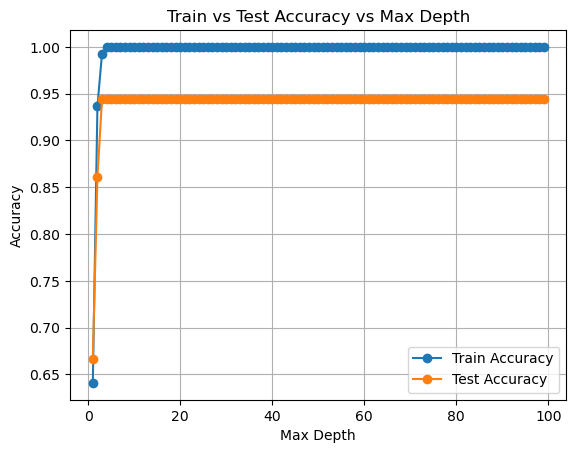

In [192]:
depths=range(1,n)

plt.plot(depths, train_scores, marker='o', label="Train Accuracy")
plt.plot(depths, test_scores, marker='o', label="Test Accuracy")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()



In [193]:
#training useing the most optimal max_depth i.e 3
# y_pred=[]
model=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("testing accuracy:",(accuracy_score(y_test,y_pred)))
y_train_pred=model.predict(X_train) 
print("training accuracy:",(model.score(X_train,y_train)))

testing accuracy: 0.9444444444444444
training accuracy: 0.9929577464788732


**California**

In [208]:
df= pd.read_csv("california.csv")

In [209]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [210]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["ocean_proximity"]=le.fit_transform(df["ocean_proximity"])


In [211]:

df.head()
df.shape

(20640, 10)

In [212]:
y=df["median_house_value"]
X=df.drop(df["median_house_value"])

X.head

KeyError: '[452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0, 281500.0, 241800.0, 213500.0, 191300.0, 159200.0, 140000.0, 152500.0, 155500.0, 158700.0, 162900.0, 147500.0, 159800.0, 113900.0, 99700.0, 132600.0, 107500.0, 93800.0, 105500.0, 108900.0, 132000.0, 122300.0, 115200.0, 110400.0, 104900.0, 109700.0, 97200.0, 104500.0, 103900.0, 191400.0, 176000.0, 155400.0, 150000.0, 118800.0, 188800.0, 184400.0, 182300.0, 142500.0, 137500.0, 187500.0, 112500.0, 171900.0, 93800.0, 97500.0, 104200.0, 87500.0, 83100.0, 87500.0, 85300.0, 80300.0, 60000.0, 75700.0, 75000.0, 86100.0, 76100.0, 73500.0, 78400.0, 84400.0, 81300.0, 85000.0, 129200.0, 82500.0, 95200.0, 75000.0, 67500.0, 137500.0, 177500.0, 102100.0, 108300.0, 112500.0, 131300.0, 162500.0, 112500.0, 112500.0, 137500.0, 118800.0, 98200.0, 118800.0, 162500.0, 137500.0, 500001.0, 162500.0, 137500.0, 162500.0, 187500.0, 179200.0, 130000.0, 183800.0, 125000.0, 170000.0, 193100.0, 257800.0, 273400.0, 237500.0, 350000.0, 335700.0, 313400.0, 268500.0, 259400.0, 275700.0, 225000.0, 262500.0, 218500.0, 255000.0, 224100.0, 243100.0, 231600.0, 218500.0, 234100.0, 327600.0, 347600.0, 366100.0, 335000.0, 373600.0, 389500.0, 391100.0, 337300.0, 295200.0, 292300.0, 411500.0, 311500.0, 325900.0, 392600.0, 319300.0, 333300.0, 335200.0, 351200.0, 368900.0, 365900.0, 366700.0, 362800.0, 483300.0, 331400.0, 323500.0, 216700.0, 233100.0, 296400.0, 273700.0, 227700.0, 199600.0, 239800.0, 270100.0, 302100.0, 269500.0, 314700.0, 390100.0, 410300.0, 352400.0, 287300.0, 348700.0, 243800.0, 211500.0, 218400.0, 269900.0, 218800.0, 225000.0, 250000.0, 171400.0, 193800.0, 125000.0, 97500.0, 125000.0, 138800.0, 116700.0, 151800.0, 127000.0, 128600.0, 140600.0, 182700.0, 146900.0, 122800.0, 169300.0, 126600.0, 127900.0, 123500.0, 111900.0, 112800.0, 107900.0, 137500.0, 105500.0, 95500.0, 116100.0, 112200.0, 75000.0, 112500.0, 125000.0, 115000.0, 95000.0, 96400.0, 72000.0, 71300.0, 80800.0, 128800.0, 112500.0, 119400.0, 118100.0, 122500.0, 106300.0, 132500.0, 122700.0, 113300.0, 109500.0, 164700.0, 125000.0, 124700.0, 136700.0, 141700.0, 150000.0, 138800.0, 139200.0, 143800.0, 156500.0, 151000.0, 273000.0, 217100.0, 187100.0, 239600.0, 229700.0, 257300.0, 246900.0, 179900.0, 169600.0, 203300.0, 263400.0, 231800.0, 140500.0, 126000.0, 122000.0, 134700.0, 139400.0, 115400.0, 137300.0, 137000.0, 142600.0, 137500.0, 111700.0, 126800.0, 111300.0, 114800.0, 102300.0, 131900.0, 119100.0, 80600.0, 80600.0, 88800.0, 102400.0, 98700.0, 100000.0, 92300.0, 94800.0, 102000.0, 158400.0, 121600.0, 129100.0, 121400.0, 102800.0, 160000.0, 143900.0, 151200.0, 164400.0, 156500.0, 225000.0, 174200.0, 166900.0, 163500.0, 253000.0, 240700.0, 208100.0, 198100.0, 172800.0, 336700.0, 318200.0, 285800.0, 293000.0, 371000.0, 157300.0, 135300.0, 136700.0, 160700.0, 140600.0, 144000.0, 161900.0, 156300.0, 176000.0, 145800.0, 141900.0, 90700.0, 90600.0, 107900.0, 107000.0, 98200.0, 89500.0, 93800.0, 96700.0, 97500.0, 97300.0, 91200.0, 91400.0, 96200.0, 120100.0, 100000.0, 94700.0, 85700.0, 89300.0, 101400.0, 72500.0, 74100.0, 70000.0, 84600.0, 81800.0, 81400.0, 81800.0, 85800.0, 87100.0, 83500.0, 79700.0, 83400.0, 84700.0, 80000.0, 76400.0, 79700.0, 82400.0, 97700.0, 97200.0, 101600.0, 86500.0, 90500.0, 107600.0, 84200.0, 88900.0, 80700.0, 87100.0, 85100.0, 82000.0, 82800.0, 84600.0, 82100.0, 89300.0, 98300.0, 92300.0, 88800.0, 90000.0, 95500.0, 91700.0, 100400.0, 94800.0, 164300.0, 155500.0, 196900.0, 279100.0, 252800.0, 275400.0, 250000.0, 329800.0, 195500.0, 255900.0, 311100.0, 330000.0, 248900.0, 142900.0, 126300.0, 135800.0, 130600.0, 107900.0, 111100.0, 122000.0, 118000.0, 95200.0, 94300.0, 92500.0, 91800.0, 109400.0, 129500.0, 143400.0, 98200.0, 103100.0, 276800.0, 270900.0, 246200.0, 224200.0, 229100.0, 211600.0, 256100.0, 206300.0, 221300.0, 207400.0, 350000.0, 218200.0, 216700.0, 270600.0, 261400.0, 261300.0, 232200.0, 375400.0, 357300.0, 374400.0, 358800.0, 417500.0, 430500.0, 362900.0, 397000.0, 346800.0, 327100.0, 290100.0, 292000.0, 270900.0, 371100.0, 335600.0, 371300.0, 344000.0, 342200.0, 370900.0, 350000.0, 368600.0, 391800.0, 415300.0, 284900.0, 287500.0, 272900.0, 259600.0, 254500.0, 235600.0, 218400.0, 229200.0, 192100.0, 179300.0, 187500.0, 138800.0, 150000.0, 140600.0, 120000.0, 144800.0, 144800.0, 245500.0, 200000.0, 173700.0, 185600.0, 182600.0, 227900.0, 220700.0, 212000.0, 271400.0, 268800.0, 277800.0, 332500.0, 338900.0, 287500.0, 384600.0, 371400.0, 350000.0, 500001.0, 175000.0, 241700.0, 216700.0, 211300.0, 210200.0, 196400.0, 191700.0, 182300.0, 175000.0, 165900.0, 156900.0, 164300.0, 150000.0, 150500.0, 169900.0, 147400.0, 152700.0, 182700.0, 179300.0, 157700.0, 153100.0, 250000.0, 206300.0, 218800.0, 198200.0, 253600.0, 257400.0, 289500.0, 241700.0, 489600.0, 446200.0, 456300.0, 336800.0, 500001.0, 500001.0, 376900.0, 309600.0, 182300.0, 172700.0, 150800.0, 153600.0, 106300.0, 142300.0, 119400.0, 147900.0, 132900.0, 132500.0, 126900.0, 143800.0, 500001.0, 500001.0, 500001.0, 500001.0, 466100.0, 500001.0, 457800.0, 471600.0, 500001.0, 398600.0, 340700.0, 289900.0, 335300.0, 333000.0, 241000.0, 189600.0, 206300.0, 215700.0, 210200.0, 208800.0, 197900.0, 201300.0, 190800.0, 207900.0, 215300.0, 212900.0, 292700.0, 275000.0, 200000.0, 173400.0, 102200.0, 220800.0, 242800.0, 265400.0, 219000.0, 282100.0, 372000.0, 225800.0, 220800.0, 234500.0, 254200.0, 351800.0, 275000.0, 405400.0, 228100.0, 234000.0, 162500.0, 243400.0, 273800.0, 248500.0, 244000.0, 240900.0, 306300.0, 240000.0, 247100.0, 286600.0, 266700.0, 229800.0, 229300.0, 228400.0, 206200.0, 350700.0, 231000.0, 252900.0, 353900.0, 291700.0, 100000.0, 341600.0, 412500.0, 248600.0, 254900.0, 241500.0, 295200.0, 340400.0, 274700.0, 238600.0, 266400.0, 330200.0, 206800.0, 209200.0, 195800.0, 253500.0, 241800.0, 252500.0, 263900.0, 227000.0, 220900.0, 259300.0, 232500.0, 231600.0, 209400.0, 223200.0, 209900.0, 208200.0, 203800.0, 195700.0, 190500.0, 181000.0, 184900.0, 190800.0, 242200.0, 188300.0, 183500.0, 204200.0, 251900.0, 187500.0, 198200.0, 219000.0, 275000.0, 245400.0, 177500.0, 171600.0, 183300.0, 175000.0, 156700.0, 157500.0, 179800.0, 205500.0, 178900.0, 262500.0, 165000.0, 159700.0, 158300.0, 144800.0, 166300.0, 191000.0, 175000.0, 137500.0, 141700.0, 210900.0, 198300.0, 157400.0, 264700.0, 218400.0, 235100.0, 341800.0, 367300.0, 243500.0, 167900.0, 371200.0, 218900.0, 202700.0, 186200.0, 188900.0, 180000.0, 202700.0, 181700.0, 166800.0, 183700.0, 218000.0, 191500.0, 194700.0, 187200.0, 223100.0, 271300.0, 194100.0, 190400.0, 189100.0, 184600.0, 197300.0, 192600.0, 192200.0, 194600.0, 193500.0, 202600.0, 83300.0, 212600.0, 187800.0, 205700.0, 192900.0, 205200.0, 213400.0, 183600.0, 178400.0, 219200.0, 183100.0, 157100.0, 157800.0, 161700.0, 152100.0, 144900.0, 179900.0, 179100.0, 159900.0, 161400.0, 170400.0, 137500.0, 178400.0, 155200.0, 160900.0, 167300.0, 340000.0, 431000.0, 301100.0, 241900.0, 162500.0, 299200.0, 315500.0, 216800.0, 218100.0, 170300.0, 275000.0, 184100.0, 160000.0, 175000.0, 197500.0, 150000.0, 205600.0, 170300.0, 190900.0, 196900.0, 174000.0, 170200.0, 180900.0, 150500.0, 167100.0, 148900.0, 196400.0, 191100.0, 187500.0, 180600.0, 182800.0, 179300.0, 179400.0, 210300.0, 192300.0, 198100.0, 196200.0, 181600.0, 186900.0, 188300.0, 184000.0, 184700.0, 179900.0, 167200.0, 165400.0, 154000.0, 153500.0, 135400.0, 158300.0, 240700.0, 180700.0, 230600.0, 210800.0, 165300.0, 254200.0, 332600.0, 350000.0, 161200.0, 179300.0, 154300.0, 161800.0, 161900.0, 165400.0, 166600.0, 149700.0, 162100.0, 152600.0, 195200.0, 190600.0, 193800.0, 200600.0, 150000.0, 185300.0, 172700.0, 174100.0, 194400.0, 206700.0, 204500.0, 175000.0, 137500.0, 187200.0, 173600.0, 163000.0, 331600.0, 197600.0, 197900.0, 228100.0, 189500.0, 184200.0, 180900.0, 172000.0, 177900.0, 173100.0, 172600.0, 182100.0, 179500.0, 176000.0, 192600.0, 182700.0, 134900.0, 157600.0, 190900.0, 158200.0, 350000.0, 158200.0, 146100.0, 226700.0, 198700.0, 221200.0, 208500.0, 204200.0, 193200.0, 209500.0, 164900.0, 161400.0, 187000.0, 190400.0, 156600.0, 157300.0, 168100.0, 177600.0, 208900.0, 169200.0, 163900.0, 164700.0, 156900.0, 168800.0, 174100.0, 206500.0, 203900.0, 217000.0, 159600.0, 159800.0, 154300.0, 149600.0, 188600.0, 238500.0, 235300.0, 261400.0, 234400.0, 231700.0, 156300.0, 222000.0, 254400.0, 244300.0, 247000.0, 236500.0, 151400.0, 213700.0, 243600.0, 212500.0, 214700.0, 213200.0, 256000.0, 237500.0, 178100.0, 231800.0, 147900.0, 191700.0, 247600.0, 283500.0, 216900.0, 282500.0, 295600.0, 281800.0, 269800.0, 231200.0, 318300.0, 253400.0, 278200.0, 300000.0, 273500.0, 223400.0, 214500.0, 220200.0, 240300.0, 158000.0, 224200.0, 177200.0, 216100.0, 269700.0, 231200.0, 162500.0, 254000.0, 196200.0, 189400.0, 220800.0, 213800.0, 442900.0, 333400.0, 352400.0, 305300.0, 259600.0, 248900.0, 356000.0, 236000.0, 218800.0, 228000.0, 235900.0, 203200.0, 197000.0, 236400.0, 223200.0, 222700.0, 225000.0, 240100.0, 227900.0, 268600.0, 275100.0, 256300.0, 332400.0, 287600.0, 298900.0, 287600.0, 222200.0, 232600.0, 258300.0, 230900.0, 196900.0, 223500.0, 223900.0, 243500.0, 451100.0, 500001.0, 193100.0, 264400.0, 246900.0, 337300.0, 284800.0, 217300.0, 291700.0, 223800.0, 223100.0, 211300.0, 218500.0, 156300.0, 248200.0, 186000.0, 178200.0, 190400.0, 210300.0, 208000.0, 183300.0, 245700.0, 242200.0, 181700.0, 299400.0, 219500.0, 231800.0, 221300.0, 213800.0, 206000.0, 271100.0, 336500.0, 315600.0, 500001.0, 285400.0, 323000.0, 291900.0, 225600.0, 259600.0, 262900.0, 257300.0, 259200.0, 339700.0, 337200.0, 334100.0, 311500.0, 296900.0, 247900.0, 300400.0, 332400.0, 389800.0, 233000.0, 238500.0, 233300.0, 231300.0, 475800.0, 393200.0, 247200.0, 229400.0, 282500.0, 300600.0, 293200.0, 278500.0, 352900.0, 400000.0, 375000.0, 313700.0, 139300.0, 327500.0, 430600.0, 125000.0, 450000.0, 200200.0, 192400.0, 418800.0, 216800.0, 215500.0, 227700.0, 184400.0, 158400.0, 174600.0, 168400.0, 188400.0, 256700.0, 183800.0, 183400.0, 177500.0, 186900.0, 238900.0, 172500.0, 179200.0, 204400.0, 209400.0, 264200.0, 350000.0, 199800.0, 211000.0, 201100.0, 193000.0, 245000.0, 117600.0, 97900.0, 140600.0, 120900.0, 119000.0, 129200.0, 99100.0, 108900.0, 111700.0, 68900.0, 96400.0, 116700.0, 123800.0, 97900.0, 129800.0, 121300.0, 107200.0, 121900.0, 113400.0, 99100.0, 103000.0, 114200.0, 144100.0, 128600.0, 157200.0, 118500.0, 116700.0, 134800.0, 109900.0, 144300.0, 123600.0, 112600.0, 107300.0, 117800.0, 89900.0, 102300.0, 87300.0, 142600.0, 153100.0, 126600.0, 118300.0, 147000.0, 78100.0, 85800.0, 84500.0, 137500.0, 88900.0, 120200.0, 74500.0, 85100.0, 130300.0, 125200.0, 111400.0, 97000.0, 122600.0, 116300.0, 179200.0, 85800.0, 94800.0, 200000.0, 112500.0, 69000.0, 55000.0, 77900.0, 98800.0, 78700.0, 81300.0, 60300.0, 66300.0, 116700.0, 159700.0, 139200.0, 89600.0, 153100.0, 87500.0, 158600.0, 95100.0, 93800.0, 95300.0, 141300.0, 67500.0, 73000.0, 119600.0, 93200.0, 117900.0, 97200.0, 97600.0, 95300.0, 107700.0, 102900.0, 88300.0, 86500.0, 58000.0, 84000.0, 89500.0, 93400.0, 115200.0, 105700.0, 97300.0, 108600.0, 104900.0, 110200.0, 103800.0, 80800.0, 87300.0, 85500.0, 85000.0, 93500.0, 96700.0, 109700.0, 85800.0, 92800.0, 70500.0, 121800.0, 102600.0, 101200.0, 168300.0, 126100.0, 83800.0, 92600.0, 111200.0, 87500.0, 87500.0, 94700.0, 62500.0, 83300.0, 85700.0, 79500.0, 53600.0, 65200.0, 84100.0, 142300.0, 93800.0, 90800.0, 91800.0, 97500.0, 91200.0, 73800.0, 86400.0, 62100.0, 72200.0, 57600.0, 58300.0, 51700.0, 57900.0, 53100.0, 56100.0, 58000.0, 56700.0, 57600.0, 63300.0, 59800.0, 65200.0, 42500.0, 45100.0, 39400.0, 50300.0, 53800.0, 53900.0, 41800.0, 88900.0, 82600.0, 63600.0, 59400.0, 60600.0, 57100.0, 49000.0, 80400.0, 96200.0, 60000.0, 61300.0, 73800.0, 86300.0, 86400.0, 84600.0, 73500.0, 56200.0, 57000.0, 63900.0, 56000.0, 63000.0, 85500.0, 81300.0, 57600.0, 59400.0, 81900.0, 82100.0, 116000.0, 116100.0, 94900.0, 92200.0, 79900.0, 133000.0, 122600.0, 90400.0, 93200.0, 125900.0, 133100.0, 130600.0, 104000.0, 101600.0, 92600.0, 122300.0, 112500.0, 86600.0, 77400.0, 91900.0, 100900.0, 94700.0, 84800.0, 139900.0, 121400.0, 155800.0, 111500.0, 123500.0, 113700.0, 103800.0, 108300.0, 77500.0, 65800.0, 67500.0, 59200.0, 72000.0, 92800.0, 112500.0, 75000.0, 108000.0, 65500.0, 61500.0, 62700.0, 68800.0, 69100.0, 75800.0, 75000.0, 112500.0, 192400.0, 209400.0, 183800.0, 189100.0, 156500.0, 168800.0, 162800.0, 172900.0, 129700.0, 213500.0, 119400.0, 131100.0, 125400.0, 151400.0, 263100.0, 187100.0, 156700.0, 186300.0, 152500.0, 241400.0, 340900.0, 154400.0, 253900.0, 109400.0, 105100.0, 128500.0, 93800.0, 99100.0, 96400.0, 127000.0, 87500.0, 133900.0, 146800.0, 124700.0, 110200.0, 130800.0, 174500.0, 168100.0, 170400.0, 150800.0, 165200.0, 93500.0, 113400.0, 97300.0, 131000.0, 133400.0, 100000.0, 103600.0, 145300.0, 152400.0, 145900.0, 142500.0, 75800.0, 126100.0, 142600.0, 164700.0, 108500.0, 178600.0, 164700.0, 122500.0, 179500.0, 205100.0, 158600.0, 90200.0, 67500.0, 99400.0, 101400.0, 87700.0, 87000.0, 94600.0, 181800.0, 117800.0, 140300.0, 150000.0, 134400.0, 151900.0, 165200.0, 161700.0, 170500.0, 174200.0, 144100.0, 163900.0, 103900.0, 122200.0, 136000.0, 156500.0, 99200.0, 110600.0, 162200.0, 177500.0, 166000.0, 160800.0, 154800.0, 143100.0, 87100.0, 95300.0, 100700.0, 113900.0, 100200.0, 125000.0, 129800.0, 83500.0, 139800.0, 98500.0, 156900.0, 165900.0, 133900.0, 225000.0, 166000.0, 144800.0, 178300.0, 139300.0, 150800.0, 196100.0, 116100.0, 129400.0, 166400.0, 126500.0, 135700.0, 172400.0, 113700.0, 159700.0, 156300.0, 204200.0, 212600.0, 199900.0, 205400.0, 206700.0, 287700.0, 245200.0, 294100.0, 297300.0, 211000.0, 225400.0, 269600.0, 228200.0, 235500.0, 166900.0, 186100.0, 211800.0, 197100.0, 189600.0, 266000.0, 186400.0, 190000.0, 243000.0, 235600.0, 196200.0, 182000.0, 169400.0, 179300.0, 235700.0, 205100.0, 220800.0, 233200.0, 232100.0, 265700.0, 247900.0, 273200.0, 91100.0, 134500.0, 136200.0, 250000.0, 87500.0, 137500.0, 136400.0, 75000.0, 156300.0, 140600.0, 178300.0, 175900.0, 139900.0, 138200.0, 178200.0, 169300.0, 161900.0, 166600.0, 148900.0, 165500.0, 194000.0, 226900.0, 202800.0, 211500.0, 165500.0, 161700.0, 192300.0, 193200.0, 184000.0, 217200.0, 182000.0, 161300.0, 161000.0, 144900.0, 259500.0, 210500.0, 244100.0, 184800.0, 229200.0, 196100.0, 204100.0, 240200.0, 231100.0, 213200.0, 207200.0, 184100.0, 179000.0, 190700.0, 167800.0, 246700.0, 126700.0, 260400.0, 200600.0, 267400.0, 265900.0, 206200.0, 171000.0, 151100.0, 160900.0, 166700.0, 106300.0, 112500.0, 151000.0, 151800.0, 159800.0, 165700.0, 175000.0, 182000.0, 190800.0, 298200.0, 305100.0, 162500.0, 220500.0, 208300.0, 202300.0, 237000.0, 213100.0, 322300.0, 267100.0, 268000.0, 273600.0, 339200.0, 330200.0, 163100.0, 231400.0, 227800.0, 197100.0, 144600.0, 279300.0, 344800.0, 266500.0, 184900.0, 234700.0, 351200.0, 358800.0, 367700.0, 275300.0, 232800.0, 216100.0, 114300.0, 226000.0, 252100.0, 225000.0, 250000.0, 264900.0, 259800.0, 292500.0, 306800.0, 306900.0, 266800.0, 283900.0, 288000.0, 268800.0, 263300.0, 340900.0, 397500.0, 271000.0, 335700.0, 310600.0, 349100.0, 321200.0, 275800.0, 356200.0, 312700.0, 390600.0, 469400.0, 258200.0, 260300.0, 275000.0, 350000.0, 250000.0, 266000.0, 269800.0, 157200.0, 343500.0, 296100.0, 312500.0, 345800.0, 343700.0, 359100.0, 403400.0, 356000.0, 369200.0, 341300.0, 356700.0, 425100.0, 356100.0, 461400.0, 432400.0, 434700.0, 350000.0, 381900.0, 324600.0, 399300.0, 443800.0, 386600.0, 256400.0, 200000.0, 500001.0, 294800.0, 188500.0, 359300.0, 358700.0, 287300.0, 441400.0, 494000.0, 500001.0, 500001.0, 398200.0, 500001.0, 500001.0, 372000.0, 351300.0, 450400.0, 382200.0, 500001.0, 294400.0, 500001.0, 455300.0, 406500.0, 310300.0, 279500.0, 348200.0, 433300.0, 257100.0, 350000.0, 426100.0, 394400.0, 387200.0, 99400.0, 85000.0, 102700.0, 186500.0, 155000.0, 252400.0, 206300.0, 73400.0, 367100.0, 402600.0, 314200.0, 454100.0, 500001.0, 416500.0, 364500.0, 369900.0, 500001.0, 314000.0, 389900.0, 355600.0, 370200.0, 404300.0, 354200.0, 399700.0, 434500.0, 401800.0, 423200.0, 438000.0, 475000.0, 367500.0, 378100.0, 500001.0, 500001.0, 500001.0, 499000.0, 204200.0, 166800.0, 213700.0, 162500.0, 500001.0, 500001.0, 500001.0, 485400.0, 210100.0, 194700.0, 181200.0, 285400.0, 307000.0, 353600.0, 365800.0, 427700.0, 366700.0, 237400.0, 288000.0, 329400.0, 291700.0, 320400.0, 286900.0, 312600.0, 253600.0, 205100.0, 197600.0, 198500.0, 310700.0, 171100.0, 147100.0, 155700.0, 197000.0, 203700.0, 134500.0, 150200.0, 123000.0, 147700.0, 174200.0, 178900.0, 173200.0, 175400.0, 162000.0, 191100.0, 195000.0, 193300.0, 198000.0, 243200.0, 218600.0, 184800.0, 269400.0, 235600.0, 237700.0, 170500.0, 246400.0, 240300.0, 248700.0, 272900.0, 209800.0, 201000.0, 272400.0, 184000.0, 164700.0, 227400.0, 149700.0, 190000.0, 196600.0, 191400.0, 194200.0, 185000.0, 157800.0, 164300.0, 161000.0, 171100.0, 109000.0, 170800.0, 173500.0, 162800.0, 85100.0, 175000.0, 112500.0, 212500.0, 104200.0, 80400.0, 69800.0, 81300.0, 76400.0, 68600.0, 67500.0, 131300.0, 132900.0, 110000.0, 113600.0, 112200.0, 113800.0, 134100.0, 156600.0, 158800.0, 150100.0, 130800.0, 120700.0, 129400.0, 114200.0, 97200.0, 97700.0, 110300.0, 93900.0, 107800.0, 133700.0, 182800.0, 146100.0, 120800.0, 133300.0, 103600.0, 165100.0, 210800.0, 186900.0, 144600.0, 140400.0, 140800.0, 141600.0, 139100.0, 150800.0, 134100.0, 135800.0, 142600.0, 135300.0, 133400.0, 135100.0, 111700.0, 111600.0, 114600.0, 104700.0, 143300.0, 140300.0, 145500.0, 143900.0, 105200.0, 105200.0, 95600.0, 81700.0, 79000.0, 105800.0, 72900.0, 79700.0, 71600.0, 88000.0, 84300.0, 79400.0, 121600.0, 69100.0, 37900.0, 269800.0, 274500.0, 275000.0, 95000.0, 91500.0, 86100.0, 87000.0, 84200.0, 93800.0, 94000.0, 104200.0, 186800.0, 90300.0, 111500.0, 88300.0, 112100.0, 156300.0, 140600.0, 122400.0, 129100.0, 119600.0, 167800.0, 178400.0, 177800.0, 286500.0, 253400.0, 247300.0, 267700.0, 321600.0, 288200.0, 401000.0, 304000.0, 261900.0, 22500.0, 183300.0, 220100.0, 195800.0, 186900.0, 212200.0, 239000.0, 218100.0, 200400.0, 209100.0, 217200.0, 223000.0, 141700.0, 162500.0, 311400.0, 263200.0, 262000.0, 273700.0, 234900.0, 358500.0, 333700.0, 287500.0, 324400.0, 315500.0, 331200.0, 109400.0, 85800.0, 73200.0, 68400.0, 74600.0, 78300.0, 66900.0, 105900.0, 69500.0, 122400.0, 75000.0, 103600.0, 103100.0, 152700.0, 116700.0, 71100.0, 212500.0, 187500.0, 87500.0, 92200.0, 91300.0, 173400.0, 200000.0, 84600.0, 107200.0, 114800.0, 131600.0, 104200.0, 110500.0, 136800.0, 109700.0, 99300.0, 103600.0, 118500.0, 141900.0, 85800.0, 90400.0, 86900.0, 89600.0, 313400.0, 126100.0, 126600.0, 103600.0, 96100.0, 104200.0, 107200.0, 101900.0, 94400.0, 86700.0, 100800.0, 114100.0, 107800.0, 134700.0, 162500.0, 127600.0, 109700.0, 121400.0, 117700.0, 118800.0, 97600.0, 87500.0, 126000.0, 206300.0, 437500.0, 500001.0, 172200.0, 163400.0, 113200.0, 127300.0, 128600.0, 128200.0, 132600.0, 119300.0, 118500.0, 120100.0, 87500.0, 95500.0, 213300.0, 239600.0, 173400.0, 228900.0, 217500.0, 197500.0, 172500.0, 198900.0, 187900.0, 186600.0, 163300.0, 176900.0, 217100.0, 180800.0, 300600.0, 170100.0, 207600.0, 202800.0, 196300.0, 230600.0, 167400.0, 184600.0, 146100.0, 128300.0, 142600.0, 120500.0, 111300.0, 121600.0, 148500.0, 108300.0, 127900.0, 128600.0, 150900.0, 138100.0, 158700.0, 141300.0, 141200.0, 108700.0, 106900.0, 94700.0, 117500.0, 151700.0, 140200.0, 132200.0, 131700.0, 136600.0, 133800.0, 126400.0, 118800.0, 100000.0, 98000.0, 115600.0, 162500.0, 170700.0, 208300.0, 118800.0, 155900.0, 141400.0, 138500.0, 56700.0, 49600.0, 47500.0, 47500.0, 44800.0, 50400.0, 56700.0, 59200.0, 53000.0, 47700.0, 43300.0, 52600.0, 46900.0, 93900.0, 90300.0, 50000.0, 56400.0, 39600.0, 75000.0, 51800.0, 61200.0, 46700.0, 43800.0, 52600.0, 54100.0, 62100.0, 67500.0, 73900.0, 53000.0, 53500.0, 52800.0, 48500.0, 57800.0, 49500.0, 51300.0, 52500.0, 34400.0, 44100.0, 45300.0, 61800.0, 44400.0, 60600.0, 49800.0, 50800.0, 58500.0, 60800.0, 52600.0, 45500.0, 52100.0, 50000.0, 93100.0, 120300.0, 62500.0, 93100.0, 117900.0, 171700.0, 121600.0, 108300.0, 153800.0, 225000.0, 65900.0, 127200.0, 89500.0, 54200.0, 151400.0, 91600.0, 70400.0, 49300.0, 88300.0, 74200.0, 92300.0, 110400.0, 58000.0, 65300.0, 89500.0, 61200.0, 92800.0, 92600.0, 66700.0, 68400.0, 96000.0, 74200.0, 81300.0, 67900.0, 78300.0, 96700.0, 72000.0, 67300.0, 48800.0, 57100.0, 55600.0, 67900.0, 54200.0, 55100.0, 66900.0, 68500.0, 69200.0, 58400.0, 57100.0, 78400.0, 56100.0, 45000.0, 59000.0, 61300.0, 51300.0, 52000.0, 46600.0, 49800.0, 50600.0, 53400.0, 45500.0, 49100.0, 56000.0, 54600.0, 49400.0, 69100.0, 62800.0, 70100.0, 48300.0, 50800.0, 59600.0, 55600.0, 51300.0, 54200.0, 55400.0, 58700.0, 52800.0, 59800.0, 44500.0, 69000.0, 74700.0, 71300.0, 86900.0, 64700.0, 67900.0, 87500.0, 88300.0, 72000.0, 87700.0, 82000.0, 75900.0, 74600.0, 78800.0, 85700.0, 84700.0, 81400.0, 55000.0, 66400.0, 72800.0, 71500.0, 69200.0, 87500.0, 73000.0, 76900.0, 70400.0, 74300.0, 81300.0, 70700.0, 72300.0, 60200.0, 64700.0, 67300.0, 67700.0, 61900.0, 58100.0, 70700.0, 60200.0, 87600.0, 73000.0, 59100.0, 58700.0, 89900.0, 72200.0, 78900.0, 85000.0, 83400.0, 69600.0, 71300.0, 65600.0, 68100.0, 71600.0, 80300.0, 80200.0, 76700.0, 80400.0, 84500.0, 79700.0, 74700.0, 81300.0, 83200.0, 80100.0, 81100.0, 74500.0, 106100.0, 126400.0, 119800.0, 89600.0, 90600.0, 69000.0, 112500.0, 70800.0, 71800.0, 57800.0, 83200.0, 60400.0, 88200.0, 112500.0, 105400.0, 55300.0, 82800.0, 165400.0, 61200.0, 256200.0, 122500.0, 160300.0, 141600.0, 89300.0, 91300.0, 88900.0, 119300.0, 96500.0, 72100.0, 107800.0, 68000.0, 88800.0, 73000.0, 67900.0, 345900.0, 213900.0, 229200.0, 195900.0, 141200.0, 123000.0, 229700.0, 144700.0, 167700.0, 155600.0, 151500.0, 150900.0, 188300.0, 187300.0, 193500.0, 123600.0, 125300.0, 124400.0, 111900.0, 79500.0, 128300.0, 54000.0, 51700.0, 145000.0, 94400.0, 158800.0, 119300.0, 126000.0, 135500.0, 69300.0, 93000.0, 95800.0, 72200.0, 105200.0, 53500.0, 121200.0, 143300.0, 169300.0, 160100.0, 90100.0, 99500.0, 88800.0, 80800.0, 72700.0, 66900.0, 65600.0, 66200.0, 58800.0, 71400.0, 67000.0, 55500.0, 79700.0, 69200.0, 65900.0, 64700.0, 73800.0, 67500.0, 58800.0, 96500.0, 71900.0, 153800.0, 69600.0, 66500.0, 124700.0, 132200.0, 89600.0, 73400.0, 64500.0, 47500.0, 68300.0, 72800.0, 78800.0, 81100.0, 75100.0, 71400.0, 71700.0, 70900.0, 84600.0, 66000.0, 83700.0, 83100.0, 74300.0, 90600.0, 74500.0, 69400.0, 84700.0, 99300.0, 85500.0, 89500.0, 95200.0, 99600.0, 110900.0, 101100.0, 108500.0, 84200.0, 109400.0, 108200.0, 174200.0, 143700.0, 140800.0, 86300.0, 165200.0, 164600.0, 143100.0, 167500.0, 71400.0, 68200.0, 68000.0, 113400.0, 109000.0, 138800.0, 111400.0, 112500.0, 69700.0, 72800.0, 72200.0, 79700.0, 112500.0, 52500.0, 100200.0, 89500.0, 54600.0, 78900.0, 111300.0, 113700.0, 120000.0, 123300.0, 114400.0, 106200.0, 55900.0, 93600.0, 88900.0, 93800.0, 88000.0, 88400.0, 68700.0, 163100.0, 83600.0, 71300.0, 76300.0, 60600.0, 83000.0, 150800.0, 157300.0, 173800.0, 148700.0, 154700.0, 133300.0, 136900.0, 156700.0, 126500.0, 130600.0, 106900.0, 99500.0, 73000.0, 59900.0, 84800.0, 72900.0, 58900.0, 63900.0, 72300.0, 83900.0, 58100.0, 55900.0, 58900.0, 55800.0, 63900.0, 69300.0, 160100.0, 115300.0, 107600.0, 80000.0, 93800.0, 92400.0, 151800.0, 111800.0, 111800.0, 123900.0, 83300.0, 85600.0, 94000.0, 102700.0, 125000.0, 144600.0, 179200.0, 78600.0, 94400.0, 100000.0, 90500.0, 92200.0, 55200.0, 52000.0, 51500.0, 51700.0, 65800.0, 69200.0, 72500.0, 73000.0, 108300.0, 90500.0, 91600.0, 63300.0, 67600.0, 60900.0, 56700.0, 118100.0, 66100.0, 63500.0, 87300.0, 84200.0, 57100.0, 54700.0, 56900.0, 63400.0, 95300.0, 55100.0, 55800.0, 55200.0, 113800.0, 93200.0, 62400.0, 62400.0, 131700.0, 73100.0, 73000.0, 88000.0, 92700.0, 69700.0, 68300.0, 65100.0, 55300.0, 54400.0, 92500.0, 53000.0, 51600.0, 111500.0, 120900.0, 76600.0, 67000.0, 70100.0, 70200.0, 95700.0, 82700.0, 110000.0, 100000.0, 101600.0, 94200.0, 75000.0, 79200.0, 57900.0, 72500.0, 76800.0, 83600.0, 78200.0, 60000.0, 90000.0, 69400.0, 74600.0, 76400.0, 75600.0, 58400.0, 60900.0, 39200.0, 112500.0, 55000.0, 64700.0, 55100.0, 87500.0, 104200.0, 65000.0, 62000.0, 70000.0, 86400.0, 86300.0, 85300.0, 60400.0, 55500.0, 76600.0, 66000.0, 90600.0, 57200.0, 58300.0, 56000.0, 68900.0, 112500.0, 38800.0, 55200.0, 60000.0, 58000.0, 54300.0, 63000.0, 66000.0, 90500.0, 58100.0, 71900.0, 74400.0, 55000.0, 67500.0, 162500.0, 63700.0, 67500.0, 85000.0, 65600.0, 72200.0, 69600.0, 94300.0, 85400.0, 73100.0, 67500.0, 87500.0, 81600.0, 71900.0, 58700.0, 71000.0, 125000.0, 66900.0, 63400.0, 69700.0, 53000.0, 70000.0, 95300.0, 77100.0, 70500.0, 58700.0, 60000.0, 80500.0, 76900.0, 75500.0, 62500.0, 92700.0, 85400.0, 68300.0, 70000.0, 70500.0, 64600.0, 70500.0, 82000.0, 85600.0, 81300.0, 70200.0, 72200.0, 67000.0, 116100.0, 82800.0, 69000.0, 67500.0, 72600.0, 74100.0, 74700.0, 74100.0, 81000.0, 104200.0, 81800.0, 90600.0, 86400.0, 92800.0, 99600.0, 100600.0, 90000.0, 96100.0, 86900.0, 81100.0, 83000.0, 92800.0, 98100.0, 143000.0, 133900.0, 150000.0, 75000.0, 87500.0, 99200.0, 101100.0, 105800.0, 153100.0, 57500.0, 81100.0, 74100.0, 82100.0, 92600.0, 50800.0, 139500.0, 136000.0, 78800.0, 79800.0, 36700.0, 50000.0, 59200.0, 62700.0, 83800.0, 62800.0, 119400.0, 143400.0, 97900.0, 102700.0, 98800.0, 75600.0, 84200.0, 106300.0, 75500.0, 111300.0, 96000.0, 81700.0, 99600.0, 73600.0, 90200.0, 70100.0, 126900.0, 165600.0, 78400.0, 119700.0, 119900.0, 111800.0, 128900.0, 100500.0, 130600.0, 90100.0, 58100.0, 79000.0, 107000.0, 86400.0, 92100.0, 85100.0, 79600.0, 128100.0, 66800.0, 76800.0, 95200.0, 97300.0, 92600.0, 77100.0, 92500.0, 75100.0, 74100.0, 94800.0, 72300.0, 57500.0, 70500.0, 55000.0, 71300.0, 111400.0, 106700.0, 94600.0, 76100.0, 135600.0, 70700.0, 74000.0, 54300.0, 76800.0, 82400.0, 101500.0, 101900.0, 60800.0, 53400.0, 46700.0, 40000.0, 43300.0, 72500.0, 87500.0, 61200.0, 62000.0, 91700.0, 107800.0, 113500.0, 58600.0, 66400.0, 62200.0, 63700.0, 69400.0, 60600.0, 96000.0, 80800.0, 70800.0, 70700.0, 143000.0, 107200.0, 60300.0, 66400.0, 67500.0, 100000.0, 146300.0, 113800.0, 74300.0, 80900.0, 71100.0, 65800.0, 67500.0, 68600.0, 62300.0, 63500.0, 61100.0, 67500.0, 90800.0, 83200.0, 102800.0, 125000.0, 55200.0, 93800.0, 87500.0, 112500.0, 96300.0, 67500.0, 87500.0, 69900.0, 72600.0, 93800.0, 88500.0, 79200.0, 61200.0, 63100.0, 142500.0, 61000.0, 53600.0, 56100.0, 60400.0, 59600.0, 68600.0, 63900.0, 59400.0, 69400.0, 58300.0, 76200.0, 62500.0, 68100.0, 70800.0, 86200.0, 99600.0, 76200.0, 84300.0, 110100.0, 159900.0, 64400.0, 73600.0, 86400.0, 97200.0, 87500.0, 140300.0, 94400.0, 64000.0, 95800.0, 70100.0, 73100.0, 91200.0, 88400.0, 75500.0, 84700.0, 72700.0, 67700.0, 81300.0, 51300.0, 32500.0, 43900.0, 57500.0, 62800.0, 54300.0, 58800.0, 53800.0, 67500.0, 62800.0, 54400.0, 53800.0, 47500.0, 59200.0, 57500.0, 50000.0, 30000.0, 25000.0, 56100.0, 45000.0, 44000.0, 108300.0, 141500.0, 166000.0, 118800.0, 139700.0, 180400.0, 54400.0, 116100.0, 105800.0, 98400.0, 94500.0, 137500.0, 80600.0, 74200.0, 104700.0, 45500.0, 32900.0, 64900.0, 62400.0, 67900.0, 87100.0, 77000.0, 84400.0, 70700.0, 67200.0, 57400.0, 52600.0, 54600.0, 54300.0, 54700.0, 57000.0, 63200.0, 67000.0, 51900.0, 53200.0, 69400.0, 51400.0, 63500.0, 67500.0, 132000.0, 107600.0, 130600.0, 200000.0, 237500.0, 126400.0, 132200.0, 44600.0, 59400.0, 50600.0, 60000.0, 90400.0, 84600.0, 93900.0, 79400.0, 72100.0, 85500.0, 76200.0, 69800.0, 73100.0, 76600.0, 94500.0, 89000.0, 87100.0, 101700.0, 89100.0, 79000.0, 92900.0, 95200.0, 85600.0, 87000.0, 83100.0, 70600.0, 99500.0, 104600.0, 139100.0, 194100.0, 100800.0, 143000.0, 113000.0, 87000.0, 67600.0, 105300.0, 75700.0, 62800.0, 57600.0, 59700.0, 61300.0, 57400.0, 55400.0, 52400.0, 54300.0, 59500.0, 46800.0, 50000.0, 48000.0, 58000.0, 57500.0, 51000.0, 57500.0, 49100.0, 54800.0, 50800.0, 49400.0, 48800.0, 55400.0, 70100.0, 50700.0, 46900.0, 55500.0, 57400.0, 58100.0, 57900.0, 42500.0, 57500.0, 67500.0, 47500.0, 66000.0, 60000.0, 63800.0, 72500.0, 84400.0, 91800.0, 147100.0, 126600.0, 82700.0, 118700.0, 66900.0, 84700.0, 118400.0, 110700.0, 123400.0, 95200.0, 72300.0, 81300.0, 69500.0, 75300.0, 61600.0, 70000.0, 73700.0, 76800.0, 57800.0, 60700.0, 57000.0, 51600.0, 46700.0, 43600.0, 42500.0, 48700.0, 48600.0, 47100.0, 49400.0, 42700.0, 47800.0, 49300.0, 76200.0, 54700.0, 53400.0, 54000.0, 48900.0, 46700.0, 78700.0, 33200.0, 49800.0, 52900.0, 36600.0, 62100.0, 45600.0, 58000.0, 63700.0, 63300.0, 57900.0, 76000.0, 65800.0, 71900.0, 73700.0, 73000.0, 85000.0, 69900.0, 175000.0, 87200.0, 106200.0, 86200.0, 134100.0, 103400.0, 131000.0, 245800.0, 176300.0, 224100.0, 118500.0, 130100.0, 170300.0, 106300.0, 142900.0, 70700.0, 100700.0, 82800.0, 71400.0, 84700.0, 84700.0, 68500.0, 46700.0, 39400.0, 53800.0, 63700.0, 65800.0, 56500.0, 59500.0, 56200.0, 53300.0, 109800.0, 50000.0, 93600.0, 92700.0, 100200.0, 82600.0, 88200.0, 102900.0, 81600.0, 70000.0, 74800.0, 80900.0, 97900.0, 118200.0, 65000.0, 77500.0, 91700.0, 150000.0, 113900.0, 116500.0, 123500.0, 168400.0, 148200.0, 128300.0, 52100.0, 30000.0, 68200.0, 57900.0, 37500.0, 52900.0, 50800.0, 45800.0, 88300.0, 75400.0, 26600.0, 26900.0, 63800.0, 69800.0, 104700.0, 96900.0, 88900.0, 94300.0, 149000.0, 157300.0, 121000.0, 82800.0, 146200.0, 110400.0, 37500.0, 65400.0, 78600.0, 61100.0, 95800.0, 65800.0, 58600.0, 52100.0, 64600.0, 58800.0, 125000.0, 63200.0, 71900.0, 59000.0, 60500.0, 71800.0, 54100.0, 47500.0, 80000.0, 156300.0, 59800.0, 83300.0, 58500.0, 55200.0, 54700.0, 59800.0, 56500.0, 57300.0, 52100.0, 62200.0, 69900.0, 67200.0, 62100.0, 67800.0, 72500.0, 68400.0, 84000.0, 216400.0, 82500.0, 204200.0, 92300.0, 67500.0, 96000.0, 81200.0, 101400.0, 90000.0, 94600.0, 59400.0, 72500.0, 96900.0, 75800.0, 68500.0, 67300.0, 69700.0, 78400.0, 55000.0, 42100.0, 72000.0, 81900.0, 87500.0, 109400.0, 95700.0, 115700.0, 63500.0, 105300.0, 109000.0, 71900.0, 84500.0, 102800.0, 70200.0, 52400.0, 83200.0, 85700.0, 87200.0, 91700.0, 101300.0, 142500.0, 54300.0, 91800.0, 98000.0, 81700.0, 50800.0, 86500.0, 71800.0, 275000.0, 137500.0, 68500.0, 81900.0, 104400.0, 141700.0, 84500.0, 87800.0, 91700.0, 130000.0, 54900.0, 64400.0, 39800.0, 83500.0, 87900.0, 111100.0, 83300.0, 73300.0, 68900.0, 83200.0, 56800.0, 136800.0, 162900.0, 79000.0, 115800.0, 137200.0, 120800.0, 94900.0, 85500.0, 99800.0, 80000.0, 67900.0, 82200.0, 94500.0, 81300.0, 106300.0, 68000.0, 53900.0, 53500.0, 57300.0, 51200.0, 61400.0, 54600.0, 63700.0, 45500.0, 75000.0, 94200.0, 126300.0, 103100.0, 100000.0, 101400.0, 83900.0, 106300.0, 75800.0, 92500.0, 126400.0, 69100.0, 72300.0, 62000.0, 66600.0, 93100.0, 104200.0, 87500.0, 112500.0, 100800.0, 107500.0, 56100.0, 112500.0, 52600.0, 43500.0, 60200.0, 62000.0, 118800.0, 148000.0, 107900.0, 85500.0, 91900.0, 97400.0, 90400.0, 90600.0, 80300.0, 70200.0, 71400.0, 67500.0, 61500.0, 61000.0, 59700.0, 67200.0, 76100.0, 56700.0, 51700.0, 59100.0, 53800.0, 120800.0, 81700.0, 92800.0, 58100.0, 56800.0, 54400.0, 60600.0, 70500.0, 50400.0, 43100.0, 53400.0, 50100.0, 46300.0, 97400.0, 94100.0, 100000.0, 50000.0, 53200.0, 46500.0, 43800.0, 50800.0, 64700.0, 52300.0, 42100.0, 61600.0, 54800.0, 68800.0, 60700.0, 61300.0, 137500.0, 52200.0, 100000.0, 47700.0, 225000.0, 60900.0, 48500.0, 43900.0, 56200.0, 71300.0, 62500.0, 73500.0, 98900.0, 72500.0, 68300.0, 73600.0, 106300.0, 92600.0, 137500.0, 71100.0, 143200.0, 166300.0, 140600.0, 164100.0, 102300.0, 100300.0, 119000.0, 93500.0, 80700.0, 95000.0, 95800.0, 108300.0, 86500.0, 78800.0, 94700.0, 66800.0, 65000.0, 89000.0, 108900.0, 69700.0, 112500.0, 111500.0, 72400.0, 53300.0, 109400.0, 162500.0, 134700.0, 75900.0, 77800.0, 109700.0, 60000.0, 64000.0, 58800.0, 57500.0, 71300.0, 62000.0, 69000.0, 60200.0, 63200.0, 58200.0, 68900.0, 77300.0, 49000.0, 81800.0, 55000.0, 114200.0, 200500.0, 96900.0, 97300.0, 93400.0, 55000.0, 136800.0, 88500.0, 113900.0, 77800.0, 75000.0, 134200.0, 105700.0, 93800.0, 119400.0, 100000.0, 96600.0, 90800.0, 112500.0, 75000.0, 91700.0, 84700.0, 112500.0, 73500.0, 109200.0, 132600.0, 132100.0, 103100.0, 83300.0, 67900.0, 85300.0, 89600.0, 87500.0, 48100.0, 59200.0, 80800.0, 40000.0, 200000.0, 118300.0, 78300.0, 64100.0, 49500.0, 85900.0, 71500.0, 66400.0, 64300.0, 70200.0, 59300.0, 105700.0, 61800.0, 85600.0, 70000.0, 67500.0, 91000.0, 85100.0, 73500.0, 47600.0, 60700.0, 276100.0, 213000.0, 191100.0, 184500.0, 191900.0, 197600.0, 162100.0, 175000.0, 161500.0, 257600.0, 261900.0, 277600.0, 230100.0, 195800.0, 263600.0, 316900.0, 176700.0, 293300.0, 228700.0, 258300.0, 181400.0, 172600.0, 219900.0, 215600.0, 176500.0, 185900.0, 189600.0, 160300.0, 187300.0, 222700.0, 248200.0, 230200.0, 205400.0, 314900.0, 354400.0, 378000.0, 200600.0, 197300.0, 239400.0, 217100.0, 191500.0, 166200.0, 166300.0, 154900.0, 158300.0, 147600.0, 145800.0, 150000.0, 146700.0, 164800.0, 133300.0, 144300.0, 134300.0, 131300.0, 147800.0, 142600.0, 156800.0, 148000.0, 147500.0, 140900.0, 147200.0, 139600.0, 140900.0, 148100.0, 143100.0, 136400.0, 136100.0, 143300.0, 138600.0, 137900.0, 124000.0, 154300.0, 134200.0, 137500.0, 143100.0, 153800.0, 157100.0, 163700.0, 145200.0, 157400.0, 235600.0, 211600.0, 163200.0, 180300.0, 203400.0, 187400.0, 156000.0, 154300.0, 160100.0, 155500.0, 182500.0, 189400.0, 194100.0, 173100.0, 158500.0, 218200.0, 325200.0, 270100.0, 172400.0, 192200.0, 183300.0, 190000.0, 431800.0, 319400.0, 285500.0, 356300.0, 374000.0, 344000.0, 301700.0, 319300.0, 474600.0, 450700.0, 152100.0, 160200.0, 377200.0, 428600.0, 500001.0, 376200.0, 341200.0, 152000.0, 217600.0, 222900.0, 227100.0, 226700.0, 192400.0, 220600.0, 223700.0, 216800.0, 185800.0, 195900.0, 179700.0, 172300.0, 158100.0, 142400.0, 195600.0, 204600.0, 209600.0, 210300.0, 217100.0, 224200.0, 208600.0, 199200.0, 218400.0, 238000.0, 239900.0, 195700.0, 195300.0, 216900.0, 223300.0, 232900.0, 225900.0, 236200.0, 221600.0, 243800.0, 379600.0, 222500.0, 252100.0, 271200.0, 329200.0, 308400.0, 311800.0, 348200.0, 320500.0, 500001.0, 445400.0, 352800.0, 237300.0, 254200.0, 332500.0, 290900.0, 261300.0, 258000.0, 500001.0, 357100.0, 375900.0, 277200.0, 262100.0, 271500.0, 276600.0, 277600.0, 333700.0, 350000.0, 327300.0, 333700.0, 230300.0, 254500.0, 500001.0, 500001.0, 273100.0, 236900.0, 193300.0, 419900.0, 280800.0, 248400.0, 221800.0, 221900.0, 230200.0, 168800.0, 234900.0, 230400.0, 229000.0, 500001.0, 483500.0, 477200.0, 418500.0, 472200.0, 323100.0, 264000.0, 275300.0, 232900.0, 230400.0, 322200.0, 407500.0, 245100.0, 454400.0, 318100.0, 240000.0, 211600.0, 241400.0, 212300.0, 170700.0, 238900.0, 255400.0, 267600.0, 253900.0, 244200.0, 262300.0, 241100.0, 257300.0, 315300.0, 319000.0, 242300.0, 238200.0, 160000.0, 258600.0, 273100.0, 239900.0, 169400.0, 154600.0, 151900.0, 183800.0, 171400.0, 177200.0, 179200.0, 175900.0, 165100.0, 153900.0, 159300.0, 174300.0, 176000.0, 162500.0, 136500.0, 157600.0, 205900.0, 173700.0, 178700.0, 182500.0, 184000.0, 178200.0, 186700.0, 233000.0, 181500.0, 183800.0, 189000.0, 176500.0, 173700.0, 172700.0, 183100.0, 184600.0, 183800.0, 178200.0, 181800.0, 170700.0, 168200.0, 184400.0, 183000.0, 183700.0, 185700.0, 145400.0, 178800.0, 185100.0, 168600.0, 168600.0, 233700.0, 175500.0, 187300.0, 186300.0, 191500.0, 193200.0, 181300.0, 183800.0, 190000.0, 231500.0, 229200.0, 164600.0, 151500.0, 158300.0, 179500.0, 181900.0, 161600.0, 172700.0, 210500.0, 239900.0, 165200.0, 186800.0, 178500.0, 172400.0, 177700.0, 170600.0, 179100.0, 198600.0, 237400.0, 187500.0, 207300.0, 176400.0, 176600.0, 175700.0, 174100.0, 150000.0, 183200.0, 160300.0, 154300.0, 152900.0, 169500.0, 181700.0, 177200.0, 159600.0, 171800.0, 171200.0, 170400.0, 176400.0, 188700.0, 194900.0, 198900.0, 185100.0, 192000.0, 162500.0, 181300.0, 171600.0, 176300.0, 187500.0, 211900.0, 181300.0, 226400.0, 191300.0, 200000.0, 217200.0, 221500.0, 193800.0, 222500.0, 231700.0, 290100.0, 269700.0, 230800.0, 225600.0, 335500.0, 202200.0, 267500.0, 282200.0, 382400.0, 190700.0, 237900.0, 262200.0, 224600.0, 216700.0, 261800.0, 312700.0, 286000.0, 204200.0, 240200.0, 241500.0, 223800.0, 192900.0, 364700.0, 384700.0, 364700.0, 465800.0, 330900.0, 181500.0, 190800.0, 165300.0, 200000.0, 238500.0, 222400.0, 190200.0, 178400.0, 186400.0, 177400.0, 177300.0, 174200.0, 200000.0, 199500.0, 191800.0, 276100.0, 366100.0, 291700.0, 292900.0, 341800.0, 336900.0, 353600.0, 343400.0, 333900.0, 365000.0, 359700.0, 367900.0, 275000.0, 386100.0, 269200.0, 221500.0, 283600.0, 265200.0, 414300.0, 444700.0, 192300.0, 309400.0, 319400.0, 194100.0, 185400.0, 184400.0, 221400.0, 325000.0, 250000.0, 225000.0, 262500.0, 282300.0, 274300.0, 325000.0, 232400.0, 209400.0, 322900.0, 417900.0, 500001.0, 140500.0, 226500.0, 241300.0, 221200.0, 195600.0, 202100.0, 202700.0, 186900.0, 220000.0, 229100.0, 197400.0, 189900.0, 93800.0, 225000.0, 202000.0, 215800.0, 217700.0, 255400.0, 191700.0, 221100.0, 210400.0, 281700.0, 292900.0, 190500.0, 230800.0, 205600.0, 192200.0, 233500.0, 256300.0, 238100.0, 234900.0, 225600.0, 232500.0, 245500.0, 243600.0, 215500.0, 199100.0, 271100.0, 221000.0, 178100.0, 154200.0, 181300.0, 158300.0, 174200.0, 225000.0, 228800.0, 246400.0, 251400.0, 253200.0, 215000.0, 286700.0, 225000.0, 210000.0, 286100.0, 266000.0, 353100.0, 500001.0, 279400.0, 379700.0, 328500.0, 337500.0, 272600.0, 277300.0, 261300.0, 309300.0, 273700.0, 314800.0, 280400.0, 299100.0, 227100.0, 199200.0, 224100.0, 201600.0, 203700.0, 222100.0, 236100.0, 215900.0, 209200.0, 223600.0, 213200.0, 195400.0, 203300.0, 206700.0, 211000.0, 199800.0, 213200.0, 246400.0, 205100.0, 196800.0, 197000.0, 208700.0, 189800.0, 199800.0, 205300.0, 200300.0, 209000.0, 188400.0, 193700.0, 203800.0, 262500.0, 227500.0, 229200.0, 221100.0, 229100.0, 228300.0, 224700.0, 195000.0, 207200.0, 191100.0, 179800.0, 170600.0, 211800.0, 203900.0, 206900.0, 212100.0, 192300.0, 245400.0, 240300.0, 190900.0, 196700.0, 201400.0, 183600.0, 235100.0, 251000.0, 239200.0, 240300.0, 222500.0, 223800.0, 217700.0, 178800.0, 201900.0, 220900.0, 258400.0, 270500.0, 255200.0, 299300.0, 228200.0, 250900.0, 227700.0, 225400.0, 227500.0, 251500.0, 241300.0, 258600.0, 232900.0, 180500.0, 160900.0, 227100.0, 235800.0, 244800.0, 390000.0, 500001.0, 338400.0, 234900.0, 336100.0, 183500.0, 179800.0, 150000.0, 182300.0, 221000.0, 190400.0, 208000.0, 223700.0, 215600.0, 201500.0, 209200.0, 220200.0, 221300.0, 266700.0, 224900.0, 222800.0, 187500.0, 340500.0, 244800.0, 333100.0, 267400.0, 245800.0, 246400.0, 210100.0, 213900.0, 259600.0, 433000.0, 245600.0, 248400.0, 263400.0, 247300.0, 240300.0, 243000.0, 374900.0, 338200.0, 409000.0, 439800.0, 327300.0, 334900.0, 271300.0, 328900.0, 262800.0, 308300.0, 389700.0, 367600.0, 419000.0, 278500.0, 319100.0, 367400.0, 347700.0, 392700.0, 409900.0, 500001.0, 500001.0, 296000.0, 313100.0, 338500.0, 500001.0, 450700.0, 369700.0, 361900.0, 483100.0, 311700.0, 295300.0, 219000.0, 213100.0, 216000.0, 221800.0, 243800.0, 315900.0, 311000.0, 457300.0, 174500.0, 189300.0, 443600.0, 425000.0, 500001.0, 500001.0, 259600.0, 335400.0, 290600.0, 500001.0, 500001.0, 500001.0, 424000.0, 500001.0, 303600.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 295800.0, 467600.0, 447400.0, 360600.0, 382500.0, 500001.0, 359100.0, 301700.0, 304500.0, 318300.0, 332600.0, 478400.0, 265400.0, 334900.0, 457300.0, 392500.0, 500001.0, 495500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 490800.0, 500001.0, 500001.0, 366100.0, 263100.0, 376100.0, 320600.0, 365900.0, 394400.0, 425000.0, 256300.0, 369100.0, 425900.0, 371400.0, 372300.0, 355900.0, 341700.0, 375000.0, 380400.0, 374500.0, 364700.0, 424000.0, 295200.0, 197900.0, 367700.0, 386700.0, 309200.0, 373500.0, 385900.0, 409600.0, 495600.0, 396400.0, 500001.0, 500001.0, 483800.0, 500001.0, 399300.0, 360700.0, 497600.0, 500001.0, 500001.0, 274600.0, 247700.0, 293900.0, 257900.0, 291500.0, 175000.0, 258100.0, 272400.0, 204200.0, 186500.0, 189800.0, 217000.0, 209200.0, 180400.0, 193600.0, 214200.0, 173800.0, 178100.0, 182100.0, 165100.0, 167900.0, 169200.0, 173400.0, 232000.0, 198000.0, 162500.0, 146400.0, 170600.0, 172100.0, 196400.0, 173600.0, 167600.0, 162000.0, 173900.0, 175800.0, 190000.0, 171300.0, 162900.0, 156400.0, 155600.0, 176900.0, 150000.0, 167700.0, 183800.0, 152200.0, 169300.0, 143800.0, 153900.0, 185700.0, 166300.0, 154500.0, 228200.0, 218300.0, 186800.0, 252100.0, 143800.0, 152900.0, 241700.0, 148200.0, 196600.0, 157000.0, 149700.0, 138900.0, 165000.0, 181300.0, 244400.0, 212500.0, 205800.0, 185800.0, 214800.0, 244500.0, 185400.0, 170500.0, 220900.0, 240800.0, 183800.0, 204200.0, 221100.0, 223500.0, 187100.0, 153100.0, 168800.0, 154200.0, 178800.0, 176700.0, 156000.0, 214000.0, 210900.0, 217800.0, 208900.0, 156300.0, 141300.0, 170000.0, 164300.0, 277300.0, 270700.0, 204500.0, 208900.0, 230300.0, 276600.0, 352600.0, 495600.0, 438300.0, 500001.0, 209100.0, 238200.0, 230600.0, 500001.0, 264300.0, 254200.0, 265500.0, 266700.0, 500001.0, 436400.0, 391900.0, 283300.0, 500001.0, 500001.0, 433300.0, 500001.0, 498700.0, 393500.0, 434400.0, 435700.0, 410700.0, 438300.0, 342900.0, 430200.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 364500.0, 405100.0, 500001.0, 225000.0, 372200.0, 436400.0, 250000.0, 237500.0, 468800.0, 500001.0, 325000.0, 232100.0, 187500.0, 333300.0, 350000.0, 450000.0, 340000.0, 262500.0, 250000.0, 350000.0, 237500.0, 237500.0, 193800.0, 162500.0, 200000.0, 250000.0, 67500.0, 211100.0, 100000.0, 193800.0, 250000.0, 175000.0, 221900.0, 225000.0, 200000.0, 137500.0, 206300.0, 166700.0, 218800.0, 216700.0, 250000.0, 203300.0, 187500.0, 230400.0, 162500.0, 172500.0, 175000.0, 225000.0, 112500.0, 158300.0, 198400.0, 262500.0, 261600.0, 253300.0, 205600.0, 226700.0, 187500.0, 240600.0, 218200.0, 208800.0, 212500.0, 218800.0, 200000.0, 165000.0, 220000.0, 204700.0, 210000.0, 346700.0, 321600.0, 500001.0, 280600.0, 395700.0, 342000.0, 315800.0, 333900.0, 304800.0, 380400.0, 500001.0, 442900.0, 254500.0, 287500.0, 358100.0, 220000.0, 330300.0, 380300.0, 247500.0, 205600.0, 251100.0, 227100.0, 210000.0, 212500.0, 225000.0, 258300.0, 173900.0, 137500.0, 500001.0, 500001.0, 500001.0, 500001.0, 416700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 355300.0, 367100.0, 374100.0, 300000.0, 500001.0, 397900.0, 393600.0, 423700.0, 318600.0, 350000.0, 421600.0, 412700.0, 306800.0, 352100.0, 397500.0, 360500.0, 324000.0, 304600.0, 210900.0, 200000.0, 217300.0, 344800.0, 268800.0, 196500.0, 252300.0, 278800.0, 241400.0, 230800.0, 225000.0, 166700.0, 203300.0, 187500.0, 198800.0, 170500.0, 187500.0, 160000.0, 157500.0, 184300.0, 200000.0, 203100.0, 185000.0, 170800.0, 182000.0, 228800.0, 213500.0, 169100.0, 219200.0, 156300.0, 143800.0, 187500.0, 137500.0, 136100.0, 150000.0, 155500.0, 210000.0, 241700.0, 200000.0, 169200.0, 174300.0, 189400.0, 166700.0, 167800.0, 189800.0, 179200.0, 181700.0, 232100.0, 217900.0, 175000.0, 225000.0, 137500.0, 192500.0, 133300.0, 150000.0, 154200.0, 152100.0, 115500.0, 114000.0, 139600.0, 159600.0, 133900.0, 173200.0, 138200.0, 126000.0, 213000.0, 153000.0, 138500.0, 144200.0, 159200.0, 145800.0, 158300.0, 160200.0, 167200.0, 191700.0, 153100.0, 168800.0, 147500.0, 170800.0, 142500.0, 145800.0, 153800.0, 148800.0, 184900.0, 144200.0, 200400.0, 166700.0, 153100.0, 230900.0, 129300.0, 139500.0, 166300.0, 169600.0, 163100.0, 175000.0, 162100.0, 156500.0, 146600.0, 135500.0, 151900.0, 144600.0, 158500.0, 147500.0, 156000.0, 150000.0, 135700.0, 148500.0, 148600.0, 137500.0, 93800.0, 112500.0, 111800.0, 137500.0, 133600.0, 142800.0, 125000.0, 109400.0, 156800.0, 112500.0, 137500.0, 109100.0, 153100.0, 155000.0, 157100.0, 129200.0, 131900.0, 136400.0, 144000.0, 141700.0, 121900.0, 117200.0, 147200.0, 150000.0, 127900.0, 124300.0, 121800.0, 134900.0, 150000.0, 136700.0, 142600.0, 136300.0, 127600.0, 122800.0, 143800.0, 147200.0, 125000.0, 135400.0, 135300.0, 165000.0, 148400.0, 151600.0, 155000.0, 139300.0, 114300.0, 141700.0, 115600.0, 115000.0, 152500.0, 139600.0, 139600.0, 141800.0, 141100.0, 146300.0, 145000.0, 135200.0, 146000.0, 135200.0, 140800.0, 140600.0, 129700.0, 144800.0, 130700.0, 175000.0, 126600.0, 67500.0, 133300.0, 225000.0, 181300.0, 112500.0, 350000.0, 87500.0, 162500.0, 350000.0, 275000.0, 287500.0, 500001.0, 162500.0, 312500.0, 175000.0, 131300.0, 185900.0, 165600.0, 187500.0, 225000.0, 87500.0, 213300.0, 154200.0, 152100.0, 152500.0, 208300.0, 183300.0, 207100.0, 216700.0, 265900.0, 190000.0, 177500.0, 400000.0, 175000.0, 137500.0, 112500.0, 187500.0, 275000.0, 110000.0, 137500.0, 275000.0, 225000.0, 187500.0, 162500.0, 325000.0, 225000.0, 275000.0, 162500.0, 158900.0, 162500.0, 212500.0, 112500.0, 118100.0, 225000.0, 275000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 432800.0, 316700.0, 290600.0, 141700.0, 300000.0, 253100.0, 300000.0, 230600.0, 237500.0, 282300.0, 281700.0, 305600.0, 350900.0, 445000.0, 500001.0, 450000.0, 500001.0, 404500.0, 500001.0, 166700.0, 412500.0, 175000.0, 500001.0, 75000.0, 325000.0, 112500.0, 300000.0, 150000.0, 70000.0, 187500.0, 350000.0, 137500.0, 233300.0, 270000.0, 475000.0, 322200.0, 500001.0, 187500.0, 410000.0, 328900.0, 360000.0, 380000.0, 291500.0, 436800.0, 337000.0, 433800.0, 257800.0, 226300.0, 171300.0, 327300.0, 250000.0, 305800.0, 417600.0, 115600.0, 214300.0, 350000.0, 157700.0, 193800.0, 193800.0, 168800.0, 161100.0, 187500.0, 250000.0, 350000.0, 229200.0, 479000.0, 500001.0, 500001.0, 450000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 175000.0, 225000.0, 175000.0, 450000.0, 287500.0, 350000.0, 500001.0, 355200.0, 411100.0, 405600.0, 456900.0, 486900.0, 486400.0, 287500.0, 453400.0, 474300.0, 485000.0, 375000.0, 500001.0, 225000.0, 500001.0, 500001.0, 321600.0, 396000.0, 327300.0, 250000.0, 385000.0, 440900.0, 328800.0, 400000.0, 355000.0, 500001.0, 446000.0, 500001.0, 362500.0, 450000.0, 310000.0, 500000.0, 345300.0, 278500.0, 275000.0, 296100.0, 470000.0, 444300.0, 440900.0, 500001.0, 322600.0, 295200.0, 243600.0, 242000.0, 254700.0, 338100.0, 417900.0, 474100.0, 351000.0, 334100.0, 333600.0, 287500.0, 500001.0, 234100.0, 158000.0, 202100.0, 252000.0, 290800.0, 213500.0, 140600.0, 195800.0, 259400.0, 172700.0, 165000.0, 156300.0, 192500.0, 268500.0, 420000.0, 167100.0, 139700.0, 127100.0, 123200.0, 150700.0, 151600.0, 179200.0, 139400.0, 157000.0, 146800.0, 133500.0, 122200.0, 125800.0, 169400.0, 110900.0, 138000.0, 171400.0, 118800.0, 134600.0, 138100.0, 161500.0, 183900.0, 251100.0, 151100.0, 168800.0, 176800.0, 114000.0, 137500.0, 223200.0, 127800.0, 121500.0, 127100.0, 133400.0, 114200.0, 118200.0, 125700.0, 125000.0, 181000.0, 156900.0, 124000.0, 123300.0, 134700.0, 125400.0, 143800.0, 113500.0, 120000.0, 125900.0, 120700.0, 140900.0, 134100.0, 136600.0, 130300.0, 130200.0, 125000.0, 189700.0, 188400.0, 193200.0, 152500.0, 153400.0, 132500.0, 143800.0, 123700.0, 180000.0, 162500.0, 121900.0, 190600.0, 229200.0, 500000.0, 208300.0, 214600.0, 150000.0, 227800.0, 234600.0, 175000.0, 150000.0, 170300.0, 143000.0, 162500.0, 152800.0, 128100.0, 125000.0, 136400.0, 151600.0, 179200.0, 258300.0, 135200.0, 168800.0, 119600.0, 135500.0, 132200.0, 111400.0, 105800.0, 98100.0, 98400.0, 147900.0, 150000.0, 138400.0, 187500.0, 156600.0, 127100.0, 112100.0, 116800.0, 141300.0, 137500.0, 119300.0, 500001.0, 175000.0, 125000.0, 162500.0, 160200.0, 200000.0, 180000.0, 275000.0, 147500.0, 164600.0, 162500.0, 127300.0, 38800.0, 187500.0, 350000.0, 225000.0, 158300.0, 312500.0, 100000.0, 124000.0, 130700.0, 123100.0, 136500.0, 126400.0, 117700.0, 96200.0, 114800.0, 109600.0, 119500.0, 114300.0, 100800.0, 90300.0, 119900.0, 90600.0, 107500.0, 99200.0, 100800.0, 127500.0, 93400.0, 99300.0, 107200.0, 100500.0, 110200.0, 118800.0, 115800.0, 99600.0, 126800.0, 118300.0, 97200.0, 116100.0, 129200.0, 114100.0, 113300.0, 103800.0, 107400.0, 95800.0, 108200.0, 104200.0, 105800.0, 105000.0, 102900.0, 90400.0, 95800.0, 87500.0, 95000.0, 101300.0, 108200.0, 98600.0, 88200.0, 98500.0, 107900.0, 91900.0, 103400.0, 101500.0, 110800.0, 106900.0, 95000.0, 103500.0, 100000.0, 100000.0, 97100.0, 162500.0, 156300.0, 143800.0, 122300.0, 103800.0, 118800.0, 108000.0, 111700.0, 109400.0, 116900.0, 115200.0, 117100.0, 108800.0, 121000.0, 123200.0, 123700.0, 123200.0, 125000.0, 116000.0, 136200.0, 134400.0, 132000.0, 114100.0, 112500.0, 137500.0, 142500.0, 122900.0, 103600.0, 131300.0, 126600.0, 118800.0, 119200.0, 112500.0, 124000.0, 96100.0, 105800.0, 111700.0, 128600.0, 134600.0, 116100.0, 109600.0, 116400.0, 111600.0, 129100.0, 128000.0, 120000.0, 122500.0, 116400.0, 101400.0, 126600.0, 104800.0, 100000.0, 114800.0, 96500.0, 101100.0, 98300.0, 103400.0, 101900.0, 95000.0, 99300.0, 128000.0, 194300.0, 189700.0, 157700.0, 123400.0, 182600.0, 193000.0, 181100.0, 165800.0, 187500.0, 188500.0, 181300.0, 112600.0, 120900.0, 121500.0, 133300.0, 151600.0, 98700.0, 114200.0, 126500.0, 149600.0, 170500.0, 115200.0, 108900.0, 122500.0, 140300.0, 114700.0, 104300.0, 101000.0, 103300.0, 113900.0, 108900.0, 149100.0, 140400.0, 149000.0, 180100.0, 207600.0, 166700.0, 108600.0, 138800.0, 118600.0, 118500.0, 158800.0, 156400.0, 195800.0, 350400.0, 246800.0, 140600.0, 170500.0, 312500.0, 106300.0, 266700.0, 187800.0, 167900.0, 118800.0, 87500.0, 353200.0, 332100.0, 301000.0, 100000.0, 103000.0, 108900.0, 108300.0, 112900.0, 98200.0, 94500.0, 93300.0, 91400.0, 111700.0, 108000.0, 96500.0, 96600.0, 106600.0, 112200.0, 119800.0, 97200.0, 93100.0, 94000.0, 95800.0, 102400.0, 95200.0, 100000.0, 110000.0, 92200.0, 93000.0, 92300.0, 121400.0, 100000.0, 102600.0, 107000.0, 100000.0, 107300.0, 98500.0, 99800.0, 124100.0, 119400.0, 124200.0, 125800.0, 142600.0, 136100.0, 131700.0, 120000.0, 131000.0, 133500.0, 149600.0, 142000.0, 121000.0, 131800.0, 136300.0, 138700.0, 134200.0, 113200.0, 109500.0, 136300.0, 98400.0, 102100.0, 99000.0, 116300.0, 117400.0, 127400.0, 140400.0, 140300.0, 97500.0, 101500.0, 104000.0, 101800.0, 97500.0, 99200.0, 97000.0, 92500.0, 98200.0, 98200.0, 96300.0, 100600.0, 95700.0, 96800.0, 90100.0, 101400.0, 97300.0, 86400.0, 92600.0, 99100.0, 94200.0, 95300.0, 94000.0, 90600.0, 90100.0, 91700.0, 90900.0, 97900.0, 95100.0, 94400.0, 100000.0, 89800.0, 96700.0, 94800.0, 101300.0, 99100.0, 91400.0, 99300.0, 89700.0, 111400.0, 102300.0, 93200.0, 105600.0, 107700.0, 93600.0, 94900.0, 91600.0, 89700.0, 86200.0, 101300.0, 98000.0, 88800.0, 98500.0, 89800.0, 93400.0, 96700.0, 94600.0, 99600.0, 94500.0, 94200.0, 89800.0, 90300.0, 93200.0, 91300.0, 92400.0, 94900.0, 92700.0, 95400.0, 104800.0, 110200.0, 98900.0, 88800.0, 88700.0, 93100.0, 96900.0, 94100.0, 94200.0, 81300.0, 100000.0, 97400.0, 129900.0, 105700.0, 122600.0, 120200.0, 128100.0, 88400.0, 90400.0, 90600.0, 90600.0, 90600.0, 99800.0, 91300.0, 90400.0, 87500.0, 89500.0, 97500.0, 97400.0, 107600.0, 95700.0, 90200.0, 100000.0, 87500.0, 100000.0, 85400.0, 84200.0, 88300.0, 86300.0, 89800.0, 90000.0, 95500.0, 90100.0, 97600.0, 92100.0, 92000.0, 87000.0, 104900.0, 88700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 337500.0, 387500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 350000.0, 500001.0, 350000.0, 350000.0, 500000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500000.0, 316700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 477300.0, 305000.0, 500001.0, 494700.0, 181300.0, 283300.0, 277500.0, 410000.0, 275000.0, 337500.0, 268800.0, 393800.0, 325000.0, 360000.0, 420800.0, 348100.0, 360200.0, 300000.0, 336300.0, 225000.0, 350000.0, 347800.0, 485100.0, 409800.0, 427500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 412500.0, 500001.0, 500001.0, 460000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 461300.0, 500001.0, 500001.0, 500001.0, 207700.0, 254200.0, 340400.0, 309100.0, 271600.0, 237500.0, 340400.0, 308300.0, 232500.0, 319400.0, 319400.0, 372800.0, 327300.0, 300000.0, 184400.0, 366700.0, 281300.0, 320000.0, 55000.0, 275000.0, 222100.0, 230900.0, 202800.0, 143000.0, 185700.0, 333300.0, 289400.0, 427300.0, 373600.0, 340800.0, 372700.0, 344200.0, 352400.0, 346700.0, 357600.0, 331000.0, 343800.0, 318100.0, 353900.0, 350900.0, 386000.0, 400000.0, 418800.0, 440100.0, 354300.0, 405800.0, 500001.0, 489800.0, 465700.0, 500001.0, 500001.0, 500001.0, 374300.0, 463600.0, 340800.0, 414100.0, 394700.0, 450000.0, 307000.0, 348800.0, 301900.0, 310000.0, 225000.0, 315500.0, 420100.0, 394000.0, 412500.0, 446600.0, 500001.0, 420000.0, 362200.0, 355800.0, 334700.0, 321300.0, 324000.0, 243100.0, 324300.0, 335400.0, 344200.0, 458600.0, 310900.0, 343100.0, 345600.0, 326700.0, 346900.0, 297200.0, 287500.0, 263500.0, 235700.0, 321400.0, 305800.0, 300000.0, 285000.0, 239300.0, 425000.0, 387500.0, 414300.0, 412500.0, 358700.0, 267500.0, 500001.0, 350000.0, 363200.0, 334700.0, 335900.0, 325800.0, 372000.0, 348300.0, 345800.0, 326700.0, 325000.0, 339000.0, 303800.0, 360600.0, 466700.0, 500001.0, 500001.0, 500001.0, 343100.0, 420800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 321800.0, 272000.0, 271200.0, 276300.0, 287500.0, 284600.0, 324000.0, 351700.0, 320000.0, 302900.0, 366900.0, 450000.0, 301300.0, 303900.0, 215000.0, 248900.0, 263800.0, 265500.0, 276100.0, 276700.0, 307200.0, 357200.0, 362600.0, 361400.0, 345900.0, 350800.0, 340700.0, 329400.0, 316000.0, 331800.0, 285700.0, 387200.0, 363500.0, 363600.0, 356000.0, 365900.0, 352300.0, 365200.0, 365900.0, 422000.0, 500001.0, 500001.0, 500001.0, 500001.0, 356100.0, 283200.0, 411200.0, 432100.0, 456600.0, 434800.0, 456300.0, 377200.0, 330700.0, 287800.0, 294500.0, 299000.0, 400000.0, 187500.0, 247600.0, 303300.0, 266700.0, 284400.0, 289600.0, 500001.0, 500001.0, 500001.0, 175900.0, 159600.0, 162000.0, 156400.0, 151200.0, 162800.0, 179700.0, 232800.0, 184100.0, 200600.0, 238700.0, 230200.0, 251300.0, 222200.0, 216700.0, 239600.0, 232400.0, 200000.0, 240200.0, 226300.0, 223400.0, 213600.0, 184400.0, 175900.0, 282700.0, 268300.0, 233300.0, 235300.0, 203300.0, 224200.0, 304100.0, 171100.0, 163100.0, 181500.0, 128000.0, 131300.0, 187500.0, 177700.0, 182300.0, 184600.0, 165500.0, 191300.0, 168000.0, 169100.0, 165400.0, 154200.0, 157500.0, 146200.0, 174000.0, 174500.0, 158700.0, 172000.0, 138100.0, 150400.0, 139800.0, 164700.0, 205600.0, 350000.0, 154700.0, 182100.0, 152300.0, 163100.0, 164200.0, 150600.0, 167300.0, 160100.0, 141300.0, 112500.0, 346200.0, 290500.0, 146900.0, 186800.0, 187500.0, 200000.0, 208300.0, 350000.0, 416100.0, 285200.0, 265600.0, 273400.0, 270800.0, 350000.0, 351200.0, 192400.0, 203100.0, 218900.0, 195300.0, 306700.0, 238300.0, 225800.0, 225000.0, 242300.0, 268500.0, 255400.0, 260500.0, 368500.0, 351900.0, 285200.0, 293900.0, 350000.0, 248100.0, 234500.0, 243200.0, 227200.0, 231700.0, 257500.0, 253400.0, 267800.0, 276400.0, 321500.0, 326700.0, 311900.0, 409800.0, 500001.0, 446700.0, 300000.0, 401900.0, 361500.0, 464300.0, 332800.0, 303800.0, 254300.0, 225000.0, 287500.0, 396400.0, 367100.0, 394100.0, 380100.0, 361000.0, 352700.0, 254200.0, 292100.0, 271200.0, 336900.0, 296200.0, 312100.0, 344400.0, 329500.0, 271900.0, 217700.0, 301200.0, 261300.0, 209200.0, 263700.0, 326600.0, 341700.0, 268000.0, 273400.0, 200000.0, 234800.0, 263900.0, 252000.0, 267000.0, 285000.0, 317900.0, 306300.0, 309900.0, 245600.0, 241300.0, 462200.0, 422000.0, 457400.0, 446600.0, 500001.0, 331300.0, 400000.0, 409800.0, 500001.0, 366700.0, 472700.0, 420500.0, 375700.0, 446100.0, 429100.0, 257100.0, 370400.0, 374300.0, 406200.0, 380400.0, 368100.0, 372900.0, 280000.0, 318600.0, 187500.0, 206300.0, 351100.0, 354700.0, 238700.0, 321200.0, 331200.0, 374000.0, 500001.0, 498400.0, 446800.0, 358000.0, 323500.0, 365600.0, 256300.0, 255400.0, 292600.0, 286600.0, 241900.0, 189800.0, 208300.0, 222400.0, 162500.0, 238000.0, 243600.0, 256800.0, 255500.0, 217100.0, 220200.0, 230800.0, 253700.0, 252700.0, 257400.0, 177100.0, 178600.0, 252300.0, 247500.0, 298800.0, 284100.0, 282600.0, 209600.0, 200000.0, 209800.0, 192900.0, 228100.0, 187500.0, 193800.0, 201300.0, 219500.0, 229000.0, 258300.0, 224300.0, 254000.0, 238000.0, 257700.0, 269000.0, 202300.0, 222100.0, 196900.0, 275000.0, 187500.0, 268800.0, 248100.0, 175000.0, 210700.0, 229000.0, 218100.0, 207100.0, 218800.0, 205000.0, 221900.0, 184500.0, 217500.0, 260500.0, 243800.0, 255900.0, 181300.0, 446200.0, 402900.0, 302200.0, 320400.0, 280900.0, 326100.0, 332400.0, 287900.0, 343500.0, 349600.0, 345300.0, 328900.0, 294400.0, 289000.0, 284600.0, 262900.0, 192400.0, 231800.0, 341200.0, 352100.0, 272500.0, 361700.0, 222700.0, 206500.0, 251900.0, 200000.0, 172100.0, 181300.0, 222700.0, 118800.0, 212100.0, 250000.0, 247100.0, 245100.0, 222000.0, 226000.0, 217000.0, 223100.0, 235500.0, 231300.0, 231400.0, 219900.0, 231200.0, 226900.0, 229900.0, 209100.0, 209500.0, 224700.0, 230400.0, 232000.0, 225000.0, 216000.0, 229100.0, 226900.0, 232000.0, 232500.0, 250000.0, 293800.0, 267900.0, 251800.0, 247800.0, 247000.0, 249500.0, 254500.0, 244500.0, 247900.0, 331800.0, 497400.0, 450000.0, 246900.0, 258800.0, 349300.0, 366700.0, 279300.0, 234600.0, 278300.0, 205000.0, 315000.0, 218300.0, 219400.0, 146000.0, 161800.0, 153500.0, 160300.0, 164600.0, 193800.0, 155500.0, 154600.0, 167000.0, 154200.0, 122900.0, 160100.0, 154200.0, 138800.0, 162500.0, 144100.0, 151700.0, 137100.0, 149800.0, 349100.0, 293800.0, 260500.0, 358700.0, 248700.0, 211700.0, 174600.0, 161700.0, 224500.0, 215600.0, 349900.0, 451500.0, 309700.0, 198000.0, 451400.0, 156800.0, 212800.0, 184200.0, 155500.0, 166700.0, 222100.0, 355500.0, 186700.0, 185500.0, 297200.0, 275000.0, 283400.0, 269500.0, 235300.0, 209200.0, 233000.0, 192100.0, 245500.0, 209500.0, 170800.0, 194500.0, 194300.0, 209400.0, 228900.0, 203000.0, 191700.0, 187600.0, 223000.0, 348900.0, 192600.0, 150400.0, 144600.0, 231100.0, 202200.0, 177200.0, 190500.0, 275700.0, 230000.0, 180500.0, 167200.0, 180900.0, 212300.0, 214700.0, 240700.0, 136000.0, 121900.0, 156800.0, 239500.0, 261800.0, 125000.0, 212500.0, 291200.0, 181800.0, 289700.0, 226000.0, 158700.0, 154200.0, 151800.0, 152500.0, 112100.0, 117800.0, 115200.0, 136400.0, 135100.0, 139100.0, 146900.0, 139200.0, 214800.0, 124000.0, 113600.0, 127300.0, 109800.0, 127200.0, 103600.0, 92600.0, 108000.0, 113500.0, 114800.0, 116300.0, 116100.0, 128700.0, 131300.0, 125900.0, 108500.0, 117300.0, 91900.0, 98000.0, 93300.0, 116200.0, 134300.0, 135700.0, 129200.0, 140100.0, 161000.0, 146200.0, 128800.0, 134200.0, 130800.0, 135000.0, 113200.0, 117800.0, 98800.0, 122600.0, 119400.0, 118100.0, 113300.0, 94300.0, 110700.0, 110900.0, 110600.0, 129700.0, 118100.0, 116400.0, 129600.0, 123300.0, 113600.0, 115800.0, 113000.0, 227900.0, 310700.0, 247600.0, 253900.0, 212900.0, 230600.0, 282100.0, 315600.0, 253800.0, 267000.0, 221200.0, 368300.0, 339700.0, 262100.0, 264400.0, 271500.0, 402500.0, 462700.0, 386200.0, 500001.0, 380900.0, 267200.0, 258700.0, 189900.0, 218200.0, 263900.0, 239100.0, 191700.0, 189600.0, 216600.0, 188300.0, 220000.0, 206900.0, 186000.0, 180600.0, 196900.0, 173300.0, 180700.0, 180600.0, 183800.0, 158500.0, 178000.0, 174500.0, 199600.0, 192200.0, 182700.0, 168800.0, 165300.0, 151300.0, 157000.0, 141900.0, 141300.0, 140200.0, 140100.0, 155600.0, 164300.0, 147400.0, 117600.0, 136100.0, 139800.0, 133000.0, 124100.0, 138200.0, 151400.0, 138500.0, 132600.0, 145500.0, 149500.0, 144400.0, 134400.0, 142600.0, 153000.0, 126200.0, 153400.0, 137500.0, 141000.0, 147200.0, 139400.0, 152500.0, 145800.0, 138500.0, 145900.0, 134800.0, 142400.0, 164100.0, 158400.0, 157100.0, 162500.0, 152200.0, 159700.0, 161300.0, 160500.0, 140800.0, 141600.0, 143900.0, 160100.0, 160800.0, 131000.0, 141800.0, 143400.0, 166500.0, 154100.0, 140600.0, 151800.0, 159900.0, 173100.0, 176700.0, 195400.0, 201200.0, 187700.0, 189000.0, 176500.0, 163900.0, 161300.0, 165500.0, 154200.0, 191900.0, 185200.0, 188800.0, 187100.0, 206000.0, 197000.0, 185800.0, 217100.0, 186900.0, 189600.0, 207000.0, 199400.0, 181100.0, 185400.0, 165700.0, 150500.0, 166000.0, 166700.0, 160700.0, 180400.0, 175900.0, 168600.0, 176600.0, 220800.0, 201200.0, 181300.0, 188900.0, 176700.0, 191800.0, 187800.0, 215600.0, 207400.0, 200300.0, 204400.0, 428500.0, 491200.0, 287200.0, 274700.0, 266200.0, 188600.0, 172000.0, 218800.0, 268300.0, 249400.0, 189000.0, 204200.0, 197600.0, 191700.0, 195500.0, 218300.0, 211100.0, 224900.0, 202100.0, 187500.0, 205100.0, 190700.0, 182500.0, 202800.0, 204800.0, 210200.0, 193900.0, 207300.0, 170800.0, 195200.0, 184800.0, 191700.0, 183200.0, 167300.0, 162700.0, 166800.0, 160300.0, 155500.0, 160700.0, 156900.0, 151100.0, 157600.0, 158000.0, 161400.0, 155700.0, 159800.0, 154600.0, 163300.0, 157300.0, 150400.0, 152600.0, 155800.0, 145700.0, 163100.0, 158600.0, 156500.0, 153900.0, 148300.0, 158100.0, 146900.0, 181900.0, 163500.0, 160200.0, 163000.0, 161200.0, 154500.0, 158900.0, 150800.0, 149000.0, 151800.0, 157900.0, 157600.0, 153800.0, 162900.0, 135600.0, 144100.0, 157300.0, 162400.0, 159500.0, 163100.0, 164500.0, 181000.0, 178100.0, 278300.0, 330400.0, 168800.0, 161900.0, 178200.0, 192100.0, 154100.0, 131100.0, 141400.0, 199300.0, 226200.0, 136200.0, 127200.0, 190600.0, 133300.0, 191100.0, 171900.0, 136300.0, 187500.0, 211300.0, 209700.0, 138000.0, 168300.0, 215400.0, 226100.0, 183900.0, 193200.0, 262100.0, 382500.0, 302400.0, 152900.0, 165500.0, 179000.0, 289900.0, 324900.0, 334300.0, 333500.0, 360400.0, 176300.0, 186700.0, 183800.0, 362500.0, 330400.0, 284000.0, 269900.0, 325000.0, 332200.0, 297600.0, 311100.0, 300300.0, 302200.0, 265200.0, 184500.0, 186700.0, 213200.0, 105800.0, 112500.0, 137500.0, 107500.0, 94600.0, 112500.0, 67500.0, 220100.0, 273800.0, 219400.0, 184500.0, 137500.0, 151700.0, 163900.0, 179600.0, 150300.0, 136000.0, 151700.0, 148000.0, 144500.0, 142900.0, 130500.0, 500001.0, 295000.0, 311800.0, 318500.0, 365000.0, 262000.0, 270600.0, 256800.0, 265500.0, 280800.0, 500001.0, 500001.0, 486800.0, 307400.0, 410400.0, 388900.0, 265700.0, 455400.0, 350700.0, 376800.0, 278600.0, 286500.0, 362500.0, 330000.0, 484700.0, 500001.0, 500001.0, 500001.0, 500001.0, 391500.0, 437300.0, 500001.0, 352200.0, 276200.0, 377200.0, 500001.0, 218300.0, 227300.0, 252800.0, 273600.0, 242600.0, 365900.0, 430900.0, 429000.0, 445700.0, 366000.0, 414800.0, 395100.0, 408500.0, 437400.0, 161700.0, 187300.0, 222800.0, 185600.0, 178300.0, 184100.0, 235200.0, 153000.0, 167000.0, 178100.0, 166900.0, 158100.0, 129400.0, 130100.0, 139200.0, 175000.0, 173800.0, 212300.0, 214800.0, 278400.0, 212200.0, 211600.0, 212200.0, 233700.0, 226000.0, 219000.0, 233600.0, 201700.0, 223900.0, 233100.0, 416900.0, 447100.0, 500001.0, 426500.0, 430200.0, 445200.0, 500001.0, 500001.0, 476700.0, 248100.0, 271500.0, 275400.0, 272400.0, 239500.0, 248700.0, 273800.0, 272600.0, 257100.0, 283600.0, 256700.0, 260100.0, 235300.0, 248900.0, 252200.0, 274300.0, 262500.0, 265900.0, 258100.0, 251600.0, 198100.0, 202400.0, 208800.0, 207200.0, 206800.0, 183000.0, 173300.0, 186000.0, 146400.0, 191800.0, 175200.0, 170000.0, 180900.0, 169600.0, 176300.0, 179200.0, 181400.0, 166300.0, 195300.0, 166300.0, 175900.0, 173600.0, 181700.0, 185100.0, 164200.0, 159200.0, 162800.0, 131300.0, 138800.0, 143500.0, 159200.0, 180500.0, 189100.0, 201500.0, 211900.0, 207100.0, 214600.0, 183100.0, 184400.0, 152000.0, 162100.0, 174000.0, 173100.0, 182600.0, 155400.0, 166800.0, 156300.0, 170600.0, 135200.0, 157800.0, 153400.0, 154200.0, 176100.0, 174500.0, 162500.0, 142000.0, 173900.0, 165900.0, 199300.0, 205500.0, 168600.0, 156800.0, 162200.0, 160300.0, 151400.0, 137500.0, 160600.0, 165100.0, 161200.0, 175000.0, 173800.0, 156300.0, 157500.0, 142300.0, 161700.0, 167000.0, 165800.0, 158100.0, 500001.0, 454800.0, 326100.0, 326000.0, 450000.0, 483300.0, 444100.0, 359400.0, 295500.0, 303900.0, 274100.0, 234000.0, 240200.0, 242200.0, 201000.0, 207400.0, 210300.0, 182100.0, 184200.0, 238900.0, 161600.0, 160700.0, 177900.0, 176000.0, 241700.0, 500001.0, 500001.0, 415900.0, 483700.0, 500001.0, 500001.0, 443900.0, 450800.0, 500001.0, 500001.0, 500001.0, 431800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 142100.0, 127500.0, 136100.0, 135700.0, 163800.0, 218800.0, 154900.0, 149200.0, 153500.0, 166700.0, 173100.0, 234000.0, 226500.0, 237000.0, 163100.0, 300900.0, 376000.0, 352700.0, 310900.0, 279600.0, 268100.0, 261600.0, 234600.0, 230600.0, 309100.0, 225000.0, 315400.0, 261500.0, 175000.0, 173100.0, 166800.0, 154400.0, 146700.0, 148800.0, 181300.0, 146600.0, 178400.0, 155400.0, 230700.0, 261800.0, 500001.0, 263000.0, 153500.0, 187500.0, 500001.0, 162500.0, 137500.0, 158000.0, 142300.0, 148600.0, 146400.0, 200000.0, 156300.0, 205700.0, 176700.0, 141700.0, 500001.0, 175000.0, 215400.0, 188600.0, 169500.0, 155600.0, 168800.0, 171400.0, 173100.0, 125000.0, 287900.0, 250400.0, 227900.0, 215000.0, 269300.0, 283700.0, 300500.0, 222600.0, 325600.0, 320300.0, 239900.0, 196100.0, 184100.0, 198200.0, 241900.0, 330200.0, 199000.0, 177500.0, 242400.0, 237500.0, 205000.0, 260100.0, 321100.0, 397500.0, 369400.0, 209200.0, 260400.0, 500001.0, 218700.0, 470800.0, 500001.0, 500001.0, 281100.0, 373800.0, 210900.0, 324400.0, 358700.0, 213200.0, 434800.0, 490400.0, 217900.0, 493200.0, 210900.0, 163900.0, 225000.0, 282300.0, 258300.0, 55000.0, 187500.0, 500001.0, 500001.0, 500001.0, 477800.0, 363000.0, 360900.0, 500001.0, 314700.0, 500001.0, 500001.0, 500001.0, 251100.0, 479700.0, 215000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 396700.0, 325000.0, 342700.0, 359900.0, 251200.0, 228500.0, 279900.0, 272600.0, 264100.0, 270500.0, 270700.0, 225000.0, 257200.0, 285300.0, 214600.0, 316800.0, 414800.0, 280000.0, 351400.0, 352200.0, 292900.0, 359600.0, 282600.0, 306300.0, 197500.0, 188200.0, 214100.0, 208700.0, 351100.0, 252400.0, 258400.0, 444500.0, 419100.0, 469100.0, 364800.0, 352800.0, 319700.0, 350000.0, 204500.0, 500000.0, 435100.0, 354700.0, 309300.0, 364900.0, 364400.0, 263600.0, 278900.0, 381400.0, 477300.0, 231000.0, 192800.0, 225800.0, 224000.0, 229300.0, 205600.0, 199200.0, 218800.0, 219000.0, 170000.0, 191700.0, 217800.0, 220400.0, 226600.0, 188400.0, 191700.0, 219000.0, 228400.0, 201700.0, 183100.0, 188500.0, 258000.0, 234600.0, 192500.0, 210900.0, 259800.0, 212000.0, 187500.0, 214100.0, 213200.0, 210400.0, 205200.0, 211400.0, 224000.0, 235600.0, 206000.0, 218300.0, 227300.0, 208100.0, 204600.0, 238300.0, 243200.0, 201000.0, 244800.0, 244400.0, 208000.0, 245700.0, 268200.0, 227100.0, 253900.0, 223000.0, 234900.0, 220500.0, 212500.0, 215600.0, 211800.0, 183900.0, 192200.0, 181600.0, 202300.0, 192300.0, 235000.0, 245700.0, 253800.0, 234400.0, 220700.0, 241500.0, 254600.0, 242700.0, 204300.0, 315100.0, 301100.0, 341100.0, 305800.0, 293300.0, 198500.0, 237200.0, 268400.0, 236400.0, 197200.0, 233300.0, 214700.0, 214700.0, 163700.0, 160300.0, 199300.0, 184200.0, 182100.0, 176800.0, 186600.0, 170300.0, 185000.0, 170800.0, 203700.0, 183200.0, 188500.0, 179400.0, 171600.0, 185100.0, 185600.0, 178800.0, 179200.0, 187500.0, 199000.0, 183300.0, 152300.0, 168500.0, 272600.0, 266700.0, 258000.0, 247600.0, 254900.0, 227300.0, 220500.0, 211500.0, 203300.0, 209300.0, 198800.0, 243200.0, 213700.0, 211400.0, 235300.0, 246900.0, 500001.0, 379300.0, 500001.0, 441900.0, 282400.0, 258800.0, 498600.0, 401000.0, 296700.0, 453800.0, 500001.0, 375000.0, 403700.0, 188800.0, 155100.0, 171000.0, 176800.0, 158100.0, 143800.0, 150900.0, 150200.0, 144200.0, 176400.0, 147600.0, 150600.0, 114100.0, 149500.0, 160600.0, 162500.0, 172600.0, 175200.0, 162500.0, 190300.0, 165800.0, 157800.0, 160700.0, 177900.0, 170700.0, 162000.0, 163900.0, 166300.0, 164900.0, 163300.0, 153300.0, 169200.0, 178000.0, 186900.0, 172600.0, 177600.0, 219800.0, 167300.0, 263400.0, 198600.0, 182400.0, 186200.0, 166100.0, 174400.0, 188000.0, 163200.0, 137500.0, 155300.0, 279200.0, 243800.0, 236800.0, 163300.0, 165600.0, 182100.0, 197100.0, 332700.0, 238500.0, 313800.0, 290800.0, 372600.0, 273500.0, 244700.0, 219700.0, 232400.0, 224300.0, 196200.0, 167900.0, 162500.0, 177500.0, 192000.0, 168900.0, 181200.0, 171400.0, 164600.0, 173200.0, 177800.0, 178500.0, 154000.0, 148800.0, 160300.0, 158200.0, 172800.0, 154000.0, 159200.0, 167800.0, 169800.0, 175800.0, 170700.0, 163200.0, 155600.0, 147100.0, 156200.0, 166700.0, 161200.0, 163300.0, 169500.0, 166000.0, 164300.0, 163500.0, 156700.0, 172200.0, 152000.0, 166600.0, 147200.0, 169700.0, 163200.0, 166600.0, 160100.0, 162500.0, 142500.0, 192100.0, 173100.0, 160600.0, 162800.0, 165000.0, 165400.0, 163000.0, 170800.0, 183400.0, 183400.0, 175400.0, 171400.0, 171900.0, 173900.0, 174000.0, 170800.0, 149000.0, 161800.0, 141500.0, 150000.0, 154700.0, 164700.0, 164800.0, 158300.0, 167000.0, 151900.0, 153500.0, 144100.0, 156200.0, 193800.0, 179500.0, 179800.0, 177200.0, 164400.0, 169000.0, 181100.0, 179800.0, 179500.0, 181000.0, 192200.0, 191800.0, 173900.0, 226200.0, 232500.0, 208100.0, 214000.0, 212300.0, 214400.0, 203700.0, 188700.0, 174800.0, 174400.0, 184700.0, 175800.0, 173900.0, 189900.0, 185000.0, 174400.0, 205100.0, 187600.0, 185300.0, 289600.0, 285200.0, 210400.0, 215400.0, 219800.0, 222700.0, 257200.0, 202800.0, 199700.0, 200800.0, 213300.0, 209800.0, 206300.0, 201000.0, 203400.0, 212800.0, 188700.0, 205200.0, 202900.0, 202900.0, 198200.0, 218700.0, 221400.0, 211700.0, 216700.0, 209900.0, 202400.0, 213700.0, 210700.0, 160100.0, 164100.0, 171100.0, 162500.0, 276800.0, 250200.0, 208600.0, 279900.0, 318900.0, 265800.0, 308000.0, 189200.0, 183300.0, 195800.0, 189400.0, 210200.0, 196000.0, 205600.0, 224500.0, 208200.0, 185100.0, 189300.0, 192000.0, 172900.0, 178300.0, 201100.0, 192200.0, 180500.0, 150600.0, 158800.0, 141600.0, 186400.0, 189300.0, 194600.0, 162500.0, 156300.0, 181900.0, 145000.0, 134400.0, 125500.0, 129700.0, 141100.0, 123800.0, 121800.0, 109200.0, 131900.0, 142600.0, 98200.0, 116100.0, 140300.0, 133000.0, 119200.0, 135200.0, 122900.0, 126500.0, 123100.0, 115100.0, 129000.0, 141700.0, 146900.0, 131700.0, 122200.0, 133900.0, 150000.0, 145800.0, 134000.0, 114000.0, 126000.0, 124100.0, 150500.0, 143800.0, 153400.0, 157600.0, 153300.0, 125000.0, 121300.0, 134200.0, 145600.0, 142800.0, 150700.0, 132200.0, 137500.0, 142500.0, 136700.0, 125000.0, 133900.0, 127300.0, 140800.0, 152400.0, 120000.0, 137500.0, 140600.0, 145000.0, 143800.0, 112500.0, 145000.0, 143400.0, 149200.0, 166000.0, 138800.0, 132000.0, 139600.0, 154300.0, 151900.0, 156900.0, 158900.0, 137500.0, 173900.0, 153300.0, 180600.0, 153500.0, 153700.0, 145500.0, 156800.0, 156500.0, 161800.0, 151100.0, 154300.0, 190000.0, 173800.0, 164600.0, 166300.0, 169300.0, 193800.0, 193700.0, 178700.0, 162500.0, 176800.0, 191000.0, 178100.0, 137500.0, 162500.0, 145600.0, 175300.0, 150500.0, 130800.0, 142800.0, 149300.0, 148800.0, 112500.0, 350000.0, 112500.0, 163200.0, 143200.0, 186300.0, 175000.0, 123200.0, 190600.0, 183300.0, 165000.0, 150600.0, 96400.0, 115400.0, 118800.0, 100300.0, 92900.0, 116700.0, 112500.0, 105100.0, 97200.0, 121900.0, 125000.0, 108900.0, 125000.0, 110700.0, 169900.0, 166300.0, 184400.0, 148200.0, 255000.0, 128800.0, 150000.0, 163100.0, 171300.0, 169000.0, 164600.0, 161500.0, 154200.0, 141700.0, 142300.0, 157300.0, 158000.0, 157500.0, 156300.0, 154700.0, 160000.0, 154700.0, 156700.0, 147800.0, 154600.0, 159400.0, 189600.0, 181300.0, 178400.0, 172100.0, 172700.0, 158500.0, 154600.0, 154800.0, 161800.0, 164400.0, 162000.0, 156100.0, 170800.0, 132100.0, 159000.0, 168200.0, 163600.0, 156000.0, 165400.0, 169400.0, 189400.0, 206300.0, 178600.0, 165600.0, 158100.0, 170500.0, 157800.0, 176000.0, 156000.0, 177000.0, 143800.0, 181500.0, 160800.0, 150000.0, 162500.0, 176600.0, 190600.0, 191100.0, 175000.0, 155400.0, 150000.0, 160900.0, 164200.0, 187500.0, 164200.0, 146500.0, 137500.0, 142000.0, 154500.0, 146300.0, 166200.0, 174300.0, 171700.0, 169000.0, 170600.0, 166100.0, 167600.0, 166100.0, 162900.0, 169300.0, 148200.0, 171300.0, 183300.0, 111400.0, 118500.0, 111800.0, 115100.0, 112500.0, 114800.0, 102600.0, 108700.0, 98800.0, 117200.0, 105100.0, 112000.0, 112500.0, 106600.0, 100600.0, 92900.0, 98800.0, 98100.0, 95500.0, 98100.0, 94800.0, 109100.0, 109900.0, 97300.0, 105900.0, 93400.0, 99000.0, 91400.0, 168900.0, 155300.0, 170900.0, 164200.0, 158800.0, 161800.0, 154000.0, 160400.0, 150900.0, 151600.0, 152800.0, 143400.0, 153500.0, 153800.0, 144600.0, 161600.0, 161300.0, 167000.0, 164600.0, 159300.0, 145500.0, 165100.0, 151500.0, 165300.0, 155200.0, 153400.0, 160800.0, 154200.0, 157500.0, 143800.0, 156100.0, 179100.0, 160800.0, 168100.0, 164800.0, 148100.0, 169300.0, 171800.0, 159700.0, 151800.0, 162100.0, 178600.0, 179800.0, 183600.0, 152200.0, 167500.0, 165000.0, 165500.0, 181900.0, 171800.0, 166800.0, 161300.0, 162200.0, 171000.0, 136400.0, 136900.0, 139800.0, 122900.0, 147200.0, 144300.0, 146400.0, 149400.0, 145700.0, 139400.0, 138800.0, 146500.0, 162500.0, 141100.0, 152100.0, 131100.0, 132700.0, 145700.0, 138800.0, 121000.0, 108900.0, 130000.0, 115400.0, 95100.0, 93200.0, 125000.0, 118100.0, 132700.0, 117300.0, 131900.0, 125000.0, 105400.0, 96700.0, 107200.0, 90600.0, 97400.0, 106400.0, 90000.0, 83100.0, 101800.0, 96500.0, 95900.0, 92600.0, 104600.0, 120800.0, 93300.0, 106800.0, 110000.0, 105400.0, 101100.0, 124100.0, 110600.0, 138100.0, 181400.0, 89500.0, 111900.0, 110700.0, 124400.0, 119300.0, 113100.0, 109500.0, 101900.0, 92800.0, 93100.0, 88200.0, 102900.0, 103600.0, 94300.0, 96100.0, 103800.0, 88200.0, 88900.0, 90300.0, 89100.0, 89300.0, 89200.0, 84700.0, 98800.0, 100000.0, 105300.0, 110200.0, 110400.0, 103200.0, 105000.0, 104600.0, 102300.0, 105600.0, 115600.0, 130400.0, 141200.0, 155600.0, 133000.0, 151200.0, 115400.0, 128100.0, 134400.0, 128100.0, 117400.0, 115800.0, 132400.0, 118400.0, 105100.0, 118100.0, 104800.0, 105600.0, 112900.0, 99500.0, 107300.0, 105100.0, 103200.0, 113600.0, 107900.0, 116200.0, 113900.0, 120700.0, 118800.0, 110700.0, 119400.0, 126800.0, 138100.0, 120200.0, 95200.0, 126600.0, 133400.0, 100900.0, 103100.0, 98400.0, 97900.0, 100800.0, 96800.0, 88800.0, 112500.0, 103000.0, 93600.0, 92600.0, 106200.0, 98000.0, 105800.0, 91500.0, 98300.0, 111700.0, 115800.0, 104100.0, 109600.0, 120700.0, 111000.0, 98600.0, 103200.0, 105500.0, 105200.0, 108500.0, 136500.0, 101900.0, 102500.0, 95100.0, 109800.0, 113700.0, 117700.0, 203500.0, 193300.0, 207000.0, 213100.0, 208100.0, 169200.0, 186400.0, 207000.0, 197500.0, 167000.0, 168600.0, 196600.0, 180800.0, 187900.0, 194400.0, 162900.0, 183000.0, 218000.0, 237900.0, 216500.0, 205100.0, 218800.0, 218200.0, 329400.0, 217700.0, 212400.0, 166900.0, 173500.0, 191100.0, 114000.0, 165300.0, 190700.0, 200300.0, 215900.0, 208600.0, 175700.0, 200500.0, 186900.0, 184600.0, 201900.0, 117400.0, 192200.0, 166300.0, 168300.0, 160300.0, 160200.0, 174400.0, 175200.0, 176100.0, 171900.0, 158200.0, 158000.0, 157500.0, 165700.0, 174000.0, 166800.0, 172800.0, 165100.0, 171100.0, 167400.0, 170800.0, 168600.0, 168300.0, 175300.0, 171600.0, 174500.0, 166800.0, 151300.0, 156600.0, 189000.0, 186100.0, 196900.0, 204300.0, 261300.0, 453600.0, 452300.0, 400000.0, 191100.0, 191300.0, 261600.0, 291000.0, 297200.0, 246000.0, 267300.0, 197400.0, 251900.0, 266000.0, 254700.0, 277200.0, 253500.0, 241600.0, 326600.0, 294100.0, 300000.0, 302000.0, 282100.0, 285500.0, 263200.0, 269800.0, 323800.0, 264700.0, 265000.0, 230000.0, 283500.0, 244900.0, 255400.0, 271300.0, 283000.0, 296600.0, 162500.0, 183700.0, 187500.0, 177200.0, 202400.0, 201500.0, 218200.0, 223900.0, 226400.0, 207300.0, 191900.0, 195800.0, 196600.0, 226500.0, 242400.0, 199700.0, 209000.0, 238300.0, 255900.0, 232900.0, 212300.0, 220500.0, 218900.0, 190500.0, 184200.0, 198400.0, 161200.0, 182800.0, 196900.0, 173800.0, 183900.0, 197500.0, 183800.0, 222000.0, 182300.0, 187800.0, 167600.0, 175800.0, 167600.0, 160000.0, 186700.0, 153700.0, 164400.0, 159400.0, 141100.0, 162200.0, 166200.0, 165000.0, 168100.0, 159900.0, 158700.0, 164600.0, 159700.0, 165600.0, 159200.0, 146900.0, 157700.0, 180700.0, 173300.0, 157700.0, 119900.0, 155000.0, 158000.0, 220500.0, 185300.0, 160800.0, 120300.0, 123400.0, 114900.0, 153600.0, 164100.0, 162700.0, 169200.0, 168300.0, 161100.0, 153500.0, 176300.0, 166000.0, 174600.0, 167500.0, 171500.0, 164400.0, 166600.0, 185600.0, 161900.0, 156400.0, 182100.0, 178000.0, 184600.0, 196000.0, 204700.0, 276000.0, 236500.0, 178000.0, 183100.0, 193100.0, 207400.0, 216600.0, 191600.0, 190600.0, 177600.0, 225800.0, 180800.0, 204200.0, 163200.0, 147400.0, 144600.0, 156700.0, 127100.0, 144000.0, 133300.0, 146100.0, 144000.0, 114200.0, 145800.0, 162300.0, 155000.0, 146400.0, 143800.0, 150900.0, 140400.0, 143800.0, 145800.0, 350000.0, 160700.0, 131900.0, 148300.0, 146000.0, 190800.0, 190900.0, 169500.0, 208400.0, 204900.0, 183400.0, 225800.0, 195800.0, 180100.0, 202700.0, 206500.0, 170800.0, 180900.0, 173900.0, 243800.0, 191900.0, 192700.0, 165500.0, 179600.0, 195500.0, 179500.0, 175000.0, 161400.0, 168200.0, 198200.0, 239700.0, 231800.0, 240800.0, 156300.0, 218400.0, 166100.0, 194600.0, 171400.0, 297300.0, 285800.0, 337400.0, 313800.0, 284200.0, 139700.0, 344700.0, 299100.0, 287000.0, 288700.0, 338900.0, 319700.0, 293700.0, 265600.0, 277600.0, 275100.0, 322700.0, 350400.0, 437400.0, 319600.0, 268100.0, 286500.0, 277600.0, 208100.0, 195300.0, 146000.0, 145700.0, 159500.0, 120100.0, 244900.0, 200800.0, 220100.0, 246000.0, 225900.0, 189700.0, 236500.0, 215500.0, 198800.0, 170400.0, 194600.0, 213100.0, 217700.0, 191300.0, 162700.0, 153300.0, 210900.0, 168400.0, 228200.0, 345700.0, 136800.0, 118300.0, 142900.0, 234900.0, 226900.0, 199500.0, 188000.0, 198400.0, 209500.0, 200200.0, 219500.0, 208900.0, 213400.0, 218300.0, 214100.0, 194100.0, 213800.0, 167000.0, 181800.0, 156700.0, 170300.0, 166700.0, 162700.0, 163000.0, 167700.0, 161000.0, 184100.0, 178300.0, 167100.0, 156700.0, 155400.0, 137500.0, 153600.0, 160200.0, 152100.0, 147300.0, 136900.0, 143000.0, 138200.0, 155500.0, 158200.0, 161400.0, 162600.0, 162300.0, 162800.0, 164800.0, 165900.0, 172900.0, 175100.0, 161900.0, 156300.0, 175000.0, 173000.0, 169800.0, 161300.0, 160800.0, 158000.0, 195400.0, 218100.0, 212600.0, 217300.0, 209000.0, 215600.0, 216200.0, 201600.0, 208400.0, 212800.0, 203300.0, 210800.0, 242000.0, 228000.0, 223700.0, 219500.0, 216300.0, 221700.0, 213600.0, 219900.0, 218200.0, 226200.0, 225800.0, 225200.0, 218100.0, 219600.0, 219700.0, 209100.0, 220300.0, 218300.0, 216000.0, 220000.0, 217400.0, 218900.0, 220900.0, 221300.0, 215800.0, 226300.0, 213200.0, 312400.0, 314700.0, 339400.0, 307400.0, 336000.0, 254900.0, 228900.0, 481300.0, 224100.0, 221300.0, 218800.0, 211000.0, 214600.0, 219500.0, 200500.0, 186600.0, 208700.0, 219200.0, 217300.0, 213800.0, 315600.0, 219100.0, 192000.0, 134400.0, 143200.0, 151900.0, 149700.0, 150300.0, 149100.0, 158200.0, 159200.0, 490300.0, 444200.0, 406300.0, 277700.0, 290500.0, 321800.0, 371700.0, 425500.0, 418600.0, 252200.0, 268200.0, 268400.0, 254000.0, 207500.0, 347100.0, 290000.0, 272200.0, 198900.0, 156300.0, 198500.0, 194000.0, 204800.0, 181300.0, 206900.0, 212100.0, 209900.0, 139300.0, 162200.0, 160700.0, 146800.0, 146300.0, 165700.0, 162500.0, 138100.0, 159700.0, 157900.0, 147800.0, 156900.0, 139000.0, 150800.0, 157100.0, 165100.0, 137500.0, 141800.0, 145300.0, 143100.0, 160400.0, 137500.0, 185200.0, 190400.0, 192700.0, 194900.0, 190600.0, 197500.0, 210200.0, 200800.0, 132700.0, 141800.0, 128000.0, 142600.0, 130600.0, 117600.0, 100000.0, 216700.0, 154200.0, 175000.0, 199100.0, 187500.0, 148100.0, 225900.0, 222800.0, 226000.0, 224500.0, 232200.0, 228600.0, 227600.0, 222500.0, 225300.0, 221900.0, 218200.0, 223100.0, 225200.0, 227300.0, 225700.0, 244400.0, 234400.0, 402500.0, 239800.0, 254400.0, 245300.0, 246000.0, 235600.0, 232800.0, 254800.0, 218200.0, 224600.0, 228500.0, 231400.0, 223900.0, 225400.0, 223700.0, 241900.0, 227100.0, 233600.0, 226000.0, 223000.0, 219800.0, 249200.0, 250700.0, 256300.0, 251400.0, 235000.0, 244900.0, 257000.0, 243300.0, 253900.0, 244800.0, 231600.0, 257900.0, 239600.0, 240800.0, 247300.0, 251800.0, 287200.0, 249400.0, 500001.0, 500001.0, 500001.0, 480600.0, 232400.0, 240700.0, 236200.0, 234800.0, 212500.0, 242900.0, 203900.0, 196300.0, 209400.0, 215400.0, 217900.0, 185900.0, 181300.0, 139100.0, 152700.0, 153700.0, 164000.0, 139700.0, 115900.0, 129700.0, 130000.0, 118300.0, 162500.0, 156300.0, 126600.0, 141700.0, 137500.0, 116700.0, 112500.0, 150000.0, 104200.0, 87500.0, 218800.0, 187500.0, 175000.0, 168800.0, 162500.0, 137500.0, 131300.0, 145800.0, 143800.0, 200000.0, 129200.0, 106300.0, 162500.0, 162500.0, 200000.0, 155000.0, 112500.0, 137500.0, 150000.0, 152500.0, 100000.0, 162500.0, 162500.0, 162500.0, 162500.0, 175000.0, 140200.0, 186200.0, 146200.0, 147500.0, 181300.0, 191100.0, 165600.0, 180400.0, 154700.0, 137500.0, 159400.0, 241700.0, 310000.0, 218800.0, 220000.0, 325000.0, 193800.0, 175000.0, 382100.0, 500001.0, 306300.0, 266300.0, 272200.0, 304100.0, 232500.0, 225000.0, 163300.0, 222500.0, 222900.0, 179700.0, 207800.0, 198600.0, 250000.0, 233300.0, 434500.0, 307400.0, 342900.0, 393900.0, 339800.0, 271100.0, 432500.0, 500000.0, 500001.0, 361800.0, 381000.0, 439300.0, 400000.0, 378000.0, 398100.0, 408300.0, 500000.0, 418800.0, 363800.0, 406900.0, 461500.0, 500001.0, 500001.0, 500001.0, 500001.0, 267400.0, 367300.0, 463500.0, 500001.0, 395200.0, 360700.0, 450000.0, 414700.0, 300000.0, 450000.0, 287500.0, 100000.0, 99600.0, 109800.0, 100800.0, 96900.0, 94000.0, 108600.0, 114900.0, 99300.0, 123800.0, 111200.0, 99200.0, 124300.0, 128000.0, 127900.0, 126700.0, 175000.0, 145800.0, 153800.0, 142000.0, 150300.0, 168800.0, 172100.0, 148400.0, 156000.0, 159900.0, 186200.0, 183800.0, 189000.0, 192000.0, 137500.0, 191000.0, 183500.0, 189800.0, 175600.0, 169800.0, 194100.0, 164900.0, 171300.0, 166500.0, 157100.0, 188200.0, 189200.0, 198200.0, 143500.0, 159400.0, 128100.0, 143400.0, 152800.0, 170800.0, 137700.0, 137800.0, 136600.0, 323800.0, 157500.0, 164300.0, 147700.0, 143800.0, 137500.0, 159800.0, 164000.0, 170800.0, 146900.0, 170000.0, 151300.0, 177200.0, 259400.0, 246300.0, 218800.0, 179800.0, 195800.0, 153100.0, 160900.0, 142500.0, 129200.0, 177300.0, 175000.0, 262500.0, 163900.0, 177500.0, 181700.0, 174000.0, 156800.0, 148500.0, 149400.0, 170000.0, 156500.0, 152300.0, 153900.0, 146900.0, 162500.0, 170600.0, 149100.0, 142200.0, 150400.0, 144600.0, 147500.0, 160700.0, 152300.0, 143700.0, 155700.0, 167700.0, 191900.0, 192800.0, 223300.0, 204500.0, 199600.0, 239700.0, 200000.0, 229300.0, 226800.0, 233800.0, 212500.0, 245800.0, 218300.0, 238900.0, 242700.0, 245600.0, 246300.0, 246900.0, 202500.0, 222500.0, 225600.0, 230000.0, 231900.0, 227800.0, 303700.0, 294800.0, 256300.0, 289600.0, 231300.0, 265000.0, 241400.0, 264500.0, 272800.0, 237000.0, 269700.0, 244000.0, 235400.0, 243100.0, 230000.0, 230400.0, 185400.0, 181800.0, 202100.0, 183300.0, 185700.0, 193800.0, 192300.0, 192700.0, 177900.0, 181100.0, 180500.0, 181300.0, 184500.0, 181300.0, 180500.0, 188000.0, 146400.0, 158000.0, 157800.0, 152800.0, 137200.0, 145200.0, 155500.0, 154700.0, 169400.0, 155100.0, 172600.0, 171300.0, 177500.0, 159400.0, 208800.0, 224100.0, 173600.0, 181400.0, 207800.0, 218100.0, 198400.0, 208900.0, 218200.0, 218600.0, 237000.0, 214700.0, 234900.0, 253600.0, 247700.0, 195300.0, 242100.0, 242300.0, 238000.0, 237500.0, 194700.0, 220600.0, 231500.0, 212100.0, 210300.0, 216400.0, 210100.0, 220600.0, 242000.0, 163900.0, 224600.0, 227300.0, 242700.0, 236600.0, 226900.0, 230800.0, 245900.0, 244500.0, 207900.0, 225000.0, 232400.0, 229000.0, 233900.0, 205000.0, 220300.0, 240000.0, 228000.0, 227600.0, 214000.0, 215000.0, 236800.0, 260800.0, 267400.0, 275000.0, 230700.0, 232700.0, 238200.0, 233300.0, 225800.0, 233900.0, 237500.0, 255000.0, 270500.0, 247200.0, 345800.0, 363800.0, 376100.0, 363900.0, 358000.0, 337500.0, 339700.0, 358000.0, 275000.0, 361300.0, 346000.0, 341400.0, 382200.0, 500001.0, 500001.0, 492200.0, 500001.0, 472100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 477100.0, 481500.0, 500001.0, 500001.0, 500001.0, 379300.0, 460400.0, 422700.0, 438100.0, 329200.0, 336200.0, 324000.0, 342600.0, 359400.0, 356800.0, 335900.0, 295800.0, 293000.0, 304200.0, 334200.0, 316900.0, 345500.0, 340700.0, 281900.0, 290000.0, 338600.0, 294000.0, 297400.0, 295900.0, 305900.0, 324000.0, 359900.0, 292900.0, 321900.0, 337900.0, 340400.0, 365500.0, 352700.0, 333800.0, 329300.0, 337600.0, 456100.0, 453700.0, 474300.0, 472700.0, 495500.0, 500001.0, 470000.0, 442100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 434500.0, 394600.0, 500001.0, 472700.0, 479500.0, 500001.0, 500001.0, 469800.0, 500001.0, 392400.0, 368400.0, 400700.0, 380800.0, 430000.0, 500001.0, 435000.0, 378100.0, 384600.0, 366200.0, 336400.0, 349000.0, 379800.0, 384800.0, 432700.0, 355300.0, 348600.0, 420200.0, 500001.0, 500001.0, 500001.0, 381200.0, 439200.0, 416700.0, 427200.0, 260700.0, 271900.0, 282100.0, 280300.0, 269000.0, 270000.0, 283300.0, 265600.0, 266600.0, 298400.0, 296300.0, 325200.0, 291700.0, 283800.0, 255900.0, 267100.0, 278100.0, 252300.0, 255400.0, 259600.0, 248600.0, 279400.0, 285900.0, 286500.0, 261300.0, 279600.0, 257000.0, 281500.0, 271300.0, 309700.0, 314100.0, 331900.0, 358500.0, 350900.0, 330700.0, 354200.0, 348200.0, 334400.0, 332600.0, 341200.0, 349300.0, 395300.0, 354700.0, 361300.0, 410000.0, 379000.0, 342000.0, 353600.0, 343000.0, 342800.0, 343400.0, 350200.0, 353400.0, 339000.0, 286400.0, 234800.0, 270700.0, 318900.0, 376100.0, 225000.0, 273000.0, 279900.0, 310000.0, 323700.0, 361700.0, 362600.0, 336000.0, 382100.0, 379500.0, 346200.0, 357000.0, 417800.0, 446800.0, 328900.0, 339000.0, 387800.0, 352700.0, 366900.0, 339500.0, 360800.0, 330000.0, 378800.0, 359900.0, 458300.0, 483600.0, 410300.0, 500001.0, 500001.0, 356800.0, 482200.0, 500001.0, 488500.0, 500001.0, 487500.0, 500001.0, 365600.0, 350000.0, 327700.0, 318900.0, 311700.0, 500001.0, 308900.0, 285800.0, 254700.0, 277900.0, 244800.0, 279900.0, 315100.0, 286400.0, 250000.0, 383800.0, 271100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 418300.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 416800.0, 414700.0, 357300.0, 396400.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 200000.0, 288900.0, 266700.0, 236100.0, 312500.0, 313600.0, 243800.0, 283300.0, 300000.0, 200000.0, 383300.0, 383300.0, 300000.0, 500001.0, 225000.0, 341700.0, 400000.0, 312500.0, 431400.0, 335300.0, 430800.0, 450000.0, 281300.0, 272900.0, 362500.0, 425000.0, 375000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 435100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 436700.0, 383300.0, 483300.0, 291700.0, 350000.0, 500001.0, 442100.0, 450000.0, 470800.0, 353600.0, 475000.0, 330000.0, 500001.0, 500001.0, 500001.0, 500001.0, 350000.0, 347900.0, 381800.0, 290600.0, 340500.0, 310000.0, 375000.0, 375000.0, 366700.0, 327300.0, 325000.0, 337500.0, 233300.0, 297500.0, 250000.0, 332500.0, 330800.0, 293800.0, 450000.0, 500001.0, 500001.0, 381500.0, 370000.0, 425000.0, 500001.0, 353800.0, 384400.0, 340500.0, 450000.0, 500000.0, 500001.0, 500001.0, 444400.0, 470800.0, 462900.0, 398300.0, 418200.0, 500001.0, 500001.0, 480100.0, 461100.0, 413000.0, 421900.0, 493400.0, 456200.0, 473000.0, 405400.0, 196400.0, 266400.0, 268600.0, 279400.0, 314500.0, 304100.0, 340600.0, 322900.0, 355100.0, 356300.0, 332800.0, 485700.0, 369200.0, 314900.0, 339100.0, 329400.0, 336000.0, 328100.0, 326700.0, 344300.0, 351600.0, 333500.0, 331000.0, 500001.0, 302500.0, 285300.0, 305000.0, 271400.0, 329800.0, 275000.0, 325000.0, 314300.0, 323000.0, 275000.0, 500001.0, 228300.0, 439100.0, 313700.0, 397000.0, 500001.0, 492500.0, 270400.0, 269100.0, 287100.0, 268900.0, 222100.0, 314900.0, 313300.0, 247600.0, 296800.0, 179400.0, 183000.0, 372000.0, 472000.0, 500001.0, 407000.0, 438500.0, 380000.0, 433300.0, 500001.0, 500001.0, 448100.0, 500001.0, 500001.0, 500001.0, 500001.0, 377300.0, 318500.0, 399200.0, 356700.0, 346100.0, 500001.0, 385500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 106700.0, 115100.0, 120000.0, 123900.0, 104800.0, 150000.0, 144000.0, 140100.0, 125700.0, 131500.0, 96800.0, 102600.0, 187500.0, 159400.0, 141100.0, 138500.0, 137500.0, 104000.0, 225000.0, 130000.0, 93800.0, 108800.0, 113500.0, 101100.0, 100300.0, 119600.0, 126500.0, 85400.0, 107500.0, 110900.0, 146900.0, 247200.0, 118100.0, 117200.0, 101400.0, 93000.0, 86900.0, 97700.0, 98400.0, 102100.0, 116300.0, 127700.0, 126800.0, 100000.0, 94900.0, 163600.0, 146400.0, 163400.0, 171900.0, 185600.0, 167900.0, 140300.0, 126800.0, 173200.0, 179700.0, 138200.0, 152400.0, 140100.0, 136300.0, 185400.0, 218400.0, 264900.0, 148900.0, 156700.0, 151600.0, 137500.0, 125600.0, 132700.0, 135800.0, 141000.0, 135700.0, 99200.0, 96900.0, 228100.0, 292200.0, 204400.0, 94500.0, 111400.0, 154100.0, 262100.0, 222400.0, 181100.0, 102600.0, 113500.0, 167600.0, 148500.0, 103500.0, 106900.0, 138100.0, 142900.0, 146600.0, 107400.0, 109300.0, 116300.0, 145500.0, 137200.0, 154300.0, 151300.0, 137400.0, 141800.0, 239900.0, 225200.0, 500001.0, 333300.0, 311600.0, 340400.0, 294000.0, 319100.0, 150800.0, 159400.0, 165000.0, 195300.0, 220200.0, 251800.0, 187500.0, 239400.0, 185000.0, 233200.0, 185500.0, 217800.0, 236200.0, 220100.0, 253700.0, 169500.0, 359000.0, 187900.0, 199600.0, 213400.0, 229000.0, 238500.0, 183000.0, 218300.0, 194600.0, 237700.0, 450000.0, 167100.0, 236300.0, 155000.0, 154600.0, 285200.0, 228100.0, 136100.0, 262100.0, 311200.0, 333700.0, 323700.0, 500001.0, 278100.0, 202600.0, 265100.0, 282900.0, 320900.0, 323300.0, 329500.0, 162500.0, 191700.0, 183000.0, 375000.0, 179500.0, 214300.0, 114600.0, 95600.0, 106300.0, 106500.0, 124100.0, 119800.0, 103700.0, 122300.0, 104400.0, 137500.0, 147800.0, 94400.0, 80700.0, 96100.0, 113600.0, 123100.0, 112500.0, 46300.0, 91700.0, 79200.0, 75900.0, 50500.0, 50700.0, 52300.0, 57000.0, 81500.0, 58800.0, 63800.0, 83900.0, 61900.0, 64300.0, 63300.0, 65200.0, 92200.0, 156300.0, 95300.0, 95800.0, 74600.0, 84900.0, 88500.0, 81600.0, 96000.0, 53900.0, 98500.0, 102400.0, 101200.0, 111800.0, 59600.0, 60400.0, 61800.0, 47100.0, 52800.0, 48000.0, 96500.0, 94200.0, 90900.0, 119400.0, 73800.0, 70700.0, 55000.0, 61700.0, 52300.0, 52500.0, 61400.0, 66100.0, 65200.0, 51600.0, 51800.0, 48300.0, 62300.0, 121300.0, 65000.0, 61700.0, 307000.0, 392100.0, 255600.0, 334900.0, 290900.0, 423200.0, 215300.0, 228600.0, 287900.0, 309500.0, 201600.0, 301500.0, 279200.0, 368700.0, 276300.0, 285600.0, 345000.0, 209800.0, 295300.0, 350800.0, 435900.0, 118800.0, 67500.0, 179200.0, 252700.0, 310900.0, 274200.0, 400000.0, 293200.0, 387700.0, 324800.0, 397300.0, 314000.0, 239500.0, 361500.0, 342200.0, 277000.0, 301100.0, 444000.0, 324200.0, 371900.0, 319900.0, 500001.0, 337500.0, 433300.0, 487800.0, 329400.0, 439200.0, 500001.0, 420800.0, 451700.0, 200000.0, 270800.0, 287500.0, 352100.0, 231300.0, 263800.0, 331000.0, 268800.0, 500001.0, 290800.0, 187500.0, 212500.0, 187500.0, 292000.0, 266700.0, 255400.0, 309100.0, 305400.0, 275200.0, 289600.0, 316700.0, 302000.0, 246600.0, 414300.0, 320100.0, 336900.0, 355000.0, 316300.0, 292200.0, 345700.0, 398900.0, 382100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 435700.0, 468800.0, 271300.0, 470500.0, 393200.0, 431800.0, 435200.0, 405500.0, 500001.0, 200000.0, 333900.0, 375000.0, 500001.0, 410500.0, 310300.0, 390800.0, 317800.0, 349200.0, 300900.0, 386200.0, 310000.0, 318000.0, 500001.0, 500001.0, 500001.0, 441100.0, 500001.0, 500001.0, 500001.0, 474600.0, 458300.0, 500001.0, 327200.0, 370000.0, 489000.0, 500001.0, 402900.0, 417600.0, 267100.0, 389200.0, 453400.0, 463500.0, 500001.0, 500001.0, 460000.0, 413100.0, 414400.0, 400000.0, 308600.0, 402400.0, 424400.0, 400400.0, 362500.0, 258400.0, 140400.0, 346100.0, 500001.0, 442000.0, 500001.0, 500001.0, 500001.0, 275000.0, 493800.0, 478600.0, 350000.0, 495800.0, 238700.0, 242600.0, 261500.0, 270700.0, 200000.0, 430000.0, 163500.0, 240900.0, 238800.0, 253100.0, 71300.0, 113100.0, 103800.0, 91500.0, 105000.0, 87500.0, 120800.0, 70200.0, 88100.0, 93800.0, 92400.0, 112000.0, 104200.0, 121900.0, 96000.0, 111100.0, 55900.0, 164600.0, 70000.0, 57900.0, 60300.0, 79200.0, 69800.0, 145800.0, 100000.0, 71500.0, 140700.0, 157300.0, 150300.0, 165000.0, 110400.0, 131600.0, 95000.0, 113300.0, 93600.0, 105800.0, 116200.0, 150000.0, 96600.0, 104400.0, 92600.0, 124600.0, 77200.0, 96000.0, 76900.0, 71800.0, 71500.0, 84000.0, 105000.0, 147100.0, 154200.0, 137500.0, 134200.0, 142900.0, 144500.0, 175000.0, 149300.0, 118800.0, 105400.0, 151400.0, 140500.0, 277000.0, 213200.0, 225000.0, 158800.0, 165600.0, 95300.0, 176100.0, 101000.0, 109400.0, 115400.0, 142100.0, 131100.0, 159800.0, 115200.0, 154600.0, 144000.0, 122100.0, 112900.0, 114600.0, 127400.0, 82300.0, 109600.0, 96200.0, 125600.0, 108900.0, 109200.0, 84400.0, 100000.0, 116100.0, 214900.0, 161900.0, 94700.0, 120800.0, 70000.0, 95800.0, 94900.0, 83100.0, 66300.0, 123200.0, 90500.0, 72800.0, 80700.0, 85900.0, 73800.0, 72700.0, 137500.0, 81300.0, 88800.0, 64400.0, 67300.0, 72900.0, 71400.0, 103800.0, 113900.0, 164500.0, 109400.0, 103100.0, 94200.0, 70400.0, 84600.0, 107600.0, 72800.0, 69100.0, 74600.0, 130100.0, 86900.0, 110200.0, 71000.0, 83500.0, 102100.0, 87300.0, 66100.0, 75000.0, 69200.0, 146300.0, 68900.0, 87500.0, 101300.0, 88600.0, 88000.0, 67500.0, 125000.0, 141400.0, 83000.0, 79700.0, 95800.0, 89600.0, 118300.0, 83200.0, 85300.0, 130600.0, 121600.0, 108000.0, 127600.0, 117200.0, 125300.0, 117800.0, 101400.0, 138200.0, 98800.0, 126200.0, 133500.0, 95300.0, 75600.0, 81800.0, 72400.0, 88500.0, 67000.0, 60900.0, 95200.0, 87800.0, 75000.0, 68300.0, 79800.0, 63200.0, 57600.0, 62700.0, 60900.0, 60400.0, 73300.0, 57100.0, 81100.0, 101500.0, 72300.0, 212200.0, 89400.0, 103600.0, 59600.0, 55900.0, 57600.0, 56300.0, 59900.0, 93800.0, 87500.0, 97600.0, 77400.0, 96200.0, 97500.0, 123400.0, 97200.0, 112500.0, 117700.0, 156300.0, 97200.0, 147800.0, 86300.0, 100000.0, 78500.0, 82000.0, 88600.0, 104200.0, 140600.0, 165500.0, 55000.0, 120200.0, 140600.0, 150000.0, 67500.0, 87500.0, 49500.0, 61300.0, 75700.0, 69400.0, 87500.0, 44000.0, 57500.0, 34600.0, 69100.0, 47500.0, 56100.0, 52600.0, 47900.0, 95700.0, 97800.0, 114800.0, 82500.0, 160700.0, 130000.0, 107800.0, 159300.0, 242700.0, 221400.0, 169800.0, 195500.0, 188900.0, 162500.0, 87500.0, 137500.0, 231800.0, 159900.0, 152900.0, 177800.0, 165400.0, 142500.0, 148100.0, 157500.0, 158100.0, 160300.0, 156100.0, 108500.0, 127600.0, 130500.0, 118500.0, 119200.0, 129000.0, 135200.0, 130400.0, 137500.0, 112500.0, 248100.0, 214200.0, 221000.0, 169600.0, 123200.0, 147500.0, 192300.0, 193100.0, 189700.0, 222500.0, 202300.0, 168300.0, 168900.0, 150000.0, 293800.0, 136900.0, 253800.0, 322900.0, 253500.0, 211000.0, 175700.0, 177000.0, 206300.0, 231900.0, 245100.0, 185300.0, 245300.0, 229900.0, 221000.0, 238700.0, 222500.0, 155700.0, 227200.0, 121000.0, 135300.0, 132400.0, 175000.0, 255200.0, 286500.0, 227500.0, 152800.0, 252600.0, 165500.0, 201700.0, 135700.0, 72900.0, 244900.0, 283100.0, 291800.0, 270000.0, 336600.0, 390100.0, 129800.0, 114700.0, 112500.0, 134100.0, 210700.0, 274600.0, 377000.0, 279100.0, 288400.0, 230600.0, 405800.0, 102700.0, 76600.0, 114300.0, 109100.0, 190600.0, 92400.0, 100500.0, 206300.0, 125500.0, 164600.0, 76200.0, 137900.0, 95800.0, 113700.0, 163200.0, 100000.0, 135000.0, 146900.0, 200000.0, 114600.0, 87500.0, 250000.0, 210000.0, 362500.0, 450000.0, 387500.0, 378800.0, 426000.0, 357400.0, 500001.0, 394400.0, 398800.0, 468000.0, 369100.0, 487100.0, 364000.0, 465800.0, 452800.0, 500001.0, 407800.0, 386500.0, 469900.0, 417100.0, 500000.0, 500001.0, 225700.0, 253800.0, 278000.0, 268000.0, 253800.0, 236500.0, 241700.0, 249300.0, 240100.0, 234600.0, 235400.0, 254500.0, 258300.0, 247900.0, 240200.0, 286400.0, 290000.0, 243800.0, 279200.0, 313900.0, 319800.0, 311100.0, 287500.0, 339100.0, 217300.0, 217100.0, 234600.0, 226400.0, 243800.0, 236500.0, 225000.0, 260300.0, 301000.0, 289300.0, 291300.0, 329500.0, 339100.0, 225000.0, 500000.0, 178100.0, 179500.0, 150000.0, 500001.0, 450000.0, 347700.0, 500001.0, 278800.0, 195300.0, 156300.0, 191200.0, 218000.0, 186300.0, 221300.0, 142100.0, 185000.0, 128900.0, 191800.0, 112800.0, 122300.0, 169100.0, 133100.0, 131200.0, 162400.0, 161800.0, 140400.0, 125000.0, 108300.0, 150000.0, 118800.0, 162200.0, 168300.0, 190000.0, 194800.0, 174800.0, 162500.0, 146900.0, 154600.0, 154600.0, 183300.0, 140200.0, 163100.0, 154000.0, 156100.0, 134200.0, 218100.0, 153000.0, 142500.0, 325000.0, 152700.0, 158300.0, 136200.0, 281100.0, 206800.0, 155200.0, 194500.0, 153200.0, 153200.0, 137500.0, 162900.0, 166700.0, 139800.0, 139800.0, 210400.0, 183300.0, 183600.0, 174700.0, 161500.0, 209300.0, 202600.0, 238700.0, 164400.0, 138100.0, 175200.0, 258900.0, 187300.0, 175500.0, 126000.0, 177900.0, 269900.0, 139700.0, 142100.0, 158700.0, 194400.0, 130200.0, 163400.0, 269300.0, 187500.0, 275000.0, 148600.0, 121300.0, 216700.0, 106700.0, 130400.0, 240800.0, 195100.0, 243100.0, 228600.0, 242500.0, 287500.0, 267600.0, 185200.0, 175000.0, 201200.0, 216700.0, 331300.0, 361100.0, 304800.0, 304000.0, 398800.0, 339200.0, 325900.0, 280800.0, 336700.0, 348200.0, 248500.0, 187500.0, 196900.0, 247600.0, 276500.0, 214500.0, 184400.0, 248400.0, 159700.0, 189400.0, 303300.0, 256600.0, 275800.0, 98400.0, 152800.0, 142500.0, 146900.0, 300000.0, 245000.0, 225000.0, 195800.0, 183100.0, 185700.0, 143400.0, 143100.0, 144400.0, 138800.0, 163500.0, 185100.0, 164500.0, 155900.0, 170200.0, 201700.0, 162500.0, 209600.0, 182100.0, 206400.0, 195200.0, 194800.0, 361900.0, 187200.0, 156800.0, 180400.0, 171500.0, 170400.0, 161500.0, 162700.0, 140300.0, 185900.0, 188200.0, 175000.0, 226100.0, 213300.0, 138800.0, 152000.0, 151800.0, 128300.0, 144400.0, 145100.0, 162500.0, 113800.0, 125700.0, 154900.0, 132700.0, 109700.0, 109200.0, 121100.0, 105200.0, 111800.0, 116700.0, 90600.0, 125000.0, 112500.0, 123100.0, 108300.0, 103900.0, 117100.0, 153800.0, 160100.0, 191700.0, 182500.0, 156800.0, 164900.0, 155400.0, 153000.0, 163200.0, 144300.0, 149500.0, 155000.0, 143100.0, 136100.0, 155400.0, 171800.0, 157400.0, 172800.0, 155100.0, 179200.0, 79500.0, 85000.0, 128900.0, 85700.0, 83900.0, 110900.0, 109500.0, 155700.0, 119800.0, 116300.0, 117300.0, 124800.0, 138100.0, 122100.0, 95800.0, 145600.0, 162500.0, 180800.0, 152300.0, 198400.0, 187500.0, 174100.0, 264100.0, 228900.0, 217000.0, 255800.0, 215700.0, 202000.0, 194000.0, 232800.0, 192600.0, 185200.0, 162500.0, 186000.0, 166100.0, 161900.0, 161300.0, 175400.0, 241300.0, 198100.0, 251400.0, 215000.0, 153600.0, 145200.0, 178200.0, 141300.0, 165500.0, 137000.0, 303800.0, 241100.0, 267900.0, 145000.0, 245000.0, 224700.0, 184400.0, 267700.0, 198200.0, 174400.0, 137500.0, 139600.0, 166300.0, 291700.0, 350500.0, 227000.0, 306700.0, 247400.0, 190300.0, 267600.0, 208300.0, 196400.0, 221700.0, 230200.0, 267100.0, 170400.0, 216500.0, 195400.0, 159500.0, 125000.0, 288700.0, 258200.0, 193500.0, 226600.0, 201600.0, 302100.0, 336900.0, 411800.0, 293500.0, 400000.0, 337900.0, 364600.0, 349600.0, 375400.0, 467600.0, 161800.0, 269500.0, 381500.0, 372600.0, 346900.0, 146800.0, 341300.0, 349000.0, 334100.0, 313000.0, 500001.0, 459600.0, 365100.0, 500001.0, 188800.0, 158700.0, 137500.0, 205800.0, 169200.0, 161700.0, 174300.0, 141700.0, 184900.0, 183200.0, 187500.0, 193500.0, 191400.0, 190000.0, 256000.0, 184900.0, 185200.0, 55000.0, 167500.0, 175800.0, 275000.0, 194700.0, 197500.0, 195700.0, 182100.0, 184000.0, 183100.0, 185600.0, 240000.0, 137500.0, 187000.0, 239300.0, 191100.0, 162500.0, 182100.0, 241700.0, 293500.0, 232500.0, 235600.0, 243600.0, 318700.0, 351900.0, 230400.0, 215400.0, 218600.0, 195200.0, 143800.0, 177300.0, 119100.0, 173300.0, 162500.0, 175000.0, 229600.0, 243400.0, 188200.0, 202100.0, 190900.0, 148900.0, 168000.0, 155000.0, 186600.0, 182500.0, 162500.0, 193800.0, 165800.0, 133900.0, 157800.0, 176300.0, 277300.0, 114400.0, 218400.0, 265500.0, 270100.0, 270800.0, 285200.0, 299200.0, 280300.0, 289800.0, 274500.0, 275000.0, 201400.0, 171700.0, 184600.0, 156900.0, 183900.0, 190700.0, 204300.0, 254000.0, 350000.0, 187500.0, 262300.0, 288500.0, 272200.0, 301900.0, 260500.0, 242200.0, 226900.0, 240600.0, 145300.0, 324400.0, 162400.0, 158500.0, 297100.0, 216000.0, 200000.0, 142800.0, 113900.0, 297900.0, 327500.0, 238300.0, 371700.0, 278900.0, 246100.0, 263700.0, 272800.0, 299600.0, 245700.0, 259400.0, 264300.0, 231700.0, 280300.0, 243900.0, 461300.0, 233500.0, 206100.0, 235000.0, 303000.0, 308800.0, 371800.0, 272400.0, 306400.0, 277500.0, 357900.0, 252600.0, 169600.0, 301900.0, 268200.0, 259300.0, 354900.0, 366300.0, 307800.0, 410200.0, 415300.0, 233000.0, 235900.0, 213500.0, 304900.0, 454300.0, 460100.0, 365300.0, 335600.0, 266000.0, 288200.0, 380000.0, 417000.0, 231400.0, 283200.0, 353100.0, 410500.0, 270500.0, 300700.0, 266400.0, 500001.0, 388300.0, 314000.0, 413700.0, 500001.0, 230700.0, 204600.0, 388700.0, 290300.0, 242000.0, 237100.0, 286900.0, 256600.0, 227400.0, 248400.0, 274000.0, 279600.0, 278100.0, 243200.0, 143100.0, 257400.0, 202200.0, 186400.0, 272500.0, 266000.0, 288100.0, 314800.0, 315600.0, 280300.0, 286600.0, 197200.0, 282700.0, 248000.0, 236200.0, 303900.0, 234800.0, 250800.0, 164100.0, 237900.0, 251900.0, 351300.0, 294800.0, 223300.0, 288700.0, 484100.0, 436600.0, 293200.0, 216600.0, 196700.0, 238000.0, 275000.0, 184800.0, 257800.0, 278700.0, 247900.0, 316100.0, 348000.0, 357600.0, 195600.0, 331400.0, 214200.0, 337900.0, 170800.0, 181800.0, 222300.0, 184400.0, 286000.0, 363200.0, 447400.0, 378200.0, 495400.0, 302000.0, 279800.0, 483300.0, 167800.0, 215000.0, 190300.0, 260800.0, 151900.0, 233900.0, 284900.0, 204000.0, 182800.0, 500001.0, 219000.0, 500001.0, 500001.0, 500001.0, 402900.0, 282000.0, 309200.0, 294200.0, 363500.0, 310800.0, 220700.0, 387300.0, 325500.0, 249400.0, 284100.0, 247100.0, 231000.0, 231300.0, 370800.0, 240600.0, 187500.0, 190600.0, 310000.0, 243800.0, 341300.0, 252100.0, 246000.0, 280600.0, 346500.0, 414000.0, 346200.0, 358800.0, 500001.0, 277800.0, 500001.0, 300000.0, 288100.0, 312700.0, 500001.0, 248800.0, 271600.0, 402200.0, 500001.0, 353600.0, 256000.0, 277300.0, 275900.0, 239300.0, 500001.0, 381200.0, 500001.0, 420600.0, 244800.0, 251300.0, 324000.0, 500001.0, 500001.0, 295900.0, 288100.0, 265900.0, 227000.0, 216900.0, 279500.0, 332000.0, 348100.0, 314000.0, 330000.0, 500001.0, 500001.0, 285600.0, 231400.0, 214500.0, 106300.0, 183300.0, 250000.0, 480800.0, 294300.0, 288500.0, 305600.0, 189600.0, 186300.0, 120400.0, 126400.0, 184400.0, 300000.0, 320800.0, 305600.0, 243800.0, 350000.0, 500001.0, 315500.0, 341400.0, 322800.0, 318300.0, 272000.0, 282900.0, 325000.0, 279000.0, 278200.0, 288500.0, 340900.0, 487000.0, 500001.0, 500001.0, 384200.0, 274300.0, 354700.0, 262100.0, 298500.0, 183300.0, 138500.0, 453800.0, 318300.0, 187500.0, 119900.0, 226000.0, 144300.0, 268500.0, 173000.0, 245400.0, 397700.0, 434700.0, 336700.0, 340300.0, 368500.0, 454100.0, 345700.0, 162500.0, 355100.0, 158300.0, 344900.0, 337100.0, 207500.0, 137500.0, 274600.0, 307400.0, 355600.0, 308900.0, 220600.0, 241800.0, 219700.0, 286800.0, 67500.0, 225600.0, 241700.0, 242800.0, 386100.0, 368700.0, 362500.0, 148400.0, 108300.0, 87500.0, 350500.0, 225700.0, 309200.0, 237400.0, 239900.0, 243400.0, 500001.0, 302000.0, 326600.0, 273800.0, 215800.0, 262000.0, 162500.0, 272800.0, 261300.0, 201400.0, 302400.0, 276500.0, 187200.0, 184100.0, 154000.0, 55000.0, 238900.0, 315600.0, 295500.0, 325500.0, 313900.0, 326100.0, 306700.0, 251000.0, 328000.0, 225000.0, 274100.0, 342900.0, 242500.0, 199600.0, 275000.0, 296600.0, 192200.0, 234300.0, 236800.0, 311500.0, 235600.0, 265900.0, 375300.0, 240000.0, 302500.0, 329100.0, 450000.0, 500001.0, 360600.0, 333600.0, 290700.0, 184500.0, 358000.0, 160200.0, 278700.0, 304700.0, 379800.0, 375700.0, 227800.0, 331200.0, 195400.0, 291300.0, 233900.0, 247100.0, 283200.0, 313400.0, 239500.0, 194000.0, 227700.0, 244800.0, 340000.0, 333300.0, 433300.0, 500001.0, 500001.0, 500001.0, 237500.0, 500001.0, 450000.0, 452100.0, 378200.0, 500001.0, 499100.0, 194400.0, 450000.0, 350000.0, 275000.0, 272800.0, 291700.0, 269000.0, 223400.0, 383900.0, 274200.0, 278400.0, 198300.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 466400.0, 373700.0, 384700.0, 500001.0, 426100.0, 391900.0, 500001.0, 445600.0, 500001.0, 161800.0, 231400.0, 182300.0, 110000.0, 105800.0, 80300.0, 162500.0, 86900.0, 186800.0, 241700.0, 229800.0, 180800.0, 186500.0, 255600.0, 227600.0, 120600.0, 322600.0, 74300.0, 229800.0, 74800.0, 80400.0, 81100.0, 74100.0, 72300.0, 72500.0, 80600.0, 77100.0, 190900.0, 230400.0, 231600.0, 225000.0, 296200.0, 187500.0, 250400.0, 387500.0, 410400.0, 362500.0, 270800.0, 450400.0, 493000.0, 500001.0, 442100.0, 500001.0, 500001.0, 500001.0, 500000.0, 500001.0, 500001.0, 500001.0, 482900.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 345400.0, 93800.0, 392200.0, 500001.0, 350000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 477300.0, 500001.0, 106300.0, 450700.0, 455000.0, 500001.0, 295400.0, 265200.0, 226000.0, 245500.0, 253100.0, 441100.0, 339800.0, 261800.0, 272300.0, 217900.0, 284100.0, 276800.0, 268400.0, 310900.0, 325400.0, 326100.0, 311100.0, 317900.0, 335700.0, 268800.0, 307600.0, 236400.0, 407000.0, 471300.0, 490800.0, 458500.0, 500001.0, 500001.0, 500001.0, 312500.0, 500001.0, 484600.0, 439100.0, 500001.0, 471400.0, 366700.0, 500001.0, 500001.0, 222100.0, 215200.0, 185400.0, 272000.0, 192900.0, 188700.0, 225000.0, 177800.0, 358800.0, 381500.0, 226300.0, 271600.0, 213400.0, 225000.0, 182500.0, 225000.0, 181300.0, 225400.0, 211500.0, 220000.0, 275000.0, 244600.0, 336500.0, 367000.0, 224100.0, 209700.0, 220100.0, 263800.0, 261000.0, 245600.0, 264200.0, 374200.0, 430900.0, 414700.0, 213000.0, 229500.0, 218400.0, 249200.0, 266100.0, 260300.0, 275900.0, 253500.0, 243300.0, 180900.0, 193800.0, 161000.0, 192600.0, 316600.0, 275000.0, 181300.0, 233100.0, 152800.0, 157500.0, 155500.0, 262500.0, 266400.0, 246000.0, 184900.0, 185200.0, 245000.0, 225800.0, 116700.0, 240500.0, 205400.0, 137500.0, 182100.0, 180700.0, 155200.0, 197800.0, 183500.0, 177500.0, 165300.0, 170000.0, 260500.0, 202400.0, 233300.0, 252000.0, 266300.0, 305200.0, 161700.0, 145700.0, 129200.0, 190800.0, 162500.0, 150500.0, 157700.0, 165900.0, 174000.0, 150600.0, 159100.0, 115000.0, 175000.0, 121400.0, 134600.0, 112500.0, 131500.0, 154200.0, 173400.0, 123200.0, 117500.0, 159800.0, 171400.0, 165300.0, 175900.0, 170800.0, 177400.0, 182100.0, 180200.0, 158500.0, 177000.0, 172500.0, 165600.0, 159100.0, 162500.0, 177400.0, 164100.0, 166400.0, 163500.0, 170500.0, 139200.0, 158400.0, 160600.0, 159500.0, 180400.0, 166700.0, 183200.0, 179900.0, 178500.0, 111000.0, 173100.0, 151700.0, 159000.0, 154400.0, 163900.0, 151800.0, 151900.0, 159400.0, 140300.0, 158900.0, 148500.0, 163500.0, 183300.0, 144400.0, 162500.0, 158000.0, 137500.0, 102500.0, 350000.0, 235500.0, 205300.0, 195400.0, 187200.0, 176800.0, 163000.0, 177200.0, 170100.0, 187500.0, 288800.0, 237400.0, 195000.0, 189600.0, 192700.0, 320300.0, 311300.0, 240300.0, 205300.0, 218800.0, 204700.0, 215700.0, 219400.0, 139500.0, 213800.0, 206500.0, 233100.0, 249100.0, 229600.0, 296400.0, 236500.0, 146500.0, 137800.0, 210200.0, 252200.0, 247200.0, 252800.0, 216900.0, 140600.0, 234200.0, 137000.0, 225000.0, 223000.0, 183600.0, 160400.0, 366800.0, 487200.0, 500001.0, 500001.0, 286600.0, 290200.0, 227800.0, 451300.0, 439000.0, 500001.0, 481500.0, 374000.0, 500001.0, 324600.0, 203200.0, 285400.0, 287800.0, 359200.0, 265600.0, 281800.0, 349500.0, 334600.0, 477100.0, 377600.0, 231400.0, 165600.0, 218100.0, 222300.0, 221000.0, 196000.0, 235700.0, 220100.0, 199600.0, 229200.0, 248000.0, 211900.0, 318500.0, 270500.0, 274700.0, 500001.0, 500001.0, 500001.0, 431800.0, 500001.0, 456900.0, 267600.0, 150000.0, 225600.0, 244000.0, 234200.0, 236700.0, 200000.0, 236800.0, 146400.0, 211000.0, 212100.0, 215000.0, 225000.0, 236400.0, 187500.0, 178800.0, 168500.0, 173500.0, 186000.0, 190400.0, 194500.0, 219900.0, 190300.0, 193800.0, 197900.0, 271700.0, 159400.0, 247300.0, 232400.0, 227100.0, 219400.0, 153100.0, 248100.0, 234500.0, 216700.0, 194100.0, 244900.0, 222100.0, 230600.0, 230900.0, 251200.0, 232600.0, 182800.0, 200800.0, 211800.0, 179100.0, 187500.0, 216200.0, 140500.0, 280100.0, 235400.0, 238500.0, 223800.0, 231000.0, 241200.0, 266700.0, 225000.0, 232000.0, 249400.0, 223900.0, 224700.0, 213900.0, 225000.0, 187100.0, 193500.0, 273000.0, 186200.0, 201300.0, 187400.0, 195100.0, 225000.0, 262700.0, 237300.0, 231400.0, 139000.0, 249200.0, 254100.0, 158500.0, 166100.0, 223000.0, 170100.0, 156700.0, 175400.0, 180000.0, 162500.0, 118100.0, 168600.0, 178400.0, 183900.0, 163900.0, 196900.0, 186200.0, 189900.0, 203500.0, 189200.0, 182900.0, 185700.0, 183700.0, 173400.0, 180000.0, 135400.0, 182100.0, 181500.0, 191100.0, 189600.0, 170700.0, 186300.0, 186800.0, 190200.0, 191700.0, 219000.0, 255500.0, 187500.0, 220700.0, 185800.0, 204700.0, 225900.0, 202300.0, 219600.0, 196100.0, 212500.0, 224800.0, 199000.0, 252100.0, 191400.0, 215500.0, 228500.0, 200000.0, 218100.0, 230800.0, 200900.0, 205200.0, 197700.0, 197400.0, 137500.0, 298900.0, 171400.0, 350000.0, 217800.0, 215400.0, 196900.0, 213200.0, 216700.0, 220800.0, 210900.0, 186300.0, 187200.0, 208100.0, 228600.0, 198800.0, 220000.0, 171300.0, 201900.0, 287100.0, 282500.0, 350000.0, 164700.0, 175000.0, 212500.0, 165400.0, 168100.0, 160600.0, 161400.0, 179300.0, 166400.0, 170800.0, 166900.0, 152400.0, 184600.0, 182900.0, 153100.0, 179600.0, 166300.0, 205100.0, 218000.0, 159500.0, 45000.0, 157500.0, 350000.0, 212500.0, 238000.0, 214300.0, 227400.0, 243200.0, 254800.0, 172200.0, 231900.0, 208700.0, 224700.0, 183400.0, 197400.0, 195200.0, 177400.0, 182500.0, 180000.0, 180400.0, 209400.0, 195200.0, 183900.0, 240700.0, 201800.0, 174700.0, 177100.0, 202800.0, 153800.0, 146300.0, 162500.0, 196500.0, 189600.0, 182900.0, 153100.0, 162500.0, 181800.0, 183100.0, 215600.0, 206300.0, 180600.0, 180800.0, 169000.0, 190500.0, 167800.0, 227500.0, 179700.0, 191400.0, 225600.0, 211400.0, 143500.0, 213000.0, 213300.0, 187500.0, 224200.0, 173900.0, 203800.0, 180200.0, 231300.0, 221800.0, 218000.0, 188400.0, 218300.0, 191000.0, 214500.0, 229200.0, 214300.0, 190600.0, 214600.0, 215700.0, 236500.0, 231300.0, 199200.0, 190800.0, 193400.0, 190500.0, 198700.0, 184300.0, 170300.0, 177900.0, 182300.0, 190300.0, 184000.0, 186500.0, 133800.0, 170800.0, 175900.0, 171100.0, 166100.0, 190700.0, 236100.0, 188500.0, 269300.0, 181800.0, 180900.0, 222800.0, 162200.0, 350000.0, 179600.0, 160900.0, 169800.0, 194000.0, 174200.0, 196900.0, 187500.0, 189500.0, 193900.0, 176100.0, 188000.0, 184200.0, 176200.0, 191400.0, 186700.0, 237300.0, 196300.0, 276100.0, 231400.0, 183900.0, 190700.0, 190400.0, 174100.0, 162800.0, 141600.0, 161800.0, 177900.0, 137500.0, 147500.0, 194800.0, 182300.0, 190400.0, 167400.0, 174300.0, 215100.0, 156300.0, 142800.0, 160000.0, 142600.0, 153000.0, 87500.0, 186500.0, 159700.0, 162500.0, 189300.0, 179500.0, 207200.0, 211400.0, 201200.0, 225200.0, 271900.0, 160500.0, 230000.0, 218800.0, 229600.0, 224800.0, 273800.0, 230700.0, 219200.0, 152100.0, 260900.0, 230400.0, 265000.0, 239200.0, 252800.0, 137300.0, 372400.0, 329800.0, 337400.0, 197900.0, 211300.0, 294900.0, 137500.0, 139200.0, 262000.0, 222500.0, 224200.0, 230000.0, 347600.0, 301800.0, 273400.0, 288000.0, 318200.0, 295600.0, 319500.0, 205800.0, 225800.0, 274200.0, 342600.0, 290900.0, 304500.0, 306500.0, 276500.0, 158800.0, 284500.0, 284600.0, 231900.0, 350200.0, 292000.0, 390500.0, 279300.0, 289600.0, 290400.0, 316700.0, 278000.0, 264600.0, 252900.0, 286100.0, 229400.0, 239200.0, 213000.0, 247200.0, 265100.0, 281500.0, 382100.0, 333300.0, 350600.0, 339300.0, 344000.0, 289800.0, 343300.0, 363100.0, 383900.0, 269800.0, 219700.0, 240400.0, 243100.0, 264700.0, 279400.0, 330700.0, 180300.0, 369100.0, 281900.0, 332900.0, 390800.0, 232100.0, 447700.0, 397600.0, 429200.0, 442700.0, 408300.0, 273600.0, 186900.0, 234600.0, 216700.0, 282200.0, 350000.0, 262500.0, 252900.0, 353100.0, 268800.0, 271400.0, 477700.0, 285400.0, 387800.0, 279700.0, 237500.0, 216700.0, 331900.0, 285700.0, 267800.0, 302500.0, 336900.0, 261000.0, 237800.0, 250900.0, 342800.0, 220800.0, 255700.0, 134800.0, 188500.0, 295600.0, 302700.0, 500001.0, 248800.0, 216400.0, 350000.0, 287800.0, 395300.0, 271400.0, 437900.0, 169400.0, 188900.0, 182500.0, 295100.0, 396900.0, 380000.0, 400000.0, 346400.0, 500001.0, 422200.0, 390500.0, 495500.0, 457100.0, 500001.0, 500001.0, 485000.0, 500001.0, 500001.0, 500001.0, 461600.0, 500001.0, 401700.0, 500001.0, 500001.0, 340700.0, 266100.0, 226100.0, 174500.0, 62000.0, 87500.0, 67500.0, 68500.0, 46900.0, 58500.0, 61300.0, 54300.0, 46700.0, 71300.0, 67500.0, 176000.0, 186000.0, 137500.0, 316700.0, 214800.0, 231200.0, 221900.0, 338800.0, 235600.0, 235800.0, 248200.0, 234100.0, 264900.0, 180000.0, 199600.0, 184400.0, 207500.0, 240000.0, 304700.0, 248100.0, 284900.0, 202400.0, 197400.0, 190900.0, 177700.0, 191800.0, 150000.0, 192500.0, 210600.0, 207500.0, 211500.0, 195800.0, 204100.0, 217500.0, 191900.0, 177700.0, 192800.0, 194200.0, 211700.0, 179200.0, 208800.0, 221200.0, 181300.0, 218900.0, 255900.0, 223500.0, 294900.0, 237600.0, 216600.0, 223200.0, 228900.0, 207400.0, 257500.0, 233100.0, 270100.0, 259400.0, 247100.0, 369400.0, 384500.0, 376200.0, 342700.0, 362400.0, 360100.0, 372000.0, 364700.0, 340100.0, 240400.0, 258000.0, 193800.0, 359600.0, 219500.0, 390900.0, 353500.0, 359100.0, 355600.0, 245100.0, 196900.0, 320700.0, 212500.0, 195300.0, 193100.0, 277400.0, 256000.0, 329700.0, 320700.0, 273900.0, 201900.0, 159600.0, 190900.0, 263000.0, 398800.0, 218200.0, 237500.0, 244400.0, 245300.0, 318500.0, 258300.0, 260000.0, 198400.0, 229600.0, 132800.0, 226400.0, 286700.0, 343900.0, 386700.0, 163800.0, 213400.0, 241000.0, 216100.0, 234600.0, 237400.0, 289300.0, 279200.0, 315900.0, 313100.0, 328500.0, 344400.0, 208600.0, 215600.0, 196000.0, 217600.0, 204500.0, 192300.0, 190100.0, 200900.0, 220700.0, 213000.0, 203700.0, 224100.0, 209300.0, 195200.0, 188000.0, 194200.0, 202100.0, 213400.0, 214100.0, 226400.0, 187200.0, 212600.0, 197200.0, 203000.0, 192600.0, 207000.0, 195100.0, 165100.0, 185700.0, 178000.0, 268100.0, 269600.0, 159400.0, 161100.0, 170800.0, 174000.0, 165600.0, 217000.0, 161900.0, 176100.0, 393700.0, 240600.0, 160500.0, 347800.0, 181800.0, 137500.0, 185100.0, 218500.0, 367400.0, 321600.0, 462800.0, 143800.0, 124000.0, 170000.0, 200000.0, 171900.0, 127800.0, 146900.0, 145800.0, 176600.0, 283300.0, 179200.0, 360000.0, 213200.0, 196900.0, 158300.0, 153300.0, 146900.0, 169500.0, 163500.0, 123800.0, 154500.0, 99300.0, 93600.0, 225000.0, 139300.0, 146800.0, 101000.0, 118200.0, 97700.0, 143000.0, 138400.0, 184300.0, 139000.0, 122200.0, 239400.0, 216500.0, 128100.0, 193100.0, 220100.0, 237100.0, 287800.0, 276600.0, 236500.0, 233000.0, 217500.0, 277800.0, 220100.0, 239200.0, 264400.0, 394000.0, 334800.0, 273100.0, 247600.0, 229600.0, 203700.0, 154900.0, 172100.0, 135900.0, 267400.0, 198700.0, 179400.0, 128500.0, 134700.0, 139200.0, 220100.0, 186300.0, 129200.0, 86300.0, 83800.0, 87900.0, 169300.0, 101900.0, 85300.0, 187500.0, 201400.0, 147900.0, 141100.0, 136500.0, 142600.0, 218000.0, 217300.0, 188700.0, 173200.0, 110200.0, 92000.0, 124800.0, 209400.0, 151900.0, 139400.0, 124400.0, 162700.0, 126400.0, 82100.0, 192600.0, 191400.0, 108700.0, 93600.0, 110800.0, 99300.0, 91300.0, 111300.0, 212000.0, 135500.0, 190500.0, 125000.0, 164000.0, 158800.0, 220600.0, 196300.0, 158600.0, 55300.0, 212800.0, 201900.0, 191900.0, 192300.0, 156100.0, 167700.0, 150700.0, 153200.0, 166800.0, 162900.0, 174300.0, 185400.0, 312500.0, 142700.0, 128900.0, 118800.0, 175000.0, 141300.0, 244000.0, 139100.0, 148000.0, 151500.0, 87800.0, 83500.0, 70900.0, 81900.0, 96600.0, 118800.0, 102500.0, 88200.0, 102000.0, 130500.0, 126500.0, 83000.0, 88800.0, 71900.0, 100000.0, 55900.0, 75900.0, 92800.0, 82500.0, 89200.0, 69600.0, 58000.0, 75000.0, 89400.0, 67500.0, 93600.0, 77100.0, 193800.0, 137500.0, 143800.0, 113400.0, 111500.0, 145200.0, 87800.0, 92900.0, 88900.0, 90600.0, 105100.0, 124200.0, 123800.0, 141700.0, 101600.0, 169100.0, 125000.0, 96700.0, 155000.0, 162500.0, 95800.0, 114200.0, 82300.0, 92400.0, 79900.0, 84800.0, 125000.0, 112500.0, 85900.0, 122500.0, 82200.0, 80700.0, 216600.0, 235200.0, 204800.0, 219600.0, 315200.0, 136200.0, 150000.0, 129300.0, 125500.0, 117900.0, 148900.0, 134800.0, 118800.0, 123400.0, 157800.0, 112500.0, 116500.0, 115300.0, 111500.0, 117300.0, 132100.0, 123900.0, 110800.0, 98100.0, 112700.0, 133800.0, 122900.0, 120700.0, 121400.0, 114400.0, 142600.0, 140100.0, 136800.0, 127900.0, 109100.0, 82700.0, 81300.0, 89300.0, 112000.0, 116000.0, 117600.0, 112500.0, 125600.0, 118500.0, 113500.0, 113900.0, 104500.0, 113300.0, 129300.0, 109400.0, 116000.0, 103700.0, 114100.0, 126900.0, 118700.0, 129900.0, 113900.0, 110800.0, 121400.0, 113300.0, 113700.0, 314100.0, 148700.0, 138000.0, 193800.0, 87800.0, 92000.0, 97800.0, 162800.0, 86800.0, 76200.0, 83400.0, 152200.0, 119500.0, 95200.0, 98300.0, 88600.0, 96600.0, 116900.0, 171300.0, 128500.0, 116400.0, 115000.0, 160600.0, 138700.0, 158100.0, 121100.0, 108200.0, 142400.0, 135300.0, 145500.0, 124700.0, 182900.0, 141000.0, 141000.0, 137500.0, 375000.0, 153100.0, 75000.0, 203200.0, 163900.0, 164300.0, 257100.0, 271900.0, 229400.0, 203400.0, 137600.0, 191700.0, 164800.0, 220800.0, 251000.0, 154300.0, 163300.0, 198800.0, 233500.0, 246400.0, 214600.0, 244200.0, 135600.0, 139100.0, 115600.0, 146800.0, 169100.0, 99600.0, 124600.0, 139200.0, 143400.0, 85800.0, 88500.0, 112900.0, 117300.0, 127100.0, 114700.0, 132800.0, 121100.0, 110500.0, 105600.0, 105400.0, 122000.0, 126100.0, 124600.0, 127300.0, 144800.0, 149900.0, 159100.0, 141100.0, 334100.0, 158000.0, 123800.0, 102500.0, 91000.0, 239800.0, 96200.0, 107900.0, 108800.0, 138200.0, 113000.0, 119400.0, 110600.0, 113500.0, 117000.0, 107000.0, 116100.0, 122800.0, 165000.0, 163900.0, 144300.0, 142100.0, 195300.0, 339300.0, 195100.0, 216700.0, 500001.0, 221400.0, 177100.0, 137100.0, 204800.0, 150300.0, 161000.0, 138100.0, 257900.0, 111000.0, 189800.0, 195600.0, 160800.0, 215000.0, 189800.0, 187800.0, 211300.0, 267900.0, 240500.0, 110000.0, 161300.0, 127900.0, 118000.0, 295200.0, 249100.0, 223600.0, 123200.0, 173900.0, 152700.0, 184500.0, 144500.0, 236500.0, 214500.0, 216500.0, 162500.0, 162500.0, 101600.0, 103400.0, 133500.0, 140300.0, 160600.0, 95300.0, 85400.0, 129900.0, 132600.0, 142000.0, 138700.0, 163300.0, 155500.0, 223200.0, 197700.0, 135700.0, 86900.0, 127200.0, 164800.0, 113900.0, 113200.0, 137600.0, 124600.0, 127200.0, 136600.0, 114200.0, 117000.0, 130900.0, 152600.0, 143500.0, 121500.0, 244400.0, 143000.0, 500001.0, 136300.0, 187500.0, 161300.0, 100000.0, 122100.0, 113700.0, 97900.0, 110100.0, 98600.0, 83300.0, 92400.0, 83500.0, 136400.0, 228900.0, 113400.0, 125900.0, 117200.0, 177300.0, 145800.0, 139600.0, 161200.0, 148200.0, 169300.0, 96100.0, 155400.0, 109200.0, 145300.0, 148800.0, 126500.0, 90500.0, 112500.0, 71300.0, 111500.0, 140700.0, 89300.0, 81500.0, 83000.0, 118300.0, 173300.0, 146500.0, 104200.0, 129200.0, 101300.0, 110000.0, 114600.0, 168700.0, 123800.0, 154300.0, 157400.0, 111300.0, 100600.0, 125000.0, 131800.0, 132600.0, 109200.0, 162200.0, 163600.0, 465600.0, 159300.0, 155600.0, 210700.0, 150900.0, 174300.0, 215300.0, 145600.0, 187300.0, 147500.0, 347700.0, 392100.0, 307600.0, 337200.0, 221900.0, 493300.0, 187500.0, 500001.0, 191100.0, 212300.0, 174200.0, 43000.0, 183000.0, 429000.0, 500001.0, 134700.0, 189700.0, 201300.0, 173900.0, 93800.0, 143800.0, 97800.0, 127900.0, 85800.0, 109500.0, 121500.0, 112800.0, 89400.0, 87000.0, 94500.0, 91200.0, 118900.0, 120000.0, 132300.0, 76300.0, 86200.0, 77500.0, 77000.0, 85700.0, 76900.0, 87600.0, 137600.0, 105100.0, 95900.0, 107900.0, 69400.0, 94400.0, 112500.0, 113100.0, 120700.0, 139300.0, 108900.0, 95300.0, 77700.0, 83000.0, 74800.0, 74000.0, 56700.0, 130800.0, 140000.0, 81700.0, 123400.0, 170700.0, 104900.0, 94400.0, 132100.0, 195900.0, 118800.0, 116300.0, 112100.0, 149000.0, 105200.0, 187500.0, 81900.0, 147500.0, 58000.0, 90000.0, 63000.0, 81800.0, 146300.0, 55000.0, 91100.0, 89800.0, 73200.0, 91200.0, 73200.0, 68300.0, 98600.0, 95600.0, 72600.0, 55000.0, 71800.0, 193800.0, 73400.0, 54600.0, 73100.0, 81000.0, 143400.0, 100000.0, 150500.0, 161100.0, 214300.0, 163500.0, 137500.0, 128100.0, 122900.0, 115300.0, 345500.0, 173400.0, 103100.0, 113500.0, 155700.0, 74400.0, 66300.0, 61000.0, 68100.0, 50000.0, 76600.0, 88400.0, 78500.0, 89600.0, 61100.0, 68200.0, 66600.0, 66000.0, 89400.0, 85200.0, 81000.0, 146400.0, 100000.0, 71000.0, 130400.0, 70400.0, 230200.0, 110900.0, 500001.0, 159000.0, 112500.0, 87500.0, 65900.0, 145200.0, 115600.0, 321900.0, 90000.0, 94800.0, 162200.0, 124100.0, 199400.0, 148900.0, 183900.0, 301600.0, 248100.0, 235600.0, 220500.0, 125200.0, 137500.0, 145200.0, 142500.0, 104200.0, 90900.0, 136400.0, 115100.0, 285000.0, 232100.0, 134600.0, 341700.0, 259200.0, 99100.0, 239300.0, 194500.0, 158500.0, 131900.0, 55000.0, 83000.0, 122500.0, 113600.0, 134500.0, 121300.0, 128000.0, 258100.0, 238800.0, 152300.0, 97500.0, 500001.0, 403300.0, 168800.0, 177800.0, 138300.0, 318100.0, 353100.0, 231300.0, 137500.0, 93400.0, 91800.0, 98000.0, 102600.0, 105800.0, 92900.0, 124700.0, 96700.0, 199300.0, 167400.0, 67500.0, 50000.0, 93400.0, 95000.0, 104100.0, 69400.0, 68200.0, 68900.0, 68500.0, 72100.0, 82200.0, 58800.0, 60600.0, 76900.0, 90000.0, 112500.0, 84700.0, 65400.0, 96300.0, 100900.0, 100000.0, 366700.0, 382400.0, 58600.0, 100000.0, 66400.0, 68900.0, 61400.0, 65900.0, 47500.0, 67500.0, 66700.0, 155000.0, 74000.0, 76100.0, 53500.0, 27500.0, 71700.0, 71300.0, 87500.0, 94900.0, 44400.0, 85700.0, 73400.0, 65500.0, 45000.0, 58400.0, 61500.0, 86500.0, 74000.0, 275000.0, 82400.0, 62000.0, 155700.0, 163700.0, 161400.0, 147100.0, 142000.0, 164500.0, 148800.0, 153900.0, 147900.0, 181600.0, 109800.0, 115100.0, 137500.0, 109300.0, 94300.0, 140600.0, 90300.0, 70500.0, 85000.0, 168800.0, 162500.0, 125000.0, 77500.0, 137500.0, 137500.0, 141700.0, 187500.0, 93800.0, 87900.0, 150000.0, 123900.0, 114100.0, 200000.0, 168100.0, 157500.0, 236100.0, 233800.0, 111800.0, 140000.0, 213200.0, 158900.0, 156700.0, 131700.0, 131900.0, 139400.0, 125900.0, 137800.0, 232500.0, 173800.0, 98900.0, 100100.0, 77600.0, 122800.0, 121200.0, 97000.0, 85600.0, 104000.0, 84100.0, 68500.0, 65400.0, 85900.0, 95800.0, 88100.0, 113600.0, 134700.0, 114300.0, 87500.0, 86900.0, 108800.0, 94600.0, 87500.0, 93800.0, 80000.0, 123100.0, 137500.0, 137900.0, 137200.0, 103500.0, 151100.0, 209800.0, 137800.0, 123000.0, 405800.0, 224100.0, 236800.0, 179800.0, 228700.0, 162500.0, 94300.0, 175000.0, 191900.0, 125000.0, 65400.0, 55800.0, 56700.0, 67000.0, 94600.0, 56000.0, 58300.0, 58200.0, 57000.0, 108000.0, 92700.0, 101500.0, 92400.0, 86600.0, 87600.0, 94300.0, 101300.0, 93600.0, 75700.0, 79000.0, 72100.0, 71200.0, 71800.0, 82700.0, 81900.0, 80600.0, 66800.0, 87800.0, 72600.0, 72100.0, 78300.0, 76600.0, 192000.0, 114300.0, 191900.0, 216600.0, 59100.0, 171300.0, 251600.0, 181400.0, 101600.0, 130600.0, 78400.0, 103900.0, 96400.0, 96800.0, 124200.0, 73500.0, 62300.0, 52500.0, 54400.0, 65400.0, 152900.0, 84500.0, 87900.0, 98500.0, 79500.0, 164800.0, 160300.0, 171200.0, 156900.0, 158300.0, 180200.0, 216800.0, 204600.0, 183600.0, 217900.0, 216800.0, 178900.0, 184400.0, 212200.0, 152800.0, 174500.0, 95800.0, 72300.0, 70300.0, 77700.0, 78200.0, 83400.0, 78600.0, 74600.0, 78800.0, 76200.0, 68000.0, 67300.0, 60500.0, 69900.0, 75400.0, 87000.0, 63900.0, 65400.0, 55700.0, 66800.0, 110000.0, 99500.0, 137500.0, 80000.0, 60400.0, 69700.0, 75900.0, 71200.0, 70300.0, 72100.0, 84100.0, 65600.0, 82400.0, 96800.0, 97500.0, 90400.0, 87900.0, 107900.0, 109800.0, 109300.0, 103100.0, 90500.0, 109800.0, 98700.0, 93100.0, 103000.0, 116000.0, 106300.0, 108900.0, 92000.0, 55000.0, 137400.0, 133700.0, 130900.0, 126200.0, 154300.0, 142500.0, 156300.0, 142400.0, 67500.0, 82100.0, 67500.0, 137500.0, 179500.0, 387000.0, 338700.0, 297600.0, 190700.0, 327800.0, 89600.0, 102800.0, 111400.0, 95700.0, 55000.0, 105500.0, 104200.0, 114500.0, 99100.0, 141400.0, 136600.0, 118800.0, 136400.0, 103000.0, 108100.0, 113600.0, 124600.0, 156800.0, 98700.0, 93400.0, 448300.0, 136800.0, 283300.0, 446400.0, 148600.0, 207800.0, 280400.0, 191700.0, 189400.0, 194100.0, 115700.0, 170100.0, 133000.0, 133600.0, 144100.0, 265700.0, 225700.0, 344000.0, 320200.0, 267200.0, 225900.0, 380000.0, 175200.0, 146400.0, 164000.0, 134100.0, 159500.0, 133000.0, 164500.0, 139300.0, 143400.0, 120700.0, 141100.0, 151800.0, 166100.0, 116500.0, 115300.0, 115600.0, 127100.0, 114100.0, 126900.0, 118900.0, 150400.0, 156900.0, 170500.0, 160900.0, 130400.0, 98700.0, 113200.0, 118800.0, 97500.0, 88600.0, 84400.0, 65200.0, 64900.0, 78000.0, 67000.0, 73100.0, 73000.0, 63300.0, 66800.0, 64400.0, 60500.0, 58500.0, 49800.0, 77400.0, 65900.0, 70500.0, 62100.0, 122200.0, 62200.0, 55900.0, 71000.0, 64700.0, 61000.0, 110000.0, 103400.0, 92600.0, 60600.0, 67000.0, 67600.0, 51700.0, 59800.0, 63100.0, 81400.0, 60900.0, 60900.0, 70100.0, 158900.0, 70000.0, 66300.0, 135600.0, 67500.0, 69300.0, 65800.0, 67500.0, 331300.0, 178800.0, 129300.0, 134500.0, 225000.0, 117000.0, 129700.0, 105300.0, 96600.0, 89400.0, 108600.0, 383300.0, 91900.0, 135500.0, 99800.0, 101200.0, 96200.0, 90400.0, 93900.0, 96200.0, 94400.0, 112200.0, 105200.0, 94900.0, 89200.0, 103000.0, 97300.0, 96800.0, 91300.0, 81100.0, 120500.0, 112500.0, 87000.0, 84200.0, 84200.0, 83400.0, 84000.0, 84400.0, 108300.0, 80200.0, 88200.0, 72900.0, 77000.0, 93800.0, 78800.0, 72700.0, 78400.0, 73400.0, 112500.0, 95000.0, 89500.0, 88400.0, 88200.0, 112700.0, 114300.0, 120000.0, 98600.0, 151300.0, 133000.0, 107000.0, 93300.0, 129600.0, 82500.0, 116600.0, 86000.0, 96500.0, 103300.0, 100500.0, 109500.0, 99300.0, 124000.0, 118500.0, 120700.0, 92900.0, 130700.0, 137500.0, 133100.0, 105700.0, 116100.0, 159700.0, 107900.0, 105500.0, 198500.0, 199000.0, 183200.0, 161000.0, 119500.0, 139700.0, 161700.0, 156800.0, 135800.0, 153000.0, 142200.0, 166100.0, 148000.0, 162100.0, 288200.0, 213000.0, 150000.0, 150500.0, 240000.0, 177900.0, 148300.0, 190200.0, 326700.0, 160000.0, 195400.0, 158500.0, 136400.0, 140500.0, 163400.0, 143600.0, 157700.0, 165700.0, 139000.0, 139200.0, 144300.0, 121600.0, 232300.0, 196000.0, 249400.0, 212900.0, 169500.0, 250300.0, 216100.0, 169600.0, 221600.0, 188700.0, 189800.0, 258700.0, 270600.0, 159800.0, 213500.0, 217400.0, 173300.0, 147300.0, 186200.0, 350000.0, 242100.0, 117100.0, 112900.0, 113500.0, 143200.0, 121200.0, 124700.0, 115400.0, 124500.0, 142900.0, 99900.0, 103800.0, 131900.0, 122200.0, 127500.0, 102000.0, 124900.0, 118400.0, 126000.0, 117800.0, 122700.0, 146400.0, 130600.0, 91600.0, 135700.0, 130200.0, 125400.0, 115500.0, 114500.0, 132500.0, 134900.0, 82500.0, 134300.0, 119800.0, 140600.0, 143000.0, 117100.0, 125400.0, 145300.0, 145600.0, 133000.0, 166800.0, 144400.0, 137000.0, 134500.0, 112800.0, 135500.0, 135600.0, 167400.0, 276100.0, 244300.0, 141800.0, 149000.0, 124300.0, 111600.0, 128700.0, 147300.0, 160000.0, 158800.0, 144000.0, 130500.0, 162700.0, 142900.0, 143400.0, 146600.0, 243200.0, 390800.0, 274500.0, 131700.0, 137500.0, 139000.0, 214700.0, 170500.0, 148700.0, 133000.0, 131700.0, 143800.0, 145800.0, 130700.0, 112100.0, 147000.0, 115400.0, 171000.0, 179200.0, 204800.0, 225000.0, 293300.0, 121900.0, 116000.0, 159000.0, 189600.0, 131600.0, 222500.0, 212500.0, 263100.0, 203400.0, 273200.0, 55000.0, 112500.0, 101900.0, 136100.0, 123700.0, 132700.0, 116900.0, 103400.0, 95600.0, 96100.0, 103300.0, 110500.0, 115600.0, 111600.0, 112500.0, 109100.0, 127500.0, 109400.0, 101100.0, 108700.0, 104400.0, 165000.0, 91300.0, 90700.0, 112500.0, 113300.0, 101600.0, 150000.0, 92500.0, 95600.0, 89600.0, 92400.0, 118600.0, 114000.0, 116300.0, 113500.0, 135800.0, 118000.0, 129500.0, 140200.0, 134100.0, 134500.0, 123300.0, 126900.0, 118800.0, 132400.0, 138000.0, 125500.0, 32500.0, 52500.0, 157500.0, 157700.0, 130600.0, 145900.0, 237600.0, 209900.0, 144400.0, 240900.0, 247500.0, 188400.0, 125700.0, 91200.0, 150400.0, 138700.0, 154400.0, 143500.0, 94400.0, 144400.0, 148100.0, 241100.0, 175700.0, 213800.0, 219300.0, 191700.0, 151600.0, 157800.0, 160200.0, 144600.0, 156700.0, 82000.0, 170100.0, 155400.0, 104600.0, 88300.0, 134600.0, 86100.0, 121200.0, 97800.0, 100300.0, 96200.0, 95900.0, 108900.0, 103600.0, 153700.0, 162500.0, 137500.0, 72900.0, 92500.0, 136800.0, 52800.0, 162500.0, 89700.0, 374200.0, 293800.0, 265900.0, 193600.0, 210000.0, 241500.0, 363300.0, 146200.0, 225000.0, 145900.0, 157300.0, 136500.0, 155300.0, 192200.0, 145400.0, 192400.0, 217600.0, 243000.0, 221200.0, 216000.0, 207900.0, 180400.0, 170800.0, 202500.0, 290500.0, 336800.0, 100000.0, 225000.0, 289600.0, 500001.0, 206700.0, 292400.0, 254900.0, 187800.0, 137200.0, 252200.0, 426900.0, 184200.0, 140200.0, 107300.0, 121800.0, 134300.0, 129200.0, 142500.0, 131000.0, 136000.0, 128200.0, 139300.0, 137300.0, 128400.0, 114400.0, 144000.0, 150000.0, 95300.0, 91300.0, 187500.0, 128900.0, 162500.0, 160400.0, 130500.0, 104300.0, 107000.0, 182600.0, 163000.0, 222100.0, 231800.0, 161800.0, 236800.0, 213000.0, 179700.0, 225400.0, 111600.0, 193100.0, 157700.0, 164400.0, 165500.0, 124300.0, 162500.0, 123500.0, 95600.0, 213500.0, 360100.0, 392900.0, 286300.0, 277000.0, 325000.0, 310500.0, 395500.0, 354000.0, 345400.0, 304100.0, 307100.0, 191700.0, 254100.0, 390500.0, 406700.0, 255900.0, 242700.0, 226800.0, 202900.0, 176600.0, 146900.0, 165600.0, 119300.0, 259400.0, 208600.0, 251100.0, 230500.0, 239000.0, 233500.0, 137500.0, 163000.0, 174000.0, 155700.0, 136400.0, 145300.0, 150000.0, 106000.0, 148800.0, 101000.0, 166300.0, 162500.0, 151500.0, 145600.0, 158800.0, 243900.0, 192800.0, 122800.0, 114100.0, 121300.0, 116300.0, 115800.0, 139300.0, 137300.0, 137200.0, 123400.0, 135000.0, 121300.0, 166400.0, 144900.0, 139600.0, 114900.0, 137000.0, 138100.0, 141000.0, 157200.0, 130400.0, 122800.0, 144300.0, 158200.0, 118000.0, 122600.0, 111700.0, 106700.0, 127000.0, 116300.0, 126200.0, 132000.0, 111800.0, 136000.0, 128800.0, 135500.0, 144000.0, 158700.0, 159800.0, 113200.0, 117200.0, 112500.0, 128900.0, 98100.0, 111200.0, 108300.0, 110400.0, 91800.0, 90500.0, 79200.0, 85700.0, 88300.0, 104000.0, 108600.0, 113600.0, 162000.0, 147600.0, 147500.0, 151000.0, 159900.0, 167500.0, 194300.0, 99700.0, 186500.0, 159100.0, 185500.0, 178500.0, 207900.0, 149100.0, 100000.0, 96900.0, 95700.0, 137000.0, 102500.0, 159100.0, 158000.0, 175400.0, 195100.0, 176000.0, 164100.0, 170300.0, 160400.0, 175400.0, 103600.0, 150200.0, 202300.0, 416700.0, 500000.0, 275000.0, 181300.0, 201100.0, 225000.0, 183300.0, 245200.0, 343100.0, 225200.0, 181800.0, 131500.0, 191700.0, 191700.0, 315000.0, 206300.0, 361400.0, 231700.0, 311500.0, 245600.0, 164600.0, 156900.0, 169600.0, 157600.0, 155700.0, 178700.0, 181300.0, 132600.0, 139300.0, 127800.0, 100800.0, 120400.0, 118800.0, 161400.0, 152500.0, 174800.0, 158900.0, 116400.0, 103000.0, 141900.0, 134100.0, 119000.0, 116100.0, 141000.0, 93500.0, 108800.0, 101600.0, 99200.0, 98600.0, 90600.0, 120700.0, 113400.0, 117400.0, 106400.0, 112500.0, 143100.0, 195600.0, 125000.0, 207700.0, 154700.0, 143400.0, 143700.0, 147300.0, 161400.0, 149200.0, 181800.0, 137500.0, 121700.0, 105800.0, 91100.0, 111900.0, 115400.0, 99500.0, 109800.0, 89900.0, 95100.0, 97400.0, 113800.0, 116400.0, 128300.0, 127700.0, 127400.0, 120200.0, 127500.0, 121700.0, 113500.0, 95300.0, 105500.0, 92000.0, 105400.0, 95600.0, 130600.0, 102000.0, 105500.0, 128100.0, 138900.0, 132700.0, 96300.0, 101200.0, 103800.0, 112500.0, 119800.0, 112900.0, 118500.0, 107800.0, 140800.0, 105200.0, 140500.0, 127600.0, 95500.0, 115000.0, 112600.0, 122400.0, 262500.0, 125800.0, 133200.0, 130700.0, 122700.0, 96800.0, 88100.0, 86100.0, 91300.0, 126500.0, 107100.0, 118200.0, 133200.0, 132000.0, 87600.0, 88600.0, 92800.0, 112300.0, 101600.0, 81800.0, 96400.0, 146800.0, 79200.0, 72700.0, 67800.0, 66600.0, 69700.0, 81600.0, 84500.0, 73400.0, 70400.0, 70500.0, 66400.0, 69000.0, 93200.0, 72400.0, 70600.0, 70300.0, 68100.0, 67300.0, 70400.0, 105600.0, 90600.0, 88400.0, 103800.0, 111500.0, 133200.0, 221300.0, 164300.0, 155000.0, 122200.0, 86800.0, 88300.0, 111100.0, 89700.0, 87100.0, 106500.0, 137100.0, 109000.0, 124900.0, 119900.0, 106300.0, 131000.0, 122200.0, 115000.0, 88000.0, 85500.0, 89000.0, 86100.0, 89400.0, 96000.0, 90800.0, 65500.0, 64800.0, 70900.0, 68500.0, 66400.0, 67000.0, 64000.0, 64900.0, 64100.0, 68100.0, 63400.0, 69500.0, 78800.0, 59700.0, 75200.0, 73700.0, 159700.0, 122200.0, 97400.0, 97000.0, 99100.0, 122100.0, 90700.0, 135000.0, 93300.0, 97300.0, 102600.0, 81900.0, 82900.0, 97600.0, 90000.0, 88100.0, 77100.0, 76800.0, 79500.0, 77900.0, 70600.0, 65800.0, 75800.0, 71500.0, 66900.0, 66100.0, 68200.0, 72100.0, 63500.0, 70800.0, 78800.0, 68000.0, 69500.0, 71300.0, 68300.0, 75000.0, 90800.0, 73300.0, 159400.0, 116600.0, 91500.0, 97600.0, 88300.0, 98000.0, 123700.0, 250000.0, 88800.0, 114500.0, 96400.0, 97600.0, 95300.0, 90000.0, 83400.0, 72100.0, 87500.0, 78800.0, 83800.0, 87800.0, 88200.0, 72600.0, 70800.0, 70200.0, 87500.0, 67700.0, 59300.0, 62900.0, 78000.0, 84500.0, 86700.0, 95200.0, 89200.0, 90500.0, 93700.0, 99400.0, 75300.0, 78600.0, 85500.0, 84000.0, 76900.0, 63500.0, 73100.0, 67000.0, 68200.0, 65000.0, 73100.0, 74600.0, 69900.0, 70900.0, 84000.0, 81500.0, 88300.0, 116700.0, 106300.0, 134600.0, 149500.0, 95800.0, 115700.0, 111500.0, 136700.0, 123100.0, 123700.0, 122400.0, 134500.0, 151600.0, 129300.0, 197700.0, 79300.0, 73000.0, 85800.0, 78800.0, 82100.0, 214500.0, 161100.0, 138200.0, 85700.0, 93000.0, 106500.0, 223900.0, 165100.0, 93300.0, 137200.0, 129400.0, 107500.0, 128400.0, 140200.0, 140700.0, 159300.0, 173200.0, 160000.0, 144800.0, 87500.0, 98900.0, 81600.0, 68700.0, 110200.0, 126700.0, 82500.0, 92900.0, 113900.0, 72300.0, 73200.0, 81300.0, 73500.0, 78300.0, 77200.0, 80400.0, 90900.0, 89400.0, 90900.0, 97700.0, 143100.0, 129200.0, 164400.0, 162500.0, 173900.0, 90300.0, 84700.0, 126500.0, 97400.0, 75300.0, 112500.0, 85100.0, 81900.0, 72800.0, 72500.0, 100000.0, 102700.0, 122300.0, 149300.0, 140700.0, 137000.0, 117600.0, 117800.0, 134600.0, 173400.0, 153200.0, 224700.0, 137500.0, 152800.0, 152400.0, 182400.0, 381800.0, 135800.0, 108000.0, 138100.0, 129800.0, 162000.0, 141100.0, 127400.0, 204100.0, 162300.0, 149900.0, 121500.0, 283100.0, 117200.0, 94300.0, 269600.0, 237200.0, 217100.0, 230600.0, 131300.0, 103000.0, 120800.0, 163200.0, 86900.0, 500001.0, 146600.0, 173200.0, 220300.0, 191600.0, 121000.0, 135200.0, 316700.0, 111800.0, 96000.0, 115700.0, 122800.0, 116300.0, 106700.0, 116700.0, 103500.0, 104600.0, 126200.0, 113500.0, 92000.0, 98300.0, 40400.0, 35000.0, 140200.0, 138800.0, 119600.0, 130900.0, 126500.0, 84900.0, 69500.0, 57900.0, 64700.0, 73400.0, 83300.0, 91300.0, 167100.0, 176900.0, 108000.0, 153100.0, 76600.0, 55500.0, 61600.0, 59600.0, 72000.0, 69400.0, 70400.0, 69300.0, 66800.0, 62000.0, 98500.0, 92500.0, 110400.0, 111200.0, 104100.0, 170900.0, 170600.0, 116200.0, 92200.0, 94100.0, 64800.0, 86900.0, 101900.0, 109900.0, 151600.0, 142200.0, 167800.0, 148400.0, 158200.0, 119200.0, 118500.0, 90800.0, 98500.0, 64100.0, 56500.0, 85400.0, 79900.0, 91700.0, 92800.0, 97100.0, 103100.0, 98000.0, 98300.0, 122100.0, 74300.0, 115600.0, 82300.0, 100400.0, 116700.0, 93400.0, 111800.0, 93100.0, 194100.0, 174500.0, 165300.0, 163100.0, 302600.0, 119700.0, 118200.0, 108300.0, 105100.0, 124400.0, 125700.0, 151900.0, 103400.0, 120100.0, 113500.0, 100500.0, 123400.0, 129700.0, 98200.0, 104000.0, 71900.0, 95600.0, 121400.0, 102000.0, 93300.0, 99300.0, 108800.0, 81700.0, 67500.0, 75000.0, 40000.0, 64700.0, 22500.0, 137500.0, 81000.0, 65800.0, 55400.0, 62300.0, 54200.0, 57400.0, 60800.0, 67400.0, 75000.0, 51300.0, 69600.0, 98100.0, 65000.0, 73300.0, 72400.0, 65300.0, 84000.0, 97800.0, 78000.0, 116300.0, 42500.0, 47800.0, 66900.0, 66800.0, 65600.0, 82600.0, 65600.0, 94500.0, 41000.0, 42500.0, 57700.0, 50000.0, 80100.0, 66900.0, 48500.0, 69100.0, 48100.0, 48600.0, 70400.0, 86800.0, 157200.0, 133600.0, 97900.0, 103300.0, 96500.0, 128600.0, 117600.0, 132400.0, 110400.0, 135200.0, 71300.0, 253800.0, 255200.0, 167600.0, 230900.0, 162500.0, 137200.0, 165500.0, 161100.0, 115000.0, 144100.0, 171900.0, 123900.0, 108400.0, 87500.0, 89000.0, 150000.0, 153500.0, 124500.0, 189700.0, 226500.0, 176000.0, 182800.0, 132000.0, 147800.0, 157100.0, 152600.0, 133000.0, 90600.0, 92400.0, 163100.0, 90800.0, 84700.0, 111400.0, 89000.0, 133900.0, 117500.0, 128600.0, 42500.0, 225000.0, 157700.0, 53300.0, 57400.0, 100000.0, 55600.0, 91400.0, 57100.0, 66800.0, 60800.0, 73800.0, 79800.0, 88500.0, 70500.0, 69000.0, 87200.0, 80000.0, 101500.0, 44700.0, 55000.0, 186100.0, 68300.0, 112800.0, 77700.0, 78500.0, 441700.0, 408500.0, 459600.0, 500001.0, 411600.0, 500001.0, 354200.0, 249000.0, 274000.0, 284700.0, 289600.0, 245500.0, 137500.0, 225000.0, 243800.0, 261500.0, 240000.0, 199100.0, 200000.0, 302200.0, 214800.0, 179800.0, 175000.0, 198700.0, 204200.0, 171400.0, 263600.0, 211700.0, 159400.0, 172700.0, 178100.0, 118100.0, 133300.0, 129200.0, 150000.0, 162500.0, 131300.0, 164100.0, 146400.0, 145500.0, 160000.0, 171700.0, 162500.0, 154400.0, 142900.0, 140000.0, 127100.0, 142300.0, 112500.0, 150000.0, 135000.0, 130600.0, 168800.0, 185300.0, 174100.0, 118300.0, 155200.0, 163400.0, 157600.0, 106700.0, 119200.0, 114600.0, 130000.0, 116100.0, 139000.0, 127800.0, 123600.0, 114200.0, 128100.0, 118800.0, 147500.0, 150000.0, 120500.0, 190300.0, 167000.0, 175000.0, 192200.0, 331400.0, 300000.0, 281600.0, 270800.0, 216500.0, 203100.0, 223000.0, 204400.0, 139600.0, 122700.0, 126300.0, 114400.0, 96400.0, 91300.0, 100000.0, 100000.0, 103100.0, 140000.0, 122500.0, 151800.0, 103400.0, 94800.0, 99200.0, 92400.0, 85200.0, 90600.0, 101100.0, 102100.0, 101800.0, 93400.0, 98700.0, 90300.0, 123100.0, 97300.0, 102900.0, 126700.0, 132600.0, 84400.0, 93200.0, 100000.0, 94100.0, 89800.0, 100000.0, 128100.0, 95300.0, 95000.0, 105000.0, 95500.0, 118800.0, 125000.0, 138100.0, 154200.0, 144700.0, 119100.0, 129200.0, 115300.0, 116900.0, 120700.0, 118300.0, 124700.0, 117700.0, 110100.0, 126500.0, 122000.0, 113900.0, 135100.0, 122500.0, 111300.0, 154200.0, 218800.0, 291500.0, 219200.0, 185500.0, 184000.0, 176600.0, 184100.0, 155400.0, 159100.0, 140300.0, 143800.0, 147700.0, 161800.0, 161800.0, 167600.0, 166800.0, 158300.0, 156800.0, 150500.0, 159600.0, 155700.0, 156800.0, 139800.0, 125900.0, 137300.0, 141800.0, 101900.0, 109100.0, 126700.0, 116900.0, 117000.0, 104300.0, 89600.0, 100600.0, 98900.0, 97000.0, 125700.0, 145200.0, 86200.0, 123400.0, 143000.0, 135000.0, 141400.0, 109800.0, 119200.0, 103000.0, 99600.0, 121800.0, 125400.0, 133000.0, 118500.0, 120800.0, 165500.0, 157700.0, 154900.0, 158900.0, 109900.0, 115800.0, 156900.0, 142200.0, 125800.0, 125000.0, 144300.0, 113500.0, 125000.0, 129800.0, 137800.0, 150400.0, 153800.0, 234600.0, 133400.0, 303900.0, 266600.0, 267400.0, 143800.0, 165100.0, 89300.0, 152700.0, 137500.0, 158900.0, 125000.0, 115000.0, 132200.0, 135000.0, 179400.0, 156100.0, 175500.0, 106300.0, 84200.0, 94200.0, 108000.0, 108300.0, 83100.0, 95600.0, 86300.0, 92600.0, 124100.0, 137200.0, 102500.0, 111800.0, 120300.0, 96800.0, 86900.0, 87900.0, 88600.0, 85900.0, 79400.0, 83300.0, 86400.0, 90500.0, 84100.0, 83200.0, 87200.0, 98000.0, 93400.0, 91800.0, 86300.0, 86500.0, 93800.0, 88500.0, 65700.0, 78100.0, 90100.0, 75600.0, 78900.0, 80200.0, 70200.0, 78500.0, 82700.0, 87500.0, 83300.0, 120300.0, 111300.0, 137500.0, 117900.0, 159100.0, 168800.0, 175400.0, 170100.0, 240900.0, 213100.0, 203200.0, 145000.0, 140600.0, 199100.0, 221100.0, 139100.0, 126600.0, 139400.0, 103100.0, 168800.0, 156300.0, 160400.0, 106300.0, 100000.0, 87500.0, 91100.0, 81500.0, 81300.0, 72000.0, 82900.0, 77300.0, 78800.0, 87000.0, 92500.0, 82700.0, 86500.0, 89400.0, 90000.0, 162500.0, 87500.0, 86300.0, 137500.0, 137500.0, 162500.0, 22500.0, 325000.0, 205000.0, 187500.0, 137500.0, 250000.0, 162500.0, 200000.0, 225000.0, 116700.0, 262500.0, 112500.0, 195800.0, 215000.0, 418800.0, 466700.0, 361500.0, 289400.0, 112500.0, 255000.0, 258300.0, 191700.0, 162500.0, 300000.0, 87500.0, 262100.0, 225000.0, 125000.0, 101800.0, 162000.0, 159800.0, 334500.0, 345700.0, 345200.0, 287500.0, 291000.0, 291400.0, 240200.0, 269700.0, 244200.0, 263800.0, 297700.0, 388300.0, 441400.0, 500001.0, 500001.0, 466700.0, 396400.0, 383600.0, 345800.0, 496400.0, 400000.0, 358600.0, 247700.0, 288200.0, 286800.0, 257100.0, 298600.0, 321800.0, 367400.0, 137500.0, 165000.0, 179200.0, 169800.0, 238200.0, 284900.0, 252700.0, 220600.0, 226000.0, 248200.0, 208300.0, 205800.0, 231300.0, 216700.0, 266700.0, 340400.0, 328600.0, 291700.0, 350000.0, 500000.0, 362500.0, 385300.0, 452600.0, 175000.0, 238000.0, 266700.0, 356500.0, 342200.0, 241700.0, 275000.0, 245800.0, 212500.0, 193800.0, 137500.0, 183300.0, 190600.0, 244400.0, 270000.0, 362500.0, 270600.0, 258300.0, 253100.0, 212500.0, 275000.0, 317100.0, 193800.0, 229400.0, 216100.0, 241700.0, 234800.0, 187500.0, 112500.0, 210000.0, 276300.0, 238200.0, 307400.0, 275000.0, 295500.0, 227800.0, 290600.0, 326500.0, 500001.0, 450000.0, 332400.0, 394400.0, 311900.0, 376000.0, 360300.0, 410000.0, 500000.0, 500001.0, 500001.0, 405200.0, 500001.0, 488900.0, 381300.0, 475000.0, 500001.0, 422200.0, 406300.0, 392300.0, 500001.0, 500001.0, 500001.0, 500001.0, 205000.0, 274400.0, 363600.0, 316700.0, 326000.0, 260700.0, 277800.0, 277500.0, 445700.0, 474000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 388500.0, 500001.0, 272400.0, 267400.0, 295300.0, 213500.0, 417500.0, 204200.0, 188300.0, 180100.0, 209800.0, 100000.0, 196800.0, 148600.0, 171000.0, 280800.0, 176600.0, 156100.0, 267000.0, 254400.0, 169300.0, 174800.0, 214600.0, 183200.0, 176100.0, 189100.0, 114600.0, 196300.0, 151200.0, 154700.0, 160300.0, 162100.0, 175200.0, 92500.0, 138200.0, 169600.0, 163400.0, 106300.0, 132500.0, 184700.0, 191100.0, 192300.0, 180400.0, 195500.0, 171200.0, 166700.0, 171100.0, 218900.0, 185300.0, 174400.0, 168300.0, 182900.0, 168300.0, 210700.0, 406200.0, 500001.0, 500001.0, 425900.0, 370500.0, 329300.0, 294400.0, 271900.0, 249500.0, 260900.0, 241500.0, 240200.0, 337000.0, 467600.0, 322500.0, 176900.0, 190200.0, 237300.0, 200400.0, 183900.0, 187700.0, 181400.0, 182100.0, 176000.0, 166000.0, 199600.0, 162500.0, 184800.0, 212000.0, 283800.0, 303100.0, 362500.0, 161400.0, 171600.0, 172300.0, 208200.0, 204000.0, 192900.0, 175900.0, 165100.0, 167800.0, 197100.0, 172000.0, 184100.0, 169800.0, 173300.0, 212500.0, 198100.0, 197600.0, 182800.0, 162000.0, 188000.0, 184100.0, 185700.0, 179500.0, 187500.0, 159000.0, 172400.0, 159700.0, 177800.0, 176300.0, 178700.0, 177500.0, 162300.0, 204000.0, 207000.0, 217100.0, 198500.0, 140400.0, 123600.0, 133300.0, 187500.0, 157600.0, 87500.0, 146300.0, 178600.0, 154300.0, 164100.0, 165000.0, 145200.0, 166800.0, 164800.0, 87500.0, 158900.0, 67500.0, 210000.0, 200600.0, 302100.0, 200000.0, 300000.0, 294100.0, 289600.0, 166300.0, 168400.0, 235100.0, 238400.0, 276000.0, 255600.0, 192200.0, 252000.0, 241600.0, 238000.0, 151000.0, 143800.0, 140600.0, 137500.0, 196900.0, 178300.0, 166700.0, 156900.0, 179800.0, 169600.0, 188600.0, 205100.0, 183000.0, 177400.0, 179100.0, 108300.0, 175300.0, 174200.0, 166500.0, 166300.0, 174900.0, 174100.0, 173800.0, 124200.0, 92200.0, 288200.0, 175000.0, 112500.0, 67500.0, 67500.0, 131300.0, 243000.0, 166500.0, 248100.0, 179500.0, 264000.0, 278600.0, 271700.0, 260600.0, 177400.0, 477600.0, 436100.0, 184500.0, 169700.0, 174100.0, 178100.0, 96900.0, 129300.0, 73500.0, 133200.0, 171200.0, 170000.0, 177700.0, 165300.0, 181000.0, 168900.0, 170800.0, 195100.0, 224200.0, 234700.0, 228600.0, 180400.0, 222000.0, 277600.0, 268300.0, 222800.0, 306800.0, 243400.0, 94600.0, 249000.0, 330600.0, 331800.0, 391300.0, 220800.0, 177200.0, 220500.0, 220000.0, 146700.0, 84200.0, 160200.0, 168900.0, 159300.0, 168900.0, 170000.0, 185100.0, 164000.0, 180900.0, 193500.0, 182200.0, 209700.0, 254200.0, 197000.0, 131900.0, 148800.0, 136900.0, 147700.0, 107600.0, 142400.0, 156500.0, 152100.0, 132100.0, 134800.0, 132700.0, 127600.0, 123600.0, 141100.0, 138000.0, 114900.0, 134500.0, 95000.0, 153300.0, 93200.0, 139300.0, 140400.0, 125000.0, 108800.0, 67500.0, 87500.0, 120800.0, 132800.0, 122700.0, 136800.0, 144900.0, 146800.0, 131400.0, 103200.0, 93600.0, 142600.0, 153000.0, 142700.0, 131000.0, 134400.0, 135300.0, 88300.0, 139500.0, 160700.0, 138900.0, 151500.0, 144400.0, 136700.0, 174100.0, 156000.0, 159400.0, 195300.0, 257700.0, 135600.0, 140500.0, 133300.0, 131600.0, 125000.0, 127600.0, 133700.0, 143200.0, 132500.0, 153100.0, 144500.0, 147800.0, 478500.0, 67500.0, 187500.0, 500001.0, 500001.0, 320800.0, 452800.0, 500001.0, 432400.0, 334600.0, 422200.0, 409700.0, 368800.0, 404500.0, 482700.0, 125000.0, 93000.0, 92500.0, 47500.0, 60000.0, 83300.0, 118800.0, 117000.0, 127100.0, 114300.0, 106300.0, 109100.0, 110600.0, 120600.0, 108900.0, 92900.0, 88900.0, 103600.0, 107600.0, 90300.0, 93600.0, 97800.0, 99600.0, 118000.0, 117000.0, 111400.0, 112700.0, 100000.0, 153300.0, 112400.0, 122600.0, 104900.0, 112300.0, 118200.0, 136300.0, 103400.0, 95600.0, 204900.0, 172800.0, 145800.0, 147000.0, 150000.0, 141700.0, 145800.0, 150000.0, 123800.0, 145900.0, 142700.0, 134700.0, 57500.0, 131300.0, 67500.0, 67500.0, 131500.0, 128700.0, 129700.0, 129700.0, 139800.0, 147500.0, 150000.0, 150400.0, 156900.0, 129500.0, 160200.0, 189700.0, 154900.0, 145500.0, 159400.0, 146300.0, 158600.0, 150400.0, 118800.0, 113000.0, 151900.0, 149100.0, 155900.0, 128300.0, 135500.0, 67500.0, 96200.0, 134400.0, 121900.0, 128400.0, 152300.0, 131100.0, 106300.0, 94600.0, 107300.0, 108200.0, 160100.0, 144500.0, 156000.0, 139900.0, 129700.0, 139300.0, 139800.0, 152900.0, 98300.0, 160200.0, 151900.0, 171300.0, 166900.0, 143400.0, 98100.0, 184300.0, 186100.0, 169800.0, 156300.0, 266900.0, 264100.0, 245200.0, 293900.0, 273600.0, 233400.0, 193500.0, 247800.0, 290500.0, 170400.0, 221600.0, 225600.0, 281700.0, 227700.0, 213700.0, 181600.0, 189900.0, 158300.0, 173700.0, 162300.0, 158300.0, 175300.0, 223300.0, 176100.0, 141700.0, 155000.0, 157100.0, 270700.0, 214000.0, 186900.0, 170800.0, 228900.0, 266200.0, 229700.0, 181300.0, 249400.0, 240900.0, 189100.0, 273500.0, 215300.0, 118800.0, 153800.0, 178100.0, 152500.0, 135200.0, 120800.0, 127600.0, 143200.0, 132300.0, 150100.0, 131000.0, 121400.0, 113800.0, 123500.0, 129100.0, 169500.0, 143300.0, 149600.0, 169500.0, 144700.0, 142000.0, 154400.0, 130400.0, 141400.0, 126900.0, 123600.0, 125400.0, 120600.0, 137000.0, 130700.0, 125400.0, 133900.0, 133900.0, 129700.0, 140700.0, 119200.0, 132000.0, 144000.0, 142900.0, 133700.0, 161200.0, 154200.0, 185700.0, 217100.0, 187300.0, 148900.0, 141400.0, 154800.0, 152200.0, 144700.0, 118200.0, 161700.0, 171300.0, 158200.0, 174400.0, 166300.0, 173500.0, 189600.0, 223700.0, 185200.0, 164200.0, 149300.0, 155300.0, 235600.0, 163000.0, 147900.0, 165100.0, 165800.0, 222800.0, 155800.0, 301600.0, 379600.0, 226800.0, 241400.0, 138100.0, 132800.0, 226900.0, 159100.0, 316400.0, 275000.0, 307100.0, 296400.0, 303400.0, 193200.0, 197600.0, 143200.0, 187200.0, 167800.0, 210500.0, 142000.0, 140600.0, 208800.0, 294700.0, 109800.0, 142300.0, 123200.0, 120800.0, 123800.0, 133700.0, 104200.0, 112500.0, 138800.0, 138600.0, 136400.0, 113600.0, 189700.0, 164400.0, 195800.0, 150300.0, 144100.0, 201000.0, 250000.0, 112500.0, 125000.0, 111400.0, 135200.0, 137500.0, 124100.0, 134400.0, 165300.0, 158900.0, 171000.0, 232000.0, 160400.0, 112500.0, 130000.0, 125400.0, 135700.0, 108300.0, 147700.0, 152500.0, 159200.0, 143500.0, 100000.0, 144900.0, 117300.0, 154600.0, 134200.0, 134500.0, 121900.0, 143300.0, 148300.0, 166100.0, 160300.0, 158500.0, 151700.0, 153200.0, 146400.0, 150400.0, 151400.0, 140800.0, 168700.0, 129400.0, 119000.0, 150000.0, 161000.0, 166300.0, 147800.0, 196600.0, 285400.0, 202100.0, 158300.0, 147100.0, 139500.0, 131000.0, 127000.0, 172500.0, 163500.0, 155700.0, 145000.0, 178000.0, 174400.0, 184600.0, 159500.0, 185300.0, 153800.0, 154400.0, 146900.0, 170100.0, 186500.0, 227800.0, 177200.0, 211900.0, 189200.0, 119300.0, 211100.0, 429300.0, 342300.0, 387400.0, 314900.0, 192900.0, 180700.0, 194300.0, 165800.0, 175700.0, 231200.0, 182100.0, 181300.0, 160100.0, 168900.0, 178600.0, 167800.0, 121100.0, 159100.0, 169400.0, 148200.0, 278000.0, 265400.0, 268500.0, 328200.0, 160600.0, 210100.0, 137900.0, 229300.0, 137200.0, 220700.0, 264100.0, 450400.0, 85800.0, 167600.0, 278600.0, 400000.0, 222200.0, 144600.0, 261500.0, 260100.0, 362300.0, 296200.0, 378300.0, 500001.0, 255700.0, 282200.0, 255100.0, 184300.0, 161500.0, 310600.0, 248400.0, 308300.0, 327900.0, 294100.0, 209200.0, 281600.0, 241500.0, 238700.0, 201400.0, 216800.0, 268800.0, 156300.0, 263600.0, 261100.0, 231800.0, 218100.0, 238300.0, 263700.0, 246500.0, 192300.0, 296200.0, 213400.0, 240900.0, 319800.0, 169200.0, 344200.0, 411300.0, 404500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 396000.0, 369100.0, 500001.0, 439900.0, 485300.0, 393500.0, 387800.0, 492500.0, 231300.0, 382100.0, 226900.0, 244700.0, 230700.0, 394400.0, 347700.0, 376700.0, 278300.0, 269600.0, 147600.0, 324600.0, 215800.0, 148700.0, 369800.0, 220900.0, 286100.0, 300000.0, 252700.0, 214600.0, 286900.0, 314300.0, 295100.0, 346700.0, 342400.0, 338700.0, 245800.0, 367100.0, 122400.0, 343200.0, 357100.0, 369400.0, 284800.0, 276300.0, 290000.0, 331300.0, 281300.0, 243700.0, 245500.0, 262100.0, 354000.0, 500001.0, 183000.0, 188100.0, 168800.0, 259800.0, 267900.0, 185600.0, 187500.0, 178500.0, 500001.0, 206300.0, 283300.0, 181800.0, 185400.0, 198000.0, 500001.0, 266700.0, 173800.0, 208600.0, 192500.0, 185000.0, 197900.0, 313300.0, 500000.0, 106300.0, 187500.0, 162500.0, 184400.0, 166100.0, 169900.0, 150800.0, 169700.0, 150300.0, 145700.0, 142900.0, 216100.0, 198100.0, 224500.0, 173600.0, 274100.0, 153800.0, 98500.0, 169300.0, 162400.0, 108900.0, 91200.0, 91700.0, 85800.0, 184100.0, 215500.0, 157300.0, 87700.0, 151600.0, 152100.0, 125600.0, 189800.0, 117100.0, 103300.0, 99600.0, 150700.0, 359000.0, 173900.0, 133800.0, 131000.0, 102300.0, 97100.0, 186900.0, 170900.0, 141000.0, 155600.0, 127900.0, 143400.0, 134400.0, 257300.0, 263300.0, 331300.0, 325700.0, 314400.0, 189900.0, 295900.0, 376800.0, 146700.0, 227000.0, 173200.0, 171200.0, 134400.0, 137300.0, 154600.0, 146900.0, 180900.0, 222600.0, 247000.0, 273300.0, 296100.0, 208300.0, 291500.0, 168800.0, 117000.0, 243800.0, 267600.0, 264700.0, 232800.0, 419200.0, 254100.0, 250000.0, 234500.0, 281300.0, 298100.0, 272200.0, 307300.0, 294600.0, 286400.0, 190800.0, 175000.0, 162500.0, 240100.0, 196000.0, 150900.0, 172000.0, 97000.0, 148800.0, 162500.0, 151400.0, 164600.0, 205000.0, 198500.0, 196700.0, 90800.0, 98600.0, 177500.0, 142600.0, 135800.0, 136000.0, 175600.0, 150700.0, 121900.0, 156900.0, 139300.0, 165800.0, 127200.0, 121700.0, 111300.0, 147500.0, 171700.0, 124500.0, 131300.0, 117000.0, 213800.0, 198800.0, 205500.0, 166000.0, 212500.0, 253700.0, 216900.0, 215700.0, 216100.0, 158500.0, 207000.0, 159400.0, 192500.0, 200200.0, 182600.0, 239000.0, 283900.0, 247800.0, 224400.0, 111400.0, 160600.0, 157300.0, 178100.0, 225600.0, 244900.0, 87500.0, 237500.0, 135700.0, 228100.0, 214500.0, 183900.0, 163800.0, 218500.0, 209700.0, 196000.0, 91600.0, 199000.0, 139200.0, 210400.0, 163300.0, 132800.0, 214300.0, 159900.0, 158500.0, 202700.0, 193200.0, 168400.0, 174600.0, 158900.0, 172600.0, 170700.0, 171400.0, 163600.0, 172600.0, 153900.0, 92000.0, 117500.0, 168000.0, 247800.0, 258900.0, 279900.0, 255800.0, 240300.0, 237400.0, 171900.0, 500001.0, 227100.0, 279600.0, 340300.0, 285200.0, 299600.0, 129900.0, 154200.0, 160900.0, 160600.0, 157700.0, 147500.0, 222400.0, 212800.0, 174800.0, 183800.0, 206700.0, 180400.0, 156800.0, 137500.0, 135300.0, 137500.0, 137200.0, 98500.0, 150000.0, 136300.0, 143500.0, 113700.0, 137500.0, 191100.0, 161100.0, 182800.0, 199800.0, 159500.0, 190500.0, 264000.0, 80000.0, 200000.0, 275000.0, 132400.0, 199600.0, 186600.0, 347300.0, 444100.0, 353000.0, 249100.0, 177000.0, 178300.0, 122500.0, 115100.0, 127700.0, 171600.0, 145500.0, 139900.0, 116700.0, 114300.0, 187700.0, 146300.0, 127000.0, 142300.0, 262500.0, 172800.0, 287500.0, 169900.0, 223500.0, 167500.0, 320200.0, 248300.0, 335600.0, 239900.0, 210900.0, 222600.0, 225900.0, 239100.0, 221000.0, 199200.0, 166700.0, 171500.0, 167200.0, 164500.0, 170200.0, 209800.0, 158200.0, 156300.0, 172900.0, 134400.0, 148200.0, 198100.0, 221900.0, 193800.0, 189900.0, 176400.0, 100000.0, 83700.0, 58800.0, 98700.0, 116500.0, 127100.0, 110700.0, 61800.0, 217400.0, 231800.0, 187200.0, 222900.0, 308600.0, 274600.0, 169100.0, 240600.0, 248900.0, 300300.0, 259900.0, 293100.0, 214500.0, 206100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 350000.0, 500001.0, 500001.0, 433300.0, 500001.0, 500001.0, 412500.0, 250000.0, 375000.0, 300000.0, 168800.0, 400000.0, 243800.0, 450000.0, 500001.0, 350000.0, 380000.0, 500001.0, 450000.0, 458300.0, 420000.0, 287500.0, 225000.0, 400000.0, 275000.0, 500001.0, 500001.0, 350000.0, 225000.0, 55000.0, 500001.0, 500001.0, 450000.0, 237500.0, 500001.0, 275000.0, 225000.0, 225000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500000.0, 500001.0, 500001.0, 500001.0, 500001.0, 466700.0, 400000.0, 500000.0, 475000.0, 500000.0, 500001.0, 500001.0, 500000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 425000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 87500.0, 117500.0, 500001.0, 500001.0, 460000.0, 500001.0, 468800.0, 500000.0, 372200.0, 333300.0, 500001.0, 500001.0, 450000.0, 220000.0, 237500.0, 494400.0, 355300.0, 400000.0, 492300.0, 280000.0, 412500.0, 322700.0, 428300.0, 418400.0, 146900.0, 350000.0, 471400.0, 341700.0, 346200.0, 293800.0, 287500.0, 275000.0, 187500.0, 72500.0, 115000.0, 112500.0, 275000.0, 187500.0, 177500.0, 316700.0, 442900.0, 425000.0, 475000.0, 364300.0, 350000.0, 500001.0, 500001.0, 500001.0, 500000.0, 500000.0, 492900.0, 335700.0, 400000.0, 488900.0, 438900.0, 250000.0, 450000.0, 366700.0, 412500.0, 337500.0, 222700.0, 354500.0, 418800.0, 476900.0, 400000.0, 455900.0, 500001.0, 500001.0, 500001.0, 450000.0, 500001.0, 500001.0, 55000.0, 375000.0, 350000.0, 275000.0, 193800.0, 350000.0, 250000.0, 32500.0, 275000.0, 187500.0, 350000.0, 250000.0, 112500.0, 225000.0, 162500.0, 312500.0, 225000.0, 350000.0, 325000.0, 250000.0, 275000.0, 250000.0, 350000.0, 361600.0, 386100.0, 316200.0, 423100.0, 376600.0, 500001.0, 370000.0, 370000.0, 405400.0, 427300.0, 500001.0, 455400.0, 386400.0, 270000.0, 391200.0, 490000.0, 225000.0, 266700.0, 265000.0, 212500.0, 250000.0, 262500.0, 275000.0, 250000.0, 300000.0, 400000.0, 400000.0, 275000.0, 396800.0, 355600.0, 387900.0, 437500.0, 355600.0, 375000.0, 368900.0, 383700.0, 338800.0, 380400.0, 347500.0, 362200.0, 347700.0, 306000.0, 325700.0, 328100.0, 324300.0, 325900.0, 356100.0, 409700.0, 391900.0, 294900.0, 350000.0, 331000.0, 333100.0, 300900.0, 298900.0, 310800.0, 450000.0, 208300.0, 162500.0, 290900.0, 321600.0, 253700.0, 243300.0, 298300.0, 320000.0, 277300.0, 262500.0, 239100.0, 260300.0, 233300.0, 225000.0, 325000.0, 300000.0, 265000.0, 214600.0, 229000.0, 253900.0, 230000.0, 255300.0, 178100.0, 236100.0, 206300.0, 201000.0, 217300.0, 225400.0, 211800.0, 140400.0, 203400.0, 185300.0, 187500.0, 193800.0, 193800.0, 195100.0, 192000.0, 189000.0, 199300.0, 206300.0, 192300.0, 181300.0, 275900.0, 270800.0, 255200.0, 254700.0, 284900.0, 335000.0, 249000.0, 250800.0, 271300.0, 279900.0, 281300.0, 263900.0, 275000.0, 240900.0, 229600.0, 230000.0, 246400.0, 240900.0, 258600.0, 243000.0, 292300.0, 263200.0, 264000.0, 275500.0, 259800.0, 267200.0, 270000.0, 261900.0, 229400.0, 279300.0, 254500.0, 240900.0, 230200.0, 238700.0, 233000.0, 271300.0, 272500.0, 250300.0, 219400.0, 239300.0, 276200.0, 242900.0, 236200.0, 244700.0, 252600.0, 254000.0, 250500.0, 252000.0, 242000.0, 251800.0, 222600.0, 265000.0, 268500.0, 261800.0, 260000.0, 270600.0, 261600.0, 243600.0, 246200.0, 231600.0, 266900.0, 266500.0, 255600.0, 247700.0, 251500.0, 248900.0, 264100.0, 251000.0, 219100.0, 238000.0, 226300.0, 181900.0, 213900.0, 217800.0, 218300.0, 241900.0, 278600.0, 414300.0, 435700.0, 390000.0, 500000.0, 367700.0, 374200.0, 406500.0, 359600.0, 345700.0, 306700.0, 329600.0, 330000.0, 350000.0, 338000.0, 361000.0, 357000.0, 366300.0, 420300.0, 358600.0, 500001.0, 500001.0, 500001.0, 381700.0, 337400.0, 333600.0, 349000.0, 322600.0, 313400.0, 394000.0, 349500.0, 431000.0, 335100.0, 313600.0, 346800.0, 416900.0, 500001.0, 500001.0, 363600.0, 365600.0, 500001.0, 426800.0, 405200.0, 484600.0, 500001.0, 500001.0, 399000.0, 394100.0, 335100.0, 344200.0, 275500.0, 261400.0, 266200.0, 264200.0, 269200.0, 231900.0, 219300.0, 221200.0, 225000.0, 238600.0, 228600.0, 221500.0, 244100.0, 232000.0, 237900.0, 239400.0, 239300.0, 246700.0, 259700.0, 228900.0, 221600.0, 219500.0, 225000.0, 211800.0, 348600.0, 332100.0, 323800.0, 322100.0, 331300.0, 336100.0, 339800.0, 329600.0, 331200.0, 332700.0, 339800.0, 353600.0, 323100.0, 318400.0, 317600.0, 311800.0, 329200.0, 314700.0, 331000.0, 320200.0, 308500.0, 297800.0, 319100.0, 321200.0, 323800.0, 321300.0, 323100.0, 314300.0, 335000.0, 438500.0, 340800.0, 317700.0, 315200.0, 500001.0, 371500.0, 369400.0, 433300.0, 406200.0, 350000.0, 350000.0, 400000.0, 187500.0, 112500.0, 307700.0, 316200.0, 295600.0, 296300.0, 278800.0, 291500.0, 283200.0, 268900.0, 274200.0, 260800.0, 284100.0, 272300.0, 270200.0, 271800.0, 272200.0, 286300.0, 297800.0, 296600.0, 300000.0, 275700.0, 275700.0, 272400.0, 272800.0, 273700.0, 268100.0, 271100.0, 500001.0, 350000.0, 350000.0, 500001.0, 500001.0, 307100.0, 416700.0, 500001.0, 500001.0, 483300.0, 443300.0, 396400.0, 375000.0, 457800.0, 335300.0, 322900.0, 352200.0, 500001.0, 500001.0, 500001.0, 376800.0, 441700.0, 375000.0, 360700.0, 402900.0, 398400.0, 421300.0, 446900.0, 422400.0, 414600.0, 404700.0, 366700.0, 337200.0, 393800.0, 348500.0, 346400.0, 311400.0, 329100.0, 356300.0, 369200.0, 359500.0, 318500.0, 328400.0, 500001.0, 348500.0, 324700.0, 336700.0, 322900.0, 332800.0, 351100.0, 342200.0, 322200.0, 500001.0, 500001.0, 318900.0, 212800.0, 180400.0, 225000.0, 225000.0, 207100.0, 223700.0, 52500.0, 52500.0, 63300.0, 112500.0, 75000.0, 87500.0, 45000.0, 22500.0, 76800.0, 77600.0, 110200.0, 103100.0, 92300.0, 110400.0, 105100.0, 97400.0, 107600.0, 92600.0, 66000.0, 61300.0, 59000.0, 54600.0, 52000.0, 56800.0, 52700.0, 42500.0, 63800.0, 43000.0, 45000.0, 60800.0, 67500.0, 55000.0, 118400.0, 87200.0, 88100.0, 80300.0, 59400.0, 62100.0, 50000.0, 94600.0, 113700.0, 93900.0, 247400.0, 189900.0, 94100.0, 84600.0, 91600.0, 87800.0, 88800.0, 92600.0, 87400.0, 90800.0, 141500.0, 113600.0, 183700.0, 123100.0, 65400.0, 98800.0, 76700.0, 98300.0, 105400.0, 90600.0, 81300.0, 87500.0, 93800.0, 55700.0, 55700.0, 70000.0, 72800.0, 69900.0, 75200.0, 54400.0, 63600.0, 52700.0, 54200.0, 54200.0, 48300.0, 50500.0, 63100.0, 62300.0, 69800.0, 75000.0, 63500.0, 55300.0, 59300.0, 62000.0, 54000.0, 62800.0, 68300.0, 57700.0, 62200.0, 63800.0, 65900.0, 113600.0, 65000.0, 55900.0, 48300.0, 53000.0, 51700.0, 61200.0, 56700.0, 60300.0, 57700.0, 59100.0, 61800.0, 67800.0, 61600.0, 73100.0, 65900.0, 81400.0, 73900.0, 80400.0, 67200.0, 57700.0, 57200.0, 59200.0, 89200.0, 58400.0, 56400.0, 72100.0, 66000.0, 85700.0, 225800.0, 152400.0, 123800.0, 242000.0, 94400.0, 173300.0, 87100.0, 166900.0, 175000.0, 155100.0, 129200.0, 98900.0, 151900.0, 96400.0, 102800.0, 101500.0, 87500.0, 119600.0, 175900.0, 194600.0, 234700.0, 110300.0, 94600.0, 176500.0, 150000.0, 134900.0, 191700.0, 136400.0, 133800.0, 162100.0, 119800.0, 130800.0, 130600.0, 162100.0, 159100.0, 146000.0, 148200.0, 244700.0, 146400.0, 142700.0, 126700.0, 143100.0, 145600.0, 153900.0, 155700.0, 133500.0, 132300.0, 131300.0, 138800.0, 140700.0, 206100.0, 78700.0, 92800.0, 105300.0, 98400.0, 99100.0, 110000.0, 112300.0, 105300.0, 100000.0, 100000.0, 116200.0, 108400.0, 131900.0, 92100.0, 95500.0, 104800.0, 101600.0, 90500.0, 117600.0, 102800.0, 107700.0, 97300.0, 91100.0, 94100.0, 111300.0, 107400.0, 99000.0, 106300.0, 95000.0, 87500.0, 124500.0, 137900.0, 95900.0, 120800.0, 82800.0, 155000.0, 112500.0, 106800.0, 201800.0, 112500.0, 247900.0, 212500.0, 220700.0, 162100.0, 125000.0, 135000.0, 87500.0, 126800.0, 153100.0, 181300.0, 157700.0, 177100.0, 156300.0, 125000.0, 130900.0, 130400.0, 59000.0, 99700.0, 150000.0, 121400.0, 76900.0, 146900.0, 137500.0, 158300.0, 55700.0, 83600.0, 104000.0, 125000.0, 162500.0, 103100.0, 162500.0, 162500.0, 156300.0, 123500.0, 96300.0, 185700.0, 240800.0, 186900.0, 147200.0, 130100.0, 178100.0, 202800.0, 230000.0, 155000.0, 175000.0, 204500.0, 152800.0, 127400.0, 120700.0, 101800.0, 110800.0, 113500.0, 116700.0, 131800.0, 175300.0, 99500.0, 86900.0, 137500.0, 128800.0, 143200.0, 114100.0, 98200.0, 125400.0, 110700.0, 108000.0, 154800.0, 153700.0, 132500.0, 229300.0, 171700.0, 103000.0, 136800.0, 120100.0, 133100.0, 163300.0, 70700.0, 87800.0, 68800.0, 73800.0, 91100.0, 150900.0, 115100.0, 133300.0, 116800.0, 82900.0, 83100.0, 113000.0, 151200.0, 244200.0, 146700.0, 122500.0, 113900.0, 200000.0, 174200.0, 166300.0, 105000.0, 165200.0, 161100.0, 176900.0, 156500.0, 187500.0, 152200.0, 158900.0, 113400.0, 141300.0, 110900.0, 141900.0, 157600.0, 200000.0, 169400.0, 97100.0, 90900.0, 102200.0, 134600.0, 125900.0, 182700.0, 149000.0, 192100.0, 139000.0, 182400.0, 165600.0, 126100.0, 94400.0, 91900.0, 124300.0, 94200.0, 120800.0, 101800.0, 96900.0, 99200.0, 172100.0, 135300.0, 130800.0, 101500.0, 101800.0, 163900.0, 111800.0, 197600.0, 161400.0, 212500.0, 175000.0, 112500.0, 106300.0, 158300.0, 195000.0, 173900.0, 74100.0, 105000.0, 101900.0, 117900.0, 169400.0, 116800.0, 130800.0, 161000.0, 137100.0, 121500.0, 141500.0, 149300.0, 138500.0, 155300.0, 155700.0, 157900.0, 120000.0, 179200.0, 475000.0, 127500.0, 86300.0, 119400.0, 222800.0, 322400.0, 163500.0, 274200.0, 327300.0, 222900.0, 240200.0, 215100.0, 170700.0, 162100.0, 121400.0, 133500.0, 152500.0, 153200.0, 128700.0, 132000.0, 127300.0, 117600.0, 119800.0, 110400.0, 125000.0, 147600.0, 194800.0, 164800.0, 141700.0, 151300.0, 170600.0, 103100.0, 108300.0, 111500.0, 112500.0, 208100.0, 134700.0, 196700.0, 63000.0, 250000.0, 294000.0, 248700.0, 154300.0, 90600.0, 144900.0, 114000.0, 140000.0, 161700.0, 195200.0, 256700.0, 168100.0, 113500.0, 158200.0, 162700.0, 142100.0, 206900.0, 264600.0, 271200.0, 320800.0, 278800.0, 184200.0, 188300.0, 186200.0, 278100.0, 279400.0, 283600.0, 226900.0, 266800.0, 221100.0, 200000.0, 227300.0, 207800.0, 192700.0, 215800.0, 183200.0, 189600.0, 266300.0, 183900.0, 196100.0, 317700.0, 293900.0, 330000.0, 204500.0, 249600.0, 253600.0, 195000.0, 500001.0, 300000.0, 328800.0, 222900.0, 165900.0, 258900.0, 225900.0, 221500.0, 251300.0, 233300.0, 209600.0, 206300.0, 227100.0, 192600.0, 174200.0, 208200.0, 226200.0, 231700.0, 337000.0, 225000.0, 247000.0, 219300.0, 221800.0, 239900.0, 331600.0, 208000.0, 262500.0, 350000.0, 253300.0, 233700.0, 42500.0, 336200.0, 380000.0, 357800.0, 245900.0, 236100.0, 55000.0, 275000.0, 295500.0, 267600.0, 195200.0, 156800.0, 205400.0, 217700.0, 163800.0, 179700.0, 153000.0, 197800.0, 165400.0, 190400.0, 162000.0, 158500.0, 178100.0, 209900.0, 155800.0, 160000.0, 268300.0, 142100.0, 143600.0, 178200.0, 106300.0, 273100.0, 280200.0, 329700.0, 270800.0, 315000.0, 346100.0, 152600.0, 144800.0, 277300.0, 204800.0, 181400.0, 209100.0, 173800.0, 175000.0, 163900.0, 171300.0, 166900.0, 146400.0, 222400.0, 205800.0, 176100.0, 184800.0, 225600.0, 172100.0, 250600.0, 292900.0, 267500.0, 69800.0, 158600.0, 261600.0, 117200.0, 253400.0, 272200.0, 315200.0, 214200.0, 215300.0, 290400.0, 281700.0, 258100.0, 230100.0, 233700.0, 251500.0, 267000.0, 238600.0, 266700.0, 243200.0, 238600.0, 214300.0, 239900.0, 235900.0, 236500.0, 224400.0, 232100.0, 307000.0, 297900.0, 314200.0, 417600.0, 292500.0, 266400.0, 238000.0, 260300.0, 287700.0, 275600.0, 264300.0, 277000.0, 272800.0, 281300.0, 239100.0, 258800.0, 252400.0, 257500.0, 277700.0, 229400.0, 256100.0, 304500.0, 306700.0, 268700.0, 303700.0, 294500.0, 270800.0, 319700.0, 87500.0, 238600.0, 304300.0, 297900.0, 146500.0, 284700.0, 322900.0, 246400.0, 263300.0, 260900.0, 280700.0, 276200.0, 278400.0, 252600.0, 265600.0, 268400.0, 226300.0, 250700.0, 302600.0, 273500.0, 327600.0, 246700.0, 242500.0, 218800.0, 237500.0, 233300.0, 232400.0, 244000.0, 281500.0, 239800.0, 301000.0, 272700.0, 353300.0, 353700.0, 262000.0, 251200.0, 236200.0, 272400.0, 275000.0, 227400.0, 263900.0, 254100.0, 234600.0, 228200.0, 281000.0, 279300.0, 262100.0, 262500.0, 237500.0, 241700.0, 345500.0, 450000.0, 270600.0, 273000.0, 249000.0, 325800.0, 280400.0, 344600.0, 302100.0, 281300.0, 342300.0, 344500.0, 284100.0, 273600.0, 341300.0, 324700.0, 308100.0, 137500.0, 292900.0, 319000.0, 306800.0, 317900.0, 242700.0, 253000.0, 242500.0, 212500.0, 144200.0, 275000.0, 228500.0, 229100.0, 224200.0, 215400.0, 318400.0, 265100.0, 273100.0, 336400.0, 347400.0, 412000.0, 405100.0, 466900.0, 450000.0, 422400.0, 369300.0, 420300.0, 387100.0, 340900.0, 500001.0, 500001.0, 457700.0, 459200.0, 500001.0, 500001.0, 500001.0, 450000.0, 350000.0, 353800.0, 378100.0, 500000.0, 500000.0, 500001.0, 500001.0, 374200.0, 434000.0, 500001.0, 500001.0, 386400.0, 359900.0, 372200.0, 410800.0, 350600.0, 345000.0, 375000.0, 433800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 300000.0, 318400.0, 290000.0, 287900.0, 285400.0, 273000.0, 258300.0, 267300.0, 233100.0, 237900.0, 234800.0, 256300.0, 292600.0, 250000.0, 283300.0, 237500.0, 500001.0, 500001.0, 415000.0, 500001.0, 500001.0, 500001.0, 500001.0, 356900.0, 296400.0, 369700.0, 397100.0, 500001.0, 407200.0, 464600.0, 413000.0, 453100.0, 411200.0, 458500.0, 480800.0, 376600.0, 384200.0, 376800.0, 457200.0, 379100.0, 340500.0, 337800.0, 368200.0, 396900.0, 388200.0, 361700.0, 387100.0, 354100.0, 393800.0, 385400.0, 352800.0, 342800.0, 272900.0, 309700.0, 316000.0, 330100.0, 292900.0, 273700.0, 271100.0, 270900.0, 271800.0, 276100.0, 339400.0, 282000.0, 289400.0, 274800.0, 305800.0, 443800.0, 500001.0, 338200.0, 376000.0, 483300.0, 375700.0, 292100.0, 322200.0, 327800.0, 500001.0, 417300.0, 438800.0, 419700.0, 500001.0, 391000.0, 404000.0, 430300.0, 270100.0, 293200.0, 293200.0, 294200.0, 298100.0, 282400.0, 310600.0, 438000.0, 310900.0, 267400.0, 286700.0, 388100.0, 397800.0, 435200.0, 397900.0, 386800.0, 417000.0, 391000.0, 382200.0, 435800.0, 419200.0, 491200.0, 339700.0, 414800.0, 426400.0, 256300.0, 258100.0, 289400.0, 253800.0, 364900.0, 323800.0, 341500.0, 360500.0, 345000.0, 349600.0, 395500.0, 394700.0, 374800.0, 405000.0, 431300.0, 500001.0, 457200.0, 500001.0, 451300.0, 500001.0, 495900.0, 500001.0, 500001.0, 314100.0, 440300.0, 308800.0, 305000.0, 383200.0, 500001.0, 362100.0, 361900.0, 362700.0, 427600.0, 265600.0, 247200.0, 241700.0, 225000.0, 229500.0, 250000.0, 500001.0, 435900.0, 422500.0, 311800.0, 366000.0, 87500.0, 265300.0, 237500.0, 218100.0, 270000.0, 233600.0, 263500.0, 267000.0, 286900.0, 312300.0, 278200.0, 320800.0, 232800.0, 202800.0, 211000.0, 255300.0, 322800.0, 166700.0, 272800.0, 267700.0, 276600.0, 298400.0, 318600.0, 303100.0, 363700.0, 333800.0, 443300.0, 343500.0, 496000.0, 343600.0, 342700.0, 395100.0, 469900.0, 409300.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 341700.0, 352700.0, 162600.0, 157300.0, 500001.0, 148900.0, 160600.0, 159400.0, 173400.0, 159400.0, 159600.0, 155700.0, 185600.0, 166700.0, 156600.0, 145500.0, 151500.0, 308600.0, 189000.0, 326400.0, 379600.0, 417800.0, 412500.0, 410200.0, 500001.0, 500001.0, 500001.0, 500001.0, 460200.0, 394300.0, 464600.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 444500.0, 472800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 350000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 411300.0, 334600.0, 319200.0, 318500.0, 364300.0, 345100.0, 331100.0, 368000.0, 355800.0, 371800.0, 500000.0, 354300.0, 500001.0, 456300.0, 500001.0, 277700.0, 319400.0, 286100.0, 295300.0, 450000.0, 348700.0, 395000.0, 327300.0, 290900.0, 263800.0, 500001.0, 438400.0, 500001.0, 357500.0, 340400.0, 294500.0, 279500.0, 275000.0, 357400.0, 320600.0, 243800.0, 255000.0, 267000.0, 279200.0, 500001.0, 443000.0, 418400.0, 458600.0, 320600.0, 300000.0, 500001.0, 381800.0, 384400.0, 376000.0, 293800.0, 289900.0, 351100.0, 415600.0, 353000.0, 383100.0, 500001.0, 443600.0, 318800.0, 280600.0, 387700.0, 500001.0, 500001.0, 500001.0, 500001.0, 463800.0, 228100.0, 236000.0, 251200.0, 364300.0, 236800.0, 241400.0, 246700.0, 232600.0, 293800.0, 350000.0, 362500.0, 253600.0, 258300.0, 237500.0, 246900.0, 259100.0, 258300.0, 247900.0, 226500.0, 264700.0, 250000.0, 260100.0, 261000.0, 252900.0, 230800.0, 231800.0, 335200.0, 364000.0, 336400.0, 326800.0, 312500.0, 341800.0, 395100.0, 255000.0, 226500.0, 236100.0, 281300.0, 500000.0, 283200.0, 340400.0, 500001.0, 261000.0, 413900.0, 392800.0, 335300.0, 346200.0, 350000.0, 335000.0, 329400.0, 322600.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 297400.0, 279700.0, 301300.0, 314300.0, 250000.0, 346000.0, 251000.0, 300000.0, 248700.0, 500001.0, 500001.0, 425000.0, 500001.0, 335000.0, 500001.0, 230600.0, 62100.0, 400000.0, 230800.0, 226400.0, 227900.0, 215200.0, 394900.0, 290900.0, 243100.0, 500001.0, 309800.0, 259800.0, 500001.0, 289400.0, 375000.0, 272300.0, 367000.0, 440000.0, 84400.0, 390200.0, 292900.0, 226800.0, 150000.0, 120100.0, 269700.0, 275100.0, 328700.0, 194000.0, 114800.0, 275000.0, 157900.0, 158000.0, 168100.0, 141500.0, 326800.0, 341200.0, 212700.0, 144700.0, 164000.0, 165500.0, 162500.0, 158000.0, 158200.0, 158600.0, 195700.0, 193000.0, 157700.0, 201700.0, 199600.0, 158900.0, 193600.0, 131500.0, 146700.0, 136100.0, 181800.0, 133700.0, 186500.0, 218300.0, 128600.0, 130100.0, 160700.0, 162900.0, 136900.0, 151400.0, 132000.0, 130800.0, 139800.0, 148300.0, 149800.0, 226800.0, 152500.0, 190100.0, 261000.0, 137300.0, 110300.0, 113700.0, 129300.0, 131300.0, 108300.0, 112500.0, 117600.0, 129200.0, 113300.0, 104200.0, 121400.0, 90200.0, 147200.0, 109400.0, 87500.0, 67500.0, 106400.0, 98500.0, 122700.0, 162500.0, 120600.0, 115500.0, 97800.0, 83200.0, 89100.0, 86100.0, 73800.0, 28300.0, 136400.0, 118800.0, 117500.0, 129400.0, 120400.0, 128100.0, 83300.0, 163400.0, 134600.0, 135400.0, 111500.0, 103300.0, 109300.0, 130200.0, 150700.0, 134700.0, 134000.0, 135300.0, 131600.0, 87500.0, 146600.0, 148000.0, 138000.0, 112500.0, 150000.0, 172400.0, 142400.0, 198300.0, 135200.0, 166600.0, 239300.0, 172600.0, 134400.0, 180100.0, 142200.0, 223100.0, 249300.0, 207200.0, 152700.0, 183800.0, 290600.0, 125800.0, 128300.0, 307400.0, 225000.0, 216700.0, 37500.0, 229500.0, 282500.0, 223100.0, 312200.0, 268800.0, 280900.0, 274300.0, 331200.0, 276800.0, 432200.0, 384400.0, 348200.0, 261400.0, 268300.0, 271200.0, 402600.0, 425000.0, 316700.0, 325000.0, 187500.0, 334000.0, 288900.0, 333800.0, 198400.0, 295400.0, 206300.0, 112500.0, 150000.0, 228200.0, 260000.0, 205000.0, 342500.0, 500001.0, 500001.0, 280200.0, 271500.0, 276400.0, 271800.0, 353400.0, 276200.0, 182500.0, 186100.0, 210700.0, 181900.0, 237500.0, 227100.0, 185300.0, 245800.0, 212500.0, 204200.0, 239200.0, 391300.0, 295800.0, 301100.0, 292200.0, 421000.0, 330500.0, 240900.0, 187500.0, 330600.0, 299500.0, 200000.0, 209500.0, 200000.0, 166700.0, 162500.0, 212500.0, 225000.0, 187500.0, 177500.0, 190600.0, 350000.0, 204200.0, 188900.0, 199000.0, 193000.0, 183100.0, 170800.0, 193800.0, 193500.0, 174500.0, 194400.0, 183500.0, 325900.0, 309000.0, 289100.0, 302900.0, 153700.0, 174100.0, 183700.0, 177300.0, 185200.0, 175000.0, 213600.0, 270300.0, 205900.0, 192500.0, 172500.0, 169300.0, 172500.0, 184900.0, 184800.0, 223600.0, 281100.0, 220600.0, 180800.0, 216300.0, 167500.0, 250000.0, 225800.0, 184700.0, 192600.0, 165600.0, 198400.0, 211300.0, 246400.0, 280500.0, 293000.0, 233300.0, 229800.0, 241100.0, 247900.0, 292500.0, 252800.0, 213900.0, 234200.0, 310100.0, 345800.0, 332600.0, 340000.0, 345900.0, 327600.0, 344700.0, 265000.0, 235200.0, 262800.0, 283300.0, 284800.0, 247400.0, 296600.0, 312000.0, 247000.0, 274100.0, 282300.0, 331600.0, 286600.0, 424600.0, 283300.0, 344600.0, 320500.0, 426900.0, 351400.0, 288200.0, 346700.0, 376200.0, 214000.0, 240000.0, 327500.0, 278100.0, 211900.0, 236900.0, 238000.0, 264200.0, 248700.0, 264700.0, 332800.0, 291300.0, 230700.0, 258500.0, 240500.0, 308800.0, 253500.0, 255100.0, 281000.0, 397000.0, 282100.0, 232000.0, 337300.0, 320000.0, 255600.0, 240400.0, 250000.0, 263600.0, 283300.0, 267200.0, 261100.0, 255200.0, 316500.0, 231700.0, 218600.0, 204700.0, 225900.0, 240300.0, 264500.0, 234800.0, 268800.0, 365400.0, 302900.0, 313100.0, 281900.0, 267400.0, 289000.0, 263300.0, 240900.0, 184900.0, 175800.0, 177600.0, 164200.0, 112500.0, 215900.0, 152400.0, 112500.0, 191100.0, 173400.0, 172800.0, 192600.0, 127900.0, 188100.0, 176300.0, 212800.0, 228000.0, 249600.0, 178400.0, 87500.0, 185800.0, 178600.0, 191900.0, 160400.0, 166100.0, 232700.0, 235800.0, 253100.0, 217000.0, 176400.0, 123500.0, 115200.0, 178600.0, 183100.0, 179500.0, 191000.0, 222800.0, 165300.0, 177500.0, 219400.0, 139700.0, 212500.0, 164900.0, 231400.0, 175800.0, 181000.0, 343000.0, 231400.0, 263900.0, 262400.0, 223300.0, 338400.0, 500001.0, 355300.0, 348400.0, 378200.0, 277800.0, 231000.0, 283700.0, 359500.0, 224200.0, 217400.0, 227600.0, 241900.0, 241300.0, 286200.0, 186500.0, 209900.0, 164500.0, 235600.0, 235600.0, 232000.0, 235700.0, 271500.0, 241900.0, 241000.0, 362700.0, 292200.0, 302600.0, 277900.0, 335500.0, 133700.0, 294700.0, 221000.0, 165000.0, 160100.0, 163600.0, 179000.0, 182400.0, 195300.0, 172600.0, 185500.0, 192800.0, 240700.0, 162900.0, 173600.0, 193400.0, 182500.0, 194500.0, 182100.0, 153300.0, 137500.0, 164000.0, 160100.0, 182200.0, 210300.0, 140100.0, 159600.0, 128600.0, 205900.0, 156800.0, 201800.0, 286500.0, 229900.0, 209900.0, 195800.0, 184800.0, 209100.0, 182400.0, 187500.0, 214800.0, 196300.0, 171700.0, 183800.0, 178600.0, 215200.0, 213100.0, 167600.0, 161500.0, 167900.0, 456500.0, 286200.0, 330800.0, 416700.0, 320900.0, 328000.0, 325600.0, 374100.0, 259700.0, 246800.0, 163500.0, 269100.0, 273900.0, 273700.0, 351600.0, 268400.0, 229800.0, 258100.0, 276600.0, 329400.0, 320700.0, 288500.0, 348300.0, 150000.0, 500001.0, 187500.0, 333700.0, 335600.0, 181100.0, 425000.0, 257400.0, 271400.0, 272700.0, 267800.0, 258500.0, 265300.0, 243200.0, 178900.0, 199100.0, 266900.0, 267000.0, 263600.0, 299400.0, 265500.0, 441000.0, 422800.0, 245800.0, 204100.0, 254200.0, 367900.0, 264500.0, 248700.0, 226900.0, 264800.0, 261100.0, 186900.0, 144000.0, 226400.0, 237900.0, 500001.0, 500001.0, 254400.0, 311200.0, 500001.0, 220700.0, 226800.0, 276200.0, 320500.0, 174100.0, 228700.0, 225000.0, 252200.0, 225800.0, 255100.0, 212500.0, 224900.0, 225000.0, 158000.0, 112500.0, 226700.0, 235300.0, 230700.0, 226800.0, 137500.0, 81300.0, 232400.0, 236900.0, 47500.0, 229800.0, 238000.0, 255500.0, 219300.0, 264100.0, 87500.0, 137500.0, 112500.0, 67500.0, 199700.0, 137500.0, 208300.0, 208600.0, 235600.0, 234100.0, 218500.0, 215400.0, 252100.0, 217500.0, 237500.0, 254500.0, 271200.0, 269900.0, 264500.0, 261400.0, 258300.0, 247600.0, 242700.0, 287200.0, 281900.0, 254600.0, 298300.0, 270300.0, 261800.0, 282200.0, 261100.0, 238900.0, 198400.0, 212200.0, 240000.0, 287100.0, 238700.0, 307400.0, 262900.0, 251300.0, 266100.0, 287100.0, 279900.0, 244400.0, 231600.0, 244000.0, 235500.0, 237900.0, 236100.0, 286500.0, 229300.0, 250000.0, 257600.0, 251100.0, 246100.0, 256100.0, 275900.0, 294700.0, 288300.0, 276900.0, 255400.0, 254100.0, 288300.0, 252600.0, 247800.0, 330500.0, 302400.0, 315600.0, 302100.0, 287600.0, 294300.0, 313900.0, 285800.0, 335900.0, 342000.0, 355200.0, 279800.0, 217700.0, 288900.0, 288300.0, 339600.0, 237500.0, 227700.0, 263200.0, 281900.0, 264600.0, 365500.0, 290900.0, 267500.0, 314900.0, 277300.0, 270500.0, 307000.0, 329500.0, 332500.0, 293000.0, 262500.0, 267500.0, 227300.0, 212500.0, 214100.0, 181300.0, 262500.0, 234300.0, 260000.0, 242900.0, 283200.0, 283000.0, 264900.0, 280400.0, 296100.0, 277300.0, 269100.0, 272600.0, 275000.0, 273500.0, 344100.0, 303400.0, 275000.0, 283000.0, 300300.0, 265300.0, 278000.0, 269400.0, 298900.0, 273900.0, 269100.0, 286800.0, 255100.0, 333300.0, 332000.0, 413500.0, 405400.0, 430900.0, 371900.0, 268200.0, 252600.0, 234200.0, 243200.0, 260100.0, 245300.0, 274600.0, 272000.0, 279400.0, 290500.0, 363800.0, 335900.0, 281200.0, 271800.0, 405000.0, 500001.0, 476400.0, 445900.0, 500001.0, 500001.0, 500001.0, 436100.0, 396300.0, 500001.0, 339300.0, 367800.0, 340700.0, 347800.0, 442500.0, 500001.0, 500001.0, 496400.0, 500001.0, 500001.0, 415800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 346100.0, 500001.0, 335900.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 498800.0, 380800.0, 455500.0, 500001.0, 500001.0, 420000.0, 500001.0, 500001.0, 485300.0, 368900.0, 396200.0, 288300.0, 416300.0, 474700.0, 436400.0, 351200.0, 431400.0, 393800.0, 355100.0, 417000.0, 345900.0, 409100.0, 411300.0, 380600.0, 332000.0, 372700.0, 400700.0, 275700.0, 326300.0, 335300.0, 341400.0, 332500.0, 354600.0, 341900.0, 348300.0, 340100.0, 404800.0, 244500.0, 332700.0, 284000.0, 242200.0, 373600.0, 412300.0, 231200.0, 360600.0, 338700.0, 365700.0, 354400.0, 350000.0, 344700.0, 451800.0, 352100.0, 289500.0, 333000.0, 343100.0, 351500.0, 344200.0, 388100.0, 423900.0, 416500.0, 451400.0, 431600.0, 432600.0, 292900.0, 370100.0, 447300.0, 342400.0, 225000.0, 271500.0, 291400.0, 316900.0, 409700.0, 381800.0, 327500.0, 322700.0, 430100.0, 411900.0, 383000.0, 406800.0, 403000.0, 344700.0, 367400.0, 362200.0, 228400.0, 311400.0, 500001.0, 243800.0, 378000.0, 253600.0, 335200.0, 349000.0, 346300.0, 323600.0, 368300.0, 411200.0, 337000.0, 239400.0, 256000.0, 284800.0, 325000.0, 252800.0, 311600.0, 273600.0, 252400.0, 224600.0, 230400.0, 327700.0, 167300.0, 360900.0, 178100.0, 232700.0, 254400.0, 222200.0, 252600.0, 239400.0, 250200.0, 261000.0, 249500.0, 239700.0, 280100.0, 450000.0, 364200.0, 336500.0, 270800.0, 324200.0, 350000.0, 267400.0, 375000.0, 40000.0, 500001.0, 470000.0, 500001.0, 262500.0, 289300.0, 284600.0, 262500.0, 322300.0, 192200.0, 277000.0, 308700.0, 288900.0, 264700.0, 343300.0, 284100.0, 266700.0, 274000.0, 197200.0, 290600.0, 229800.0, 351900.0, 182700.0, 165600.0, 293500.0, 276000.0, 266400.0, 175000.0, 181300.0, 316700.0, 327700.0, 261300.0, 275000.0, 307100.0, 334300.0, 340000.0, 352500.0, 330300.0, 280200.0, 342400.0, 353100.0, 354500.0, 365600.0, 359000.0, 414700.0, 407200.0, 353600.0, 366700.0, 373400.0, 383900.0, 465000.0, 500001.0, 442100.0, 342900.0, 457500.0, 473500.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 461200.0, 440900.0, 437100.0, 265000.0, 314100.0, 360900.0, 451300.0, 463700.0, 417800.0, 443800.0, 432900.0, 362100.0, 373100.0, 438400.0, 431900.0, 425500.0, 406300.0, 397400.0, 373400.0, 376600.0, 398100.0, 500001.0, 500001.0, 500001.0, 500001.0, 446600.0, 500001.0, 492000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 425000.0, 402500.0, 356000.0, 405900.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 476300.0, 404800.0, 378600.0, 375000.0, 500001.0, 500001.0, 387500.0, 475000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 360000.0, 500001.0, 318700.0, 279900.0, 293300.0, 398500.0, 226400.0, 255800.0, 361200.0, 271400.0, 362700.0, 459200.0, 473400.0, 485000.0, 405900.0, 500001.0, 500001.0, 500001.0, 434500.0, 418300.0, 348000.0, 387500.0, 355900.0, 361600.0, 394200.0, 361400.0, 305600.0, 279300.0, 279500.0, 269400.0, 246500.0, 253800.0, 191100.0, 299300.0, 233900.0, 234600.0, 245200.0, 274100.0, 238800.0, 237600.0, 262400.0, 230900.0, 224000.0, 221500.0, 279100.0, 209700.0, 195000.0, 184400.0, 294200.0, 198400.0, 250800.0, 282600.0, 253200.0, 311500.0, 218700.0, 259300.0, 236200.0, 249500.0, 350000.0, 244500.0, 213100.0, 194300.0, 123400.0, 234500.0, 224100.0, 265700.0, 289200.0, 311800.0, 291200.0, 184800.0, 257400.0, 141600.0, 183900.0, 241200.0, 237400.0, 234400.0, 241000.0, 245600.0, 241200.0, 159000.0, 251800.0, 291500.0, 233100.0, 253300.0, 248000.0, 257200.0, 278300.0, 262700.0, 217100.0, 229100.0, 289600.0, 259500.0, 265800.0, 272400.0, 260700.0, 260500.0, 500001.0, 261100.0, 385700.0, 500001.0, 394100.0, 467700.0, 412600.0, 416300.0, 344500.0, 288100.0, 229800.0, 248200.0, 386200.0, 226900.0, 239300.0, 436700.0, 321700.0, 335000.0, 300800.0, 393100.0, 386800.0, 350000.0, 260700.0, 234000.0, 260300.0, 279800.0, 264700.0, 308700.0, 251500.0, 298500.0, 198600.0, 203600.0, 228600.0, 178000.0, 170300.0, 160100.0, 305000.0, 374600.0, 500001.0, 262500.0, 131300.0, 340900.0, 390000.0, 400000.0, 350000.0, 137500.0, 271400.0, 263100.0, 281500.0, 256300.0, 239200.0, 233000.0, 265300.0, 245000.0, 187500.0, 212500.0, 404700.0, 367600.0, 362300.0, 131300.0, 263800.0, 294100.0, 320900.0, 258300.0, 266400.0, 253100.0, 238600.0, 223900.0, 255400.0, 229400.0, 217500.0, 166700.0, 195300.0, 260900.0, 232800.0, 240000.0, 275000.0, 242400.0, 240500.0, 400000.0, 326700.0, 234400.0, 225000.0, 262500.0, 237500.0, 232600.0, 250000.0, 281300.0, 112500.0, 243500.0, 216100.0, 202000.0, 196400.0, 206400.0, 284200.0, 263800.0, 388500.0, 226500.0, 258300.0, 276000.0, 265800.0, 116600.0, 173200.0, 156000.0, 151700.0, 164600.0, 218100.0, 194500.0, 177800.0, 238300.0, 160700.0, 161400.0, 155000.0, 151400.0, 162000.0, 121400.0, 190400.0, 184300.0, 190000.0, 169700.0, 194800.0, 189100.0, 241200.0, 178400.0, 171300.0, 192200.0, 190100.0, 177500.0, 334000.0, 315800.0, 350000.0, 240000.0, 222600.0, 231600.0, 239600.0, 214300.0, 204800.0, 202300.0, 206900.0, 284100.0, 185100.0, 273300.0, 273900.0, 206800.0, 204100.0, 180300.0, 394900.0, 383300.0, 154500.0, 196400.0, 146300.0, 270000.0, 201300.0, 232300.0, 220900.0, 203700.0, 312300.0, 322000.0, 500001.0, 440500.0, 261500.0, 240000.0, 190900.0, 308100.0, 373400.0, 397700.0, 331500.0, 402300.0, 356600.0, 363500.0, 386400.0, 340600.0, 390000.0, 353000.0, 304400.0, 355300.0, 371600.0, 262400.0, 272900.0, 215800.0, 207000.0, 234600.0, 215600.0, 251900.0, 258300.0, 213200.0, 256700.0, 422400.0, 377300.0, 294400.0, 228500.0, 234600.0, 245100.0, 229200.0, 252400.0, 228600.0, 263800.0, 290700.0, 264300.0, 261200.0, 330800.0, 283500.0, 315200.0, 305200.0, 238000.0, 221700.0, 351800.0, 322300.0, 233300.0, 289500.0, 231900.0, 252300.0, 308800.0, 295200.0, 321100.0, 335500.0, 368400.0, 307900.0, 352000.0, 300000.0, 420000.0, 290400.0, 298600.0, 349300.0, 288400.0, 279800.0, 228600.0, 305600.0, 190800.0, 202700.0, 229100.0, 224700.0, 187500.0, 81300.0, 68900.0, 76900.0, 72600.0, 74800.0, 118800.0, 101700.0, 87500.0, 82800.0, 58200.0, 101200.0, 75300.0, 86900.0, 78200.0, 75600.0, 104200.0, 84400.0, 138900.0, 58200.0, 148700.0, 120100.0, 90100.0, 103100.0, 122900.0, 66500.0, 105000.0, 111400.0, 78700.0, 94200.0, 151600.0, 111100.0, 114200.0, 98800.0, 64800.0, 136700.0, 113300.0, 146500.0, 86500.0, 72000.0, 80800.0, 85900.0, 100600.0, 98100.0, 81600.0, 85200.0, 97800.0, 77300.0, 69400.0, 67900.0, 75900.0, 93800.0, 100100.0, 119200.0, 116700.0, 118400.0, 83100.0, 84700.0, 92200.0, 80400.0, 61500.0, 60600.0, 56600.0, 59800.0, 65600.0, 75800.0, 141600.0, 128300.0, 130700.0, 108500.0, 105400.0, 75800.0, 129800.0, 138500.0, 150800.0, 116800.0, 66800.0, 60400.0, 48100.0, 59800.0, 63000.0, 66000.0, 68500.0, 78600.0, 80600.0, 98700.0, 95500.0, 59000.0, 76400.0, 101600.0, 66100.0, 74800.0, 85400.0, 76400.0, 97700.0, 105700.0, 98500.0, 76500.0, 74500.0, 93400.0, 171200.0, 123200.0, 65800.0, 78800.0, 107800.0, 73200.0, 52000.0, 65600.0, 87500.0, 141200.0, 101000.0, 99500.0, 80400.0, 77400.0, 90300.0, 77800.0, 61300.0, 57800.0, 64500.0, 90300.0, 88700.0, 77500.0, 72900.0, 93000.0, 71000.0, 62500.0, 92400.0, 68600.0, 66600.0, 96100.0, 43500.0, 44000.0, 58600.0, 55400.0, 61400.0, 53500.0, 64600.0, 54400.0, 65400.0, 62000.0, 70100.0, 55700.0, 81300.0, 71200.0, 63200.0, 57500.0, 94200.0, 100000.0, 60900.0, 79600.0, 61700.0, 63300.0, 81100.0, 76100.0, 46200.0, 53100.0, 80100.0, 71900.0, 81500.0, 97100.0, 110100.0, 128800.0, 57500.0, 65500.0, 56000.0, 34200.0, 62900.0, 179500.0, 214800.0, 131000.0, 124600.0, 129900.0, 112700.0, 93300.0, 111600.0, 110800.0, 111900.0, 88700.0, 127000.0, 171900.0, 96700.0, 94800.0, 225200.0, 87900.0, 90000.0, 162500.0, 94600.0, 133300.0, 109400.0, 109900.0, 147900.0, 97200.0, 92800.0, 103500.0, 107300.0, 99200.0, 92800.0, 145800.0, 141500.0, 148200.0, 142900.0, 126900.0, 152400.0, 166900.0, 109800.0, 103100.0, 97900.0, 93800.0, 98400.0, 109700.0, 103700.0, 111800.0, 120000.0, 121900.0, 134700.0, 123700.0, 150600.0, 91200.0, 131600.0, 144100.0, 123600.0, 171100.0, 86400.0, 90400.0, 168500.0, 185100.0, 208300.0, 217500.0, 201800.0, 219700.0, 190300.0, 187100.0, 195800.0, 229200.0, 210000.0, 166300.0, 150600.0, 143100.0, 122500.0, 170200.0, 328800.0, 393000.0, 320400.0, 176100.0, 161300.0, 197700.0, 195000.0, 171300.0, 173400.0, 305200.0, 135000.0, 130600.0, 144000.0, 223900.0, 161700.0, 187100.0, 162500.0, 98900.0, 99000.0, 99000.0, 107200.0, 105900.0, 129800.0, 94200.0, 105400.0, 105900.0, 92200.0, 110400.0, 125000.0, 126300.0, 129600.0, 118500.0, 108500.0, 104700.0, 101100.0, 99100.0, 120400.0, 126600.0, 131600.0, 191300.0, 157700.0, 87500.0, 92900.0, 134800.0, 137900.0, 131300.0, 126500.0, 142900.0, 140400.0, 139700.0, 137500.0, 261100.0, 81300.0, 120100.0, 143800.0, 78600.0, 205100.0, 250000.0, 281200.0, 298400.0, 245800.0, 232800.0, 260900.0, 193800.0, 151700.0, 143500.0, 150200.0, 140100.0, 181000.0, 142100.0, 158300.0, 130600.0, 250000.0, 137500.0, 101700.0, 102900.0, 126000.0, 118900.0, 158500.0, 189700.0, 315200.0, 112500.0, 122000.0, 127200.0, 117300.0, 140300.0, 218800.0, 132600.0, 134800.0, 126800.0, 129500.0, 132200.0, 151700.0, 136000.0, 173400.0, 175700.0, 146200.0, 216400.0, 198000.0, 228200.0, 191900.0, 111500.0, 101100.0, 125000.0, 117600.0, 118800.0, 84400.0, 135600.0, 210000.0, 178500.0, 93800.0, 128500.0, 154800.0, 166500.0, 146400.0, 107500.0, 122700.0, 98100.0, 133100.0, 212500.0, 96400.0, 94900.0, 164400.0, 115800.0, 81300.0, 308400.0, 251800.0, 254700.0, 257900.0, 209500.0, 333300.0, 233500.0, 173300.0, 271700.0, 297600.0, 208000.0, 262300.0, 248300.0, 332300.0, 195500.0, 195500.0, 193600.0, 171300.0, 242100.0, 213200.0, 261000.0, 176000.0, 192100.0, 166200.0, 186800.0, 149300.0, 211700.0, 306600.0, 295700.0, 165100.0, 202800.0, 190100.0, 185900.0, 193800.0, 201800.0, 204900.0, 204500.0, 188500.0, 198400.0, 181900.0, 156500.0, 170200.0, 215200.0, 189100.0, 196500.0, 250500.0, 246300.0, 234500.0, 202300.0, 75000.0, 145500.0, 194100.0, 230900.0, 228800.0, 232100.0, 267100.0, 291100.0, 223800.0, 200800.0, 252300.0, 200600.0, 251300.0, 244000.0, 151600.0, 193300.0, 243600.0, 227600.0, 162600.0, 285000.0, 288500.0, 306000.0, 261800.0, 268000.0, 317700.0, 310300.0, 162500.0, 248000.0, 292700.0, 292100.0, 209600.0, 183600.0, 157600.0, 258100.0, 158700.0, 172400.0, 163500.0, 160400.0, 121600.0, 156300.0, 255300.0, 135500.0, 104200.0, 146500.0, 67500.0, 154500.0, 162000.0, 214000.0, 253000.0, 191800.0, 177500.0, 257800.0, 227100.0, 325400.0, 184100.0, 165400.0, 220300.0, 160200.0, 141400.0, 114100.0, 129200.0, 140600.0, 168100.0, 324700.0, 215900.0, 196400.0, 191900.0, 343100.0, 344100.0, 196400.0, 202700.0, 208400.0, 334400.0, 246900.0, 259800.0, 269200.0, 201200.0, 216700.0, 384600.0, 221100.0, 293500.0, 242600.0, 172200.0, 169700.0, 190600.0, 163100.0, 161200.0, 168300.0, 161200.0, 178300.0, 183000.0, 193200.0, 165000.0, 157800.0, 129900.0, 124000.0, 137500.0, 258300.0, 350000.0, 164800.0, 157000.0, 175500.0, 169400.0, 159300.0, 167200.0, 185400.0, 222100.0, 233300.0, 188800.0, 244600.0, 194300.0, 202900.0, 190300.0, 141300.0, 213300.0, 240200.0, 275900.0, 240500.0, 289100.0, 381300.0, 330900.0, 190300.0, 186200.0, 172600.0, 187800.0, 176200.0, 190500.0, 313000.0, 255700.0, 214400.0, 341500.0, 265200.0, 265600.0, 231800.0, 254200.0, 192000.0, 248300.0, 224100.0, 252100.0, 135400.0, 156500.0, 161700.0, 91500.0, 178300.0, 197400.0, 191000.0, 248600.0, 142800.0, 146900.0, 199200.0, 213100.0, 150000.0, 170900.0, 179200.0, 147900.0, 140300.0, 140400.0, 145000.0, 146200.0, 129200.0, 164300.0, 142300.0, 167600.0, 183600.0, 304700.0, 170200.0, 180000.0, 345300.0, 185600.0, 141000.0, 143200.0, 131100.0, 146000.0, 143800.0, 150000.0, 152300.0, 157300.0, 183300.0, 149100.0, 144000.0, 197500.0, 165000.0, 169300.0, 237300.0, 244400.0, 204600.0, 178500.0, 194400.0, 175000.0, 215900.0, 257200.0, 166700.0, 216900.0, 260300.0, 233700.0, 240900.0, 259900.0, 222400.0, 271400.0, 290700.0, 244100.0, 276200.0, 293900.0, 305000.0, 267500.0, 209500.0, 268300.0, 172200.0, 269800.0, 296800.0, 132500.0, 120000.0, 162100.0, 118300.0, 136900.0, 153100.0, 132700.0, 98700.0, 148800.0, 117000.0, 146500.0, 187800.0, 249200.0, 266200.0, 117100.0, 251900.0, 240800.0, 195100.0, 183200.0, 250800.0, 139300.0, 172900.0, 213800.0, 173700.0, 160000.0, 183300.0, 174000.0, 176100.0, 188600.0, 168800.0, 201700.0, 244600.0, 246200.0, 266700.0, 287800.0, 151300.0, 228000.0, 241700.0, 210000.0, 171900.0, 140600.0, 138800.0, 133300.0, 134100.0, 164400.0, 295400.0, 131300.0, 157500.0, 232600.0, 122900.0, 112500.0, 262500.0, 268800.0, 364800.0, 208300.0, 269500.0, 173300.0, 156300.0, 183300.0, 275300.0, 187500.0, 282100.0, 142700.0, 85400.0, 109400.0, 96400.0, 94700.0, 113300.0, 77300.0, 77100.0, 88900.0, 116400.0, 85000.0, 131200.0, 71300.0, 75000.0, 87200.0, 116700.0, 85200.0, 112500.0, 121900.0, 91900.0, 90200.0, 156500.0, 92700.0, 81500.0, 179500.0, 268800.0, 160900.0, 174400.0, 176700.0, 170200.0, 156300.0, 174100.0, 248600.0, 435000.0, 161100.0, 155900.0, 212500.0, 129300.0, 187500.0, 220000.0, 171400.0, 187500.0, 151900.0, 197500.0, 195500.0, 131300.0, 137700.0, 125400.0, 175000.0, 142200.0, 196900.0, 150100.0, 146400.0, 162800.0, 129100.0, 150000.0, 162500.0, 147500.0, 135600.0, 146200.0, 182400.0, 158100.0, 109700.0, 87500.0, 92700.0, 81400.0, 145000.0, 146000.0, 160900.0, 114500.0, 110400.0, 110500.0, 106400.0, 162100.0, 137600.0, 138300.0, 188400.0, 225000.0, 138500.0, 148100.0, 290500.0, 185100.0, 199400.0, 94900.0, 149600.0, 160900.0, 114300.0, 130300.0, 163700.0, 112800.0, 112700.0, 107400.0, 155500.0, 121200.0, 118600.0, 117300.0, 114300.0, 163200.0, 121500.0, 137500.0, 145200.0, 127900.0, 179800.0, 114200.0, 100600.0, 103100.0, 127100.0, 109100.0, 90500.0, 107000.0, 135600.0, 106000.0, 86600.0, 119000.0, 110200.0, 108100.0, 151400.0, 138100.0, 152000.0, 149400.0, 111500.0, 98300.0, 75500.0, 109900.0, 125000.0, 106000.0, 102300.0, 120000.0, 150000.0, 125000.0, 88300.0, 81800.0, 83900.0, 59000.0, 81300.0, 77700.0, 95800.0, 75000.0, 69900.0, 81300.0, 67500.0, 99600.0, 70000.0, 187500.0, 82500.0, 162500.0, 90600.0, 137500.0, 90700.0, 95500.0, 172200.0, 110700.0, 130300.0, 82500.0, 76300.0, 81300.0, 119000.0, 189200.0, 275000.0, 107000.0, 95500.0, 88300.0, 69400.0, 450000.0, 67500.0, 65000.0, 58800.0, 73800.0, 80900.0, 74900.0, 79500.0, 73700.0, 81300.0, 60000.0, 75000.0, 54100.0, 129300.0, 62900.0, 82100.0, 68000.0, 58400.0, 60000.0, 145900.0, 122000.0, 63600.0, 129300.0, 142200.0, 93400.0, 103900.0, 97400.0, 102900.0, 81500.0, 111300.0, 99500.0, 174800.0, 127800.0, 87500.0, 137500.0, 116100.0, 143600.0, 170500.0, 201300.0, 96800.0, 84300.0, 79200.0, 154200.0, 81800.0, 87900.0, 175000.0, 178600.0, 171400.0, 193800.0, 204300.0, 142500.0, 86200.0, 133600.0, 195800.0, 123100.0, 180500.0, 65400.0, 166100.0, 154800.0, 129700.0, 121400.0, 82800.0, 91900.0, 97900.0, 129200.0, 187500.0, 125200.0, 115200.0, 128100.0, 92700.0, 145600.0, 161900.0, 86500.0, 100000.0, 112500.0, 162500.0, 170800.0, 162500.0, 73500.0, 74200.0, 75000.0, 112500.0, 95000.0, 71500.0, 106000.0, 82100.0, 115500.0, 141800.0, 156900.0, 175000.0, 275000.0, 250000.0, 157500.0, 125000.0, 139100.0, 135900.0, 137500.0, 96300.0, 108300.0, 90600.0, 181300.0, 164800.0, 145800.0, 131300.0, 160700.0, 110300.0, 159400.0, 145600.0, 133600.0, 122500.0, 82800.0, 76400.0, 69500.0, 89400.0, 61500.0, 104600.0, 127100.0, 127500.0, 93100.0, 97300.0, 85700.0, 86100.0, 122400.0, 165800.0, 150000.0, 135400.0, 118500.0, 138400.0, 106500.0, 150000.0, 124800.0, 126800.0, 198400.0, 110700.0, 103800.0, 71800.0, 97100.0, 72500.0, 73500.0, 74000.0, 65300.0, 68300.0, 61500.0, 65200.0, 64100.0, 79500.0, 63400.0, 83800.0, 98800.0, 65900.0, 53000.0, 225000.0, 94200.0, 117500.0, 97200.0, 100100.0, 123800.0, 99700.0, 179700.0, 89100.0, 141700.0, 110700.0, 92900.0, 96200.0, 94600.0, 115200.0, 112300.0, 134000.0, 102400.0, 114800.0, 124900.0, 101400.0, 61600.0, 64100.0, 100000.0, 58000.0, 72500.0, 71200.0, 97900.0, 62000.0, 67500.0, 110400.0, 86000.0, 118800.0, 100000.0, 106300.0, 98200.0, 258300.0, 137500.0, 72700.0, 94000.0, 82300.0, 79100.0, 79800.0, 106300.0, 83900.0, 92200.0, 81300.0, 84800.0, 55600.0, 87500.0, 137900.0, 87700.0, 104300.0, 63700.0, 70500.0, 128800.0, 60800.0, 51900.0, 54100.0, 88900.0, 84400.0, 73600.0, 63200.0, 64900.0, 55100.0, 64700.0, 51600.0, 59200.0, 59000.0, 55000.0, 68200.0, 44400.0, 63300.0, 58400.0, 68400.0, 58200.0, 91700.0, 77200.0, 60800.0, 57400.0, 62700.0, 86400.0, 54400.0, 79800.0, 54200.0, 59500.0, 53500.0, 90400.0, 88900.0, 93100.0, 91200.0, 102100.0, 71700.0, 81300.0, 94200.0, 88800.0, 66000.0, 75000.0, 79200.0, 79200.0, 84700.0, 55000.0, 65000.0, 73700.0, 49600.0, 61500.0, 48800.0, 56700.0, 37500.0, 41300.0, 64500.0, 67500.0, 87500.0, 80000.0, 85200.0, 118800.0, 143300.0, 139700.0, 147100.0, 118800.0, 59100.0, 57400.0, 58300.0, 65600.0, 109100.0, 41700.0, 100000.0, 106300.0, 49200.0, 62000.0, 110300.0, 93500.0, 108900.0, 67400.0, 80400.0, 95300.0, 72000.0, 84700.0, 51800.0, 51400.0, 59000.0, 59100.0, 65000.0, 53200.0, 50300.0, 43000.0, 74300.0, 71300.0, 57600.0, 55800.0, 52500.0, 51700.0, 92800.0, 60000.0, 129200.0, 145700.0, 53500.0, 53500.0, 58000.0, 123800.0, 68600.0, 69600.0, 52900.0, 48000.0, 60200.0, 53300.0, 64900.0, 48100.0, 65200.0, 68400.0, 231300.0, 239100.0, 150500.0, 126600.0, 93700.0, 105600.0, 132000.0, 50600.0, 71000.0, 63100.0, 54100.0, 112500.0, 84900.0, 154800.0, 83700.0, 72400.0, 55500.0, 58600.0, 95000.0, 96900.0, 92700.0, 93800.0, 76500.0, 66200.0, 79300.0, 80200.0, 72500.0, 48300.0, 61900.0, 57000.0, 45600.0, 41400.0, 49400.0, 54100.0, 69100.0, 65900.0, 64600.0, 62900.0, 66900.0, 67200.0, 89200.0, 110200.0, 113100.0, 72200.0, 84600.0, 77000.0, 92500.0, 109000.0, 88800.0, 101900.0, 82800.0, 97300.0, 92600.0, 86300.0, 118600.0, 177300.0, 86600.0, 83800.0, 94600.0, 89200.0, 82800.0, 88600.0, 85500.0, 121300.0, 87700.0, 87500.0, 107300.0, 113000.0, 133800.0, 93400.0, 88900.0, 74400.0, 115600.0, 93200.0, 104200.0, 89200.0, 120100.0, 73600.0, 132800.0, 68300.0, 64800.0, 60000.0, 54600.0, 60300.0, 50200.0, 54100.0, 90200.0, 106800.0, 78200.0, 89900.0, 67000.0, 68400.0, 108100.0, 95400.0, 78300.0, 90000.0, 139200.0, 66000.0, 129200.0, 70400.0, 114200.0, 55600.0, 59300.0, 74300.0, 47700.0, 44600.0, 49500.0, 58400.0, 137500.0, 113900.0, 65700.0, 99100.0, 71300.0, 82100.0, 71300.0, 128900.0, 61200.0, 77100.0, 54400.0, 54400.0, 63800.0, 74500.0, 63100.0, 64500.0, 83300.0, 72300.0, 69700.0, 50800.0, 51100.0, 51500.0, 66100.0, 67800.0, 106900.0, 49200.0, 112500.0, 48700.0, 112500.0, 112500.0, 42500.0, 71300.0, 85900.0, 40900.0, 113700.0, 95500.0, 49000.0, 52900.0, 41500.0, 53900.0, 62100.0, 79800.0, 98500.0, 103400.0, 63600.0, 72900.0, 77400.0, 99200.0, 52000.0, 72100.0, 71000.0, 76200.0, 64600.0, 62900.0, 70600.0, 88600.0, 55500.0, 67700.0, 80600.0, 78000.0, 77600.0, 60800.0, 53100.0, 50900.0, 90000.0, 47400.0, 52300.0, 51400.0, 63900.0, 42600.0, 81300.0, 73000.0, 51900.0, 43100.0, 47700.0, 53100.0, 65200.0, 47500.0, 47800.0, 51000.0, 52500.0, 42700.0, 62600.0, 58300.0, 49800.0, 53300.0, 43700.0, 49500.0, 47600.0, 65700.0, 51700.0, 55800.0, 96200.0, 112600.0, 105200.0, 121200.0, 86700.0, 123200.0, 217500.0, 113400.0, 91400.0, 104800.0, 87500.0, 104600.0, 128100.0, 118800.0, 139100.0, 115300.0, 186000.0, 139700.0, 111300.0, 145700.0, 99800.0, 105100.0, 153500.0, 170700.0, 136200.0, 116500.0, 137000.0, 162500.0, 115800.0, 88900.0, 132500.0, 107100.0, 148600.0, 93300.0, 153300.0, 79400.0, 68200.0, 134100.0, 112500.0, 149500.0, 118900.0, 120100.0, 144800.0, 100000.0, 162500.0, 137500.0, 137900.0, 112500.0, 137500.0, 137500.0, 103000.0, 115900.0, 98700.0, 164000.0, 99400.0, 177000.0, 87500.0, 115400.0, 156300.0, 262500.0, 191700.0, 120400.0, 375000.0, 338100.0, 187900.0, 190500.0, 198000.0, 173400.0, 209100.0, 176100.0, 134400.0, 230300.0, 201700.0, 162500.0, 181300.0, 184000.0, 281300.0, 199300.0, 183300.0, 158300.0, 146600.0, 214800.0, 186000.0, 194800.0, 191800.0, 237900.0, 189900.0, 260300.0, 434700.0, 227600.0, 427600.0, 325000.0, 357900.0, 297900.0, 375000.0, 245000.0, 225000.0, 161200.0, 231300.0, 500001.0, 197600.0, 230800.0, 243100.0, 234700.0, 313000.0, 219900.0, 241400.0, 199300.0, 225000.0, 279400.0, 500001.0, 259200.0, 224200.0, 268200.0, 283200.0, 175700.0, 500001.0, 225000.0, 154200.0, 219200.0, 232700.0, 221100.0, 75000.0, 279500.0, 234800.0, 236500.0, 267300.0, 223600.0, 55000.0, 157300.0, 145200.0, 203400.0, 217600.0, 199500.0, 218000.0, 228900.0, 214600.0, 234100.0, 223200.0, 235000.0, 187500.0, 219400.0, 234300.0, 229300.0, 409300.0, 281100.0, 404300.0, 303600.0, 299700.0, 257500.0, 231900.0, 254100.0, 396400.0, 303200.0, 229100.0, 358200.0, 349000.0, 385200.0, 323900.0, 186800.0, 170800.0, 165300.0, 160500.0, 192700.0, 192500.0, 187500.0, 395500.0, 359100.0, 275000.0, 500001.0, 203800.0, 206300.0, 198400.0, 206600.0, 384600.0, 166700.0, 221200.0, 220500.0, 244500.0, 214900.0, 219000.0, 209000.0, 212700.0, 214300.0, 275000.0, 301800.0, 112500.0, 218800.0, 219900.0, 234300.0, 198700.0, 197100.0, 143500.0, 160300.0, 149300.0, 106900.0, 234700.0, 257600.0, 235400.0, 224500.0, 253900.0, 208200.0, 213900.0, 220500.0, 167400.0, 170800.0, 87500.0, 423300.0, 500001.0, 500001.0, 380400.0, 229500.0, 242900.0, 231200.0, 218500.0, 185400.0, 180500.0, 181100.0, 179100.0, 175800.0, 172400.0, 185600.0, 182100.0, 164900.0, 188000.0, 195100.0, 186800.0, 187300.0, 187600.0, 186200.0, 191100.0, 189000.0, 183400.0, 450000.0, 165600.0, 215200.0, 185400.0, 160800.0, 305800.0, 167400.0, 186000.0, 192000.0, 205400.0, 146100.0, 206800.0, 194400.0, 67500.0, 243800.0, 175000.0, 207700.0, 196600.0, 280000.0, 223900.0, 194300.0, 169300.0, 189300.0, 186800.0, 213200.0, 500001.0, 182000.0, 194100.0, 500001.0, 500001.0, 391200.0, 452100.0, 228700.0, 340600.0, 311900.0, 279600.0, 284200.0, 232200.0, 500001.0, 217000.0, 238100.0, 271300.0, 232600.0, 250800.0, 214200.0, 246600.0, 257500.0, 221700.0, 222800.0, 177100.0, 227900.0, 275000.0, 125000.0, 319000.0, 218200.0, 52500.0, 275000.0, 293100.0, 162500.0, 258200.0, 241300.0, 254900.0, 344900.0, 299400.0, 235600.0, 247600.0, 291500.0, 287900.0, 259300.0, 294800.0, 500001.0, 176000.0, 302600.0, 333800.0, 313800.0, 410700.0, 318800.0, 399400.0, 358500.0, 410800.0, 366300.0, 337500.0, 233200.0, 500001.0, 321800.0, 423400.0, 228800.0, 239400.0, 242100.0, 281300.0, 130400.0, 452100.0, 500001.0, 312000.0, 264600.0, 287100.0, 302700.0, 305400.0, 342900.0, 290900.0, 232200.0, 251700.0, 251400.0, 241400.0, 206700.0, 211800.0, 274800.0, 258000.0, 300000.0, 286800.0, 316000.0, 309900.0, 264600.0, 243500.0, 240700.0, 228700.0, 212800.0, 173800.0, 187500.0, 323700.0, 422900.0, 392900.0, 349400.0, 348300.0, 353900.0, 500001.0, 428600.0, 357600.0, 325900.0, 500001.0, 500001.0, 425800.0, 361900.0, 224700.0, 282700.0, 214700.0, 222400.0, 204300.0, 253000.0, 500001.0, 320800.0, 401900.0, 264100.0, 308100.0, 254500.0, 404700.0, 500001.0, 208600.0, 242600.0, 194100.0, 375000.0, 195700.0, 182100.0, 280200.0, 321300.0, 196800.0, 170900.0, 198500.0, 196400.0, 209900.0, 208200.0, 185200.0, 187700.0, 258100.0, 239900.0, 266300.0, 264400.0, 186600.0, 188000.0, 233300.0, 225000.0, 179400.0, 205300.0, 215000.0, 196900.0, 190400.0, 222100.0, 198100.0, 193400.0, 204100.0, 221000.0, 225800.0, 186600.0, 196100.0, 250000.0, 223900.0, 217700.0, 218600.0, 235300.0, 238000.0, 393000.0, 223000.0, 225200.0, 209100.0, 191800.0, 204600.0, 229200.0, 302000.0, 221200.0, 238300.0, 244100.0, 229800.0, 236700.0, 227000.0, 335000.0, 325000.0, 330000.0, 343900.0, 248000.0, 276500.0, 69100.0, 76000.0, 80200.0, 74800.0, 67800.0, 69600.0, 225000.0, 32500.0, 86600.0, 86200.0, 74300.0, 82300.0, 76400.0, 79200.0, 118500.0, 73100.0, 146900.0, 115900.0, 141700.0, 156900.0, 310000.0, 223200.0, 204300.0, 201800.0, 286000.0, 153600.0, 326500.0, 179100.0, 148500.0, 130800.0, 137500.0, 145200.0, 164100.0, 194300.0, 226500.0, 236200.0, 182600.0, 219400.0, 227700.0, 123100.0, 107900.0, 69400.0, 122200.0, 103100.0, 95800.0, 120600.0, 95300.0, 97800.0, 172000.0, 152500.0, 119400.0, 154400.0, 167200.0, 146900.0, 108900.0, 107200.0, 132500.0, 151400.0, 225000.0, 200700.0, 165000.0, 139900.0, 133400.0, 139600.0, 127300.0, 126700.0, 225000.0, 193800.0, 187500.0, 98400.0, 91700.0, 275000.0, 78400.0, 87900.0, 123400.0, 92700.0, 137500.0, 69800.0, 83600.0, 96300.0, 70300.0, 61300.0, 58900.0, 71300.0, 55500.0, 55000.0, 79800.0, 84700.0, 88800.0, 68500.0, 68700.0, 55500.0, 63000.0, 71700.0, 57900.0, 69700.0, 59600.0, 65000.0, 61200.0, 56600.0, 62300.0, 48800.0, 57500.0, 45500.0, 47000.0, 48300.0, 53400.0, 58000.0, 57500.0, 55100.0, 70800.0, 63400.0, 99100.0, 100000.0, 77500.0, 67000.0, 65500.0, 87200.0, 72000.0, 93800.0, 162500.0, 92400.0, 108300.0, 112000.0, 107200.0, 115600.0, 98300.0, 116800.0, 78100.0, 77100.0, 92300.0, 84700.0, 89400.0] not found in axis'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

ValueError: Found input variables with inconsistent numbers of samples: [20588, 20640]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
scores=[]
train_scores=[]
n=15
for i in range(1,n):
    model=DecisionTreeRegressor(
       X_train,y_test,max_depth=i
    )
    score.append(model.score(X_test,y_test))
    train_score.append(model.score(X_train,y_train))




ValueError: x and y must have same first dimension, but have shapes (99,) and (0,)

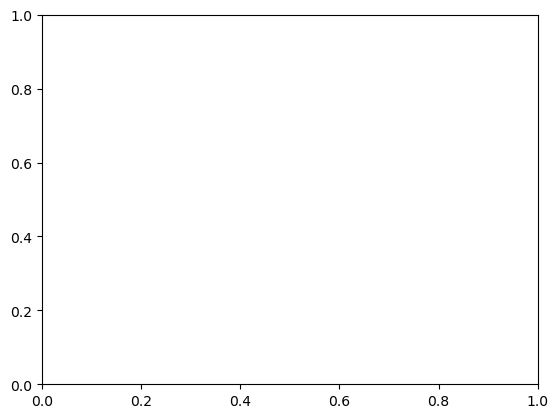

In [ ]:
depth=range(1,n)
plt.plot(depth,score)
plt.plot(depth,test_score)
plt.show()